## Letter Model: Mallet

## Resources

In [1]:
import pickle
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = 'mallet-2.0.8/bin/mallet' # update this path

In [45]:
# Corpus
with open("20240608_PhD_LtrLem-N.txt", "rb") as fp:   # Unpickling
    data_lemmatizedNouns = pickle.load(fp)
    
len(data_lemmatizedNouns)

676

In [7]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatizedNouns)

# Create Corpus
texts = data_lemmatizedNouns

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

This code adapted from https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

## 1. LDA Mallet (settings equivalent to the non-wrapper version)

In [4]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, iterations=400, random_seed=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [12]:
# To see word associated with id, use this code.
print(id2word)

Dictionary(6505 unique tokens: ['air', 'apron', 'bye', 'ceremony', 'cermony']...)


In [14]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatizedNouns, 
                                                        start=5, 
                                                        limit=30, 
                                                        step=1)

Mallet LDA: 5 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 781
total tokens: 61621
<10> LL/token: -8.62746
<20> LL/token: -8.26451
<30> LL/token: -8.05247
<40> LL/token: -7.94716

0	10	day time morning thing room night town water home place hour people evening week yesterday boat side end clock fire 
1	10	day winter house time home school church letter place week weather deal spring month head manner today garden snow tea 
2	10	child time mother letter week brother health girl sister friend write wife baby month trouble aunt kind cousin pleasure boy 
3	10	country year land pound dollar money acre farm man person place work people cent crop foot price wheat lot number 
4	10	letter friend time life family book heart sister world paper year husband son home father hand work health kind death 

<50> LL/token: -7.88391
<60> LL/token: -7.83222
<70> LL/token: -7.80776
<80> LL/token: -7.78584
<90> LL/token: -7.76746

0	10	day time night thing morning room water town side hour 

<160> LL/token: -7.74899
<170> LL/token: -7.74027
<180> LL/token: -7.73612
<190> LL/token: -7.72534

0	8.33333	life year hand book heart mind work people friend care change interest paper rest pleasure home matter blessing copy spirit 
1	8.33333	letter time friend brother mother sister health family month father death wife kind daughter write news son girl home husband 
2	8.33333	dollar work house money year man pound people board time kind cent family foot business number pay expense day cost 
3	8.33333	day morning weather room night time evening hour town place side water bed house fear woman head flower end clock 
4	8.33333	week child day home boy thing baby school winter uncle visit time cousin church night today trouble snow mail yesterday 
5	8.33333	country land year acre farm place winter pound person summer month wood spring crop price horse wheat road money people 

<200> LL/token: -7.72761
<210> LL/token: -7.72242
<220> LL/token: -7.71878
<230> LL/token: -7.71819
<240> LL/tok

<210> LL/token: -7.76285
<220> LL/token: -7.75753
<230> LL/token: -7.75494
<240> LL/token: -7.75252

0	7.14286	life child book heart hand trouble mind paper husband work friend interest age rest doctor matter kind woman copy fear 
1	7.14286	place people time year business world month man company manner happiness case situation town life state end comfort idea summer 
2	7.14286	work house day time week room town water people kind store snow head month thing mine fire island woman garden 
3	7.14286	letter time day mother week home girl weather news baby thing night visit winter pleasure return write writing picture darling 
4	7.14286	country land pound year dollar acre farm money place cent person crop price horse wood wheat road house farmer market 
5	7.14286	friend family brother sister letter health child year winter wife daughter son father summer death uncle time answer aunt home 
6	7.14286	day morning evening church side hour night bed boat school yesterday clock board river ship c

<210> LL/token: -7.77128
<220> LL/token: -7.77133
<230> LL/token: -7.7777
<240> LL/token: -7.77456

0	6.25	letter time day write news month account weather friend pleasure thing opportunity place happiness comfort manner writing picture darling fire 
1	6.25	dollar money year pound cent man lot country month board cost pay expense government work property number cow gold provision 
2	6.25	friend brother mother family health sister letter year son father death wife child daughter uncle answer aunt cousin kind husband 
3	6.25	hand book heart life paper mind work trouble kind interest fear age matter world copy woman trial power anxiety return 
4	6.25	time people day winter work summer home place country month business state city town man snow thing rest situation reason 
5	6.25	country land year acre farm wood pound crop horse wheat place person house kind foot farmer spring market potato tree 
6	6.25	day morning house hour town water night side company evening boat room return river end 

<160> LL/token: -7.83657
<170> LL/token: -7.83282
<180> LL/token: -7.82214
<190> LL/token: -7.81902

0	5.55556	house book room hand winter spirit people town day idea fire difficulty work account table head door servant lady service 
1	5.55556	country people man year horse business company number expense state island climate pay government seed war work cow reason mine 
2	5.55556	time day letter thing girl month week weather school fear manner return night garden place dinner order change walk box 
3	5.55556	friend death child time life husband sister mind trouble place wife son care account paper interest daughter matter mother hand 
4	5.55556	letter brother time family health mother sister home winter summer friend write uncle news aunt answer year cousin month opportunity 
5	5.55556	day water house place wood town tree board side boat road tea river foot half store spring building sea ground 
6	5.55556	letter kind year life world pleasure work woman heart father home happiness comfo

<60> LL/token: -7.95553
<70> LL/token: -7.93491
<80> LL/token: -7.91636
<90> LL/token: -7.89513

0	5	house work town people day horse half board pork water servant door ship gold provision boat vessel employment meeting company 
1	5	year business world life hand account difficulty home captain fear order flower man state expense mind trouble case property description 
2	5	girl room night boy woman hand bed time thing mail child week fire trouble window street illness change writing mind 
3	5	day time home evening letter week morning uncle aunt today night visit weather return yesterday clock leave mother address news 
4	5	friend book heart work paper life wife husband death kind dollar picture son age letter matter care mother darling copy 
5	5	child week day school church baby store thing spirit spring doctor home tomorrow trial blessing snow fever town pain anxiety 
6	5	country land pound year money dollar acre farm cent crop price wheat person kind farmer market cost bushel wage pot

<360> LL/token: -7.82117
<370> LL/token: -7.80606
<380> LL/token: -7.79921
<390> LL/token: -7.80808

0	5	work house people horse city board water tea half thing pork day vessel ship gold provision deal employment view box 
1	5	year people business man interest state world difficulty reason case government life expense gentleman mind fact matter power character party 
2	5	time girl hand room woman night boy mind thing mail fire head table picture tomorrow eye writing door window walk 
3	5	home day letter time week mother evening aunt weather yesterday return visit today year morning leave news night dinner rain 
4	5	life book heart paper friend work husband kind wife care son copy dollar change death world loss trial age sorrow 
5	5	child week day baby school house trouble church bed doctor wife boy trust island spirit captain store prospect town thing 
6	5	country land pound year money dollar acre farm cent crop price wheat place farmer market person bushel cost wage family 
7	5	letter

<260> LL/token: -7.80879
<270> LL/token: -7.80073
<280> LL/token: -7.80735
<290> LL/token: -7.80375

0	4.54545	book life heart work world trouble doctor paper copy trial anxiety interest fear case parent sickness nature trust circumstance story 
1	4.54545	people man year business month office time company country government city war interest party gold mind law fact thing end 
2	4.54545	land pound country acre farm dollar year money cent crop price wheat farmer market cost bushel person wage seed situation 
3	4.54545	home child week boy school visit church today mail store island leave account fever illness pork meeting fortnight trust prospect 
4	4.54545	house place town day country wood people month person road garden manner difficulty state summer climate horse side tree description 
5	4.54545	family brother year health friend summer month son country money wife winter work opportunity daughter spring paper acquaintance house time 
6	4.54545	time day weather winter place home head s

<110> LL/token: -7.90961
<120> LL/token: -7.9011
<130> LL/token: -7.8878
<140> LL/token: -7.8842

0	4.16667	friend family brother year sister wife daughter son health husband father kind death dollar answer money line account letter loss 
1	4.16667	time winter summer month day health home letter pleasure opportunity weather happiness spring garden snow blessing return trust mine deal 
2	4.16667	work book paper life case business heart matter copy reason spirit interest city kind fear character fortune opinion story event 
3	4.16667	hand woman world heart rest mind servant eye fire trial girl comfort table anxiety idea pen bed thing office power 
4	4.16667	water day time tree place river boat board side work sea number foot road lot passage fall fellow country voyage 
5	4.16667	letter time sister place write news thing day friend writing picture month darling leave tomorrow lady fever girl answer manner 
6	4.16667	people life care time difficulty company account mind expense person mann

<360> LL/token: -7.84684
<370> LL/token: -7.83895
<380> LL/token: -7.83572
<390> LL/token: -7.83381

0	4.16667	brother family friend health year sister wife death son father daughter kind money account line husband loss living sickness answer 
1	4.16667	day winter time month summer country weather home health opportunity happiness pleasure garden spring snow trust deal return attention father 
2	4.16667	work book paper life city heart age copy business trial son dollar interest kind story success nature bread history character 
3	4.16667	hand world thing woman mind girl rest life change spirit fire heart husband anxiety eye room hour comfort child face 
4	4.16667	water day time river boat tree foot ship side morning captain board sea work vessel place hour arrival head fall 
5	4.16667	letter time friend place sister write news picture writing thing darling answer month care leave girl fever folk call kind 
6	4.16667	people time situation reason home office difficulty power expense part

<210> LL/token: -7.87919
<220> LL/token: -7.88783
<230> LL/token: -7.88427
<240> LL/token: -7.88542

0	3.84615	house town room tree wood place time garden road side dinner door flower water frost mile spirit breakfast ground home 
1	3.84615	work day week trouble bed dollar city house doctor place kind rest snow situation pain pay illness party arm charge 
2	3.84615	people man year business state case difficulty law company government property person fact expense mind duty thousand share meeting number 
3	3.84615	family brother winter health year money uncle son summer friend account line word month respect country prospect answer living address 
4	3.84615	time country month place summer year people thing opportunity store spring mine hand manner pleasure kind gold distance health dress 
5	3.84615	day night morning evening weather church yesterday week clock fire island hour lady board rain window mail street return sleep 
6	3.84615	book hand interest world heart life copy mind eye powe

<60> LL/token: -8.08627
<70> LL/token: -8.04107
<80> LL/token: -8.02112
<90> LL/token: -7.98559

0	3.57143	book work life interest hand flower paper copy matter heart age anxiety fear mind nature change husband party office soul 
1	3.57143	child school room week girl day lot boy home captain mind difficulty window hour address face voyage walk box cough 
2	3.57143	people work man business servant day hand number case year head spirit fact foot home company mine expense length circumstance 
3	3.57143	mother letter child sister brother wife daughter uncle aunt cousin son family answer home death fire parent news likeness loss 
4	3.57143	friend kind death write time life money care year son father manner doctor return situation sickness glad_hear post marriage disease 
5	3.57143	land country pound acre farm dollar money year cent crop price wheat farmer market cost bushel wage person work employment 
6	3.57143	house place water day side tree board boat wood river night sea store room buil

<260> LL/token: -7.89987
<270> LL/token: -7.90605
<280> LL/token: -7.91028
<290> LL/token: -7.90539

0	3.57143	book life interest mind work spirit paper copy hand matter nature trial age fear story eye year truth anxiety success 
1	3.57143	child school room night hour girl home captain mind week boy bed window tea pork walk service lot cough office 
2	3.57143	people work country man business day state hand company person servant fact case question expense place stand climate habit fellow 
3	3.57143	mother brother letter family child sister son wife daughter uncle aunt cousin home death year answer father winter health line 
4	3.57143	friend time kind money country manner trouble death situation doctor change rest account acquaintance living circumstance year glad_hear life pleasure 
5	3.57143	land country pound acre dollar farm year money cent crop price wheat farmer market bushel wage board cost trade quarter 
6	3.57143	house day place water wood side river tree island boat sea board 

<60> LL/token: -8.08284
<70> LL/token: -8.05686
<80> LL/token: -8.03319
<90> LL/token: -8.01124

0	3.33333	child book boy thing week today girl tomorrow day anxiety yesterday illness fever creature face room cough writing strength disease 
1	3.33333	work life trouble woman heart year copy hand trial mind nature man term office loss girl wife soul son call 
2	3.33333	friend death sister kind husband life heart father world law comfort sorrow age child care situation sickness writing parent fortune 
3	3.33333	letter time place spirit opportunity happiness flower picture return world manner darling eye care fear peace home trust party case 
4	3.33333	brother family health sister daughter letter year child son uncle mother cousin answer winter father line aunt living word address 
5	3.33333	time day weather month deal letter garden health tree summer rain thing lady window arrival woman acquaintance idea end scene 
6	3.33333	house town place church room day home dinner clock side hour mail

<260> LL/token: -7.90897
<270> LL/token: -7.89813
<280> LL/token: -7.91412
<290> LL/token: -7.90465

0	3.33333	child book girl boy thing woman doctor writing fear anxiety face illness eye creature pen fever cough box history attack 
1	3.33333	life year work trouble copy change mind trial paper wife husband age term son nature soul story world flower hand 
2	3.33333	friend death sister kind heart life account husband care comfort world father sorrow rest pain parent fortune sickness talk living 
3	3.33333	letter time return spirit opportunity place manner happiness pleasure trust darling war father prayer home peace leave hand people flower 
4	3.33333	family brother health child daughter year son sister mother uncle winter house line address father answer cousin blessing trouble aunt 
5	3.33333	day time month weather summer health garden country deal rain lady attention acquaintance air fall tree sister thing woman order 
6	3.33333	house day town room church boy side dinner clock door m

<60> LL/token: -8.08613
<70> LL/token: -8.063
<80> LL/token: -8.03718
<90> LL/token: -8.01573

0	3.125	week day baby child girl school head boy doctor store bed fever night anxiety face fortnight thinking trouble pain minute 
1	3.125	day time letter month health place comfort world happiness winter account trust prayer idea weather manner wood gentleman description lady 
2	3.125	house work time room life people friend water power fire door deal home illness kindness side expense bear strength bread 
3	3.125	boy life father care girl change visit darling office paper peace war child eye rest account soul island likeness age 
4	3.125	family friend brother health son daughter year death uncle sister aunt kind husband dollar child living line address letter picture 
5	3.125	kind tree house flower garden bed seed fear tea day spring mile window passage luggage half child currency steamer kitchen 
6	3.125	night day week yesterday today morning mail thing hour evening afternoon fellow town le

<260> LL/token: -7.9421
<270> LL/token: -7.93817
<280> LL/token: -7.94882
<290> LL/token: -7.94668

0	3.125	week day baby child school night bed today weather doctor girl fever pain store fortnight illness cough minute sickness hope 
1	3.125	time letter day health pleasure month happiness weather place world news prayer manner opportunity lady order attention trust hand return 
2	3.125	work time house place people water lot head fire call door mind friend deal hour sight building mountain character fault 
3	3.125	letter girl boy father visit change age kind darling fear eye thing picture loss war life office care rest return 
4	3.125	family brother friend child health son wife daughter sister uncle year aunt death husband kind life living account address marriage 
5	3.125	room house tree tea wood church seed flower kind bed window garden dress servant plan table currency kitchen spot mile 
6	3.125	child week night day morning evening home boy hour mail clock yesterday tomorrow afternoo

<60> LL/token: -8.12665
<70> LL/token: -8.08881
<80> LL/token: -8.0638
<90> LL/token: -8.03447

0	2.94118	land country pound acre year farm crop price wheat farmer market bushel money half wage shilling spring beef man currency 
1	2.94118	place house wood tree river side road water bank boat land neighbourhood rate country dinner return fall building end description 
2	2.94118	kind hand time pleasure girl wife interest power death kindness sister account mind nature year visit end woman regret door 
3	2.94118	work business people paper manner servant matter mind service case cotton doubt life table world heat stand summer position strength 
4	2.94118	day time town church morning evening home letter yesterday hour night breakfast visit picture clock spirit window thinking sea stage 
5	2.94118	book heart life care child copy trial letter eye parent mind creature soul spirit rest picture fortune hand fear pen 
6	2.94118	letter brother mother family sister health daughter uncle write son a

<260> LL/token: -7.93112
<270> LL/token: -7.92574
<280> LL/token: -7.93577
<290> LL/token: -7.93475

0	2.94118	land country pound year acre farm crop price wheat money market farmer bushel spring seed neighbour stock oats half potato 
1	2.94118	place house wood tree day road river water side boat land building fall mill country bank lake voyage village train 
2	2.94118	time hand mind interest pleasure sister kind letter life account spirit rest pen girl death visit power question truth marriage 
3	2.94118	work people business matter world paper gentleman city manner service servant case trouble cotton party table doubt thought sale time 
4	2.94118	day town morning church evening home return visit clock weather dinner yesterday afternoon packet breakfast time floor air tea carriage 
5	2.94118	book heart life copy trial care parent father creature death soul story fear affection flower eye order age hope history 
6	2.94118	brother letter mother family friend sister son uncle wife daughte

<60> LL/token: -8.12584
<70> LL/token: -8.11645
<80> LL/token: -8.09828
<90> LL/token: -8.0748

0	2.77778	dollar pound money work cent bushel month cow employment provision flour clothe board servant tea beef house store potato butter 
1	2.77778	letter mother family health time uncle aunt news winter summer home child blessing daughter address garden weather age glad_hear event 
2	2.77778	work trouble book mine copy case kind life pay year account fellow story sum car coal age interest fault judge 
3	2.77778	week girl day boy baby room woman visit darling tomorrow child weather walk mail cough breakfast fear kitchen matter birthday 
4	2.77778	day house place people town time week church road store home war river distance head member pig field call round 
5	2.77778	time care kind sister paper account day letter spirit fever answer call talk doubt pen friend position service disease purpose 
6	2.77778	friend son death year family child heart husband daughter life kind doctor wife father 

<260> LL/token: -7.986
<270> LL/token: -7.98193
<280> LL/token: -7.99325
<290> LL/token: -7.98069

0	2.77778	dollar pound cent work cost month cow board money provision employment seed pork beef flour potato luggage clothe butter pay 
1	2.77778	mother family child daughter uncle aunt home letter cousin winter death summer news address father health body wedding age weather 
2	2.77778	work book trouble copy mine year reason money fact life story debt expense term difficulty fellow success case sum head 
3	2.77778	week girl baby boy night room visit day window thing weather fear woman darling cough yesterday kitchen trip minute hope 
4	2.77778	day place time week house people water home town head store half lot distance mountain degree night commence tool claim 
5	2.77778	day paper kind friend health care account call thing fever pen time sickness prospect rest talk mind age position suit 
6	2.77778	friend son heart husband sister life death child wife year doctor family loss trial world

<60> LL/token: -8.14858
<70> LL/token: -8.12529
<80> LL/token: -8.10022
<90> LL/token: -8.07734

0	2.63158	house school store tea pork account expense seed day water mill purchase business profit quantity prospect idea good winter pig 
1	2.63158	home people business time interest year state mine place pleasure gold fact thing manner circumstance heat rate feeling hand amount 
2	2.63158	time matter fire city mail call office day mind hour soul news arm story company night boy street people member 
3	2.63158	land country pound acre farm year price wheat crop farmer bushel wood horse market neighbourhood half person labour shilling currency 
4	2.63158	week baby mother uncle visit time home cousin girl today weather island child news rest folk glad_hear boy cough deal 
5	2.63158	work money dollar year place man lot pay cost sale property building son rent neighbour head advantage settlement quarter market 
6	2.63158	book heart husband world life paper son age trial hand sorrow parent addre

<210> LL/token: -7.9943
<220> LL/token: -7.98746
<230> LL/token: -7.98907
<240> LL/token: -7.99877

0	2.63158	day house school store tea business pork winter spirit expense deal account pain care pig kind ham good holiday head 
1	2.63158	people interest business home difficulty state man gold year mind party opinion fact pleasure circumstance feeling heat manner truth mine 
2	2.63158	man fire year people boy call month day time mail city office company government war matter thousand arm street hour 
3	2.63158	land country acre farm pound crop year wheat price farmer market bushel wood horse lot mill stock labour shilling potato 
4	2.63158	time letter week mother baby uncle home write cousin news visit picture folk girl lot death excuse welcome_letter rest remembrance 
5	2.63158	work money dollar year place people cost pay cow city case man sale settlement building rent quarter property number rate 
6	2.63158	book heart husband life age copy world paper trial son sorrow hand loss parent

<360> LL/token: -7.96149
<370> LL/token: -7.95675
<380> LL/token: -7.95734
<390> LL/token: -7.95841

0	2.63158	day week house school store pork tea deal fire yesterday fortnight business ice hope head spirit ham account holiday drink 
1	2.63158	country interest people year difficulty state home business fact manner climate circumstance emigrant man heat idea number feeling matter world 
2	2.63158	man people city office government mail company year war month boy thousand hour call member field officer town arm fire 
3	2.63158	land country acre farm pound year crop wheat money market bushel horse place price mill person stock labour shilling wood 
4	2.63158	letter time home mother write uncle aunt cousin baby news change picture girl folk weather glad_hear death excuse welcome_letter week 
5	2.63158	work dollar money year people pay place board business lot cow rate cost sale wage profit suit quarter building property 
6	2.63158	book heart life husband paper copy trial sorrow age work pa

<110> LL/token: -8.05268
<120> LL/token: -8.04266
<130> LL/token: -8.04652
<140> LL/token: -8.04417

0	2.5	house room water bed town island captain fire day river window tea spot kitchen table door scene ice floor station 
1	2.5	friend sister kind heart father care husband death woman darling sorrow bed year pain fear eye loss sickness writing peace 
2	2.5	time man place work month country year people store home meeting money service summer cotton stranger clothing stand strength kind 
3	2.5	business company people interest government gold fact law city thousand mind state bank office trip side earth day coal food 
4	2.5	hand mind spirit matter life trouble age anxiety hour nature face thing change difficulty night room power table thought truth 
5	2.5	family brother mother friend daughter son uncle aunt wife cousin health death child doctor father home line answer blessing city 
6	2.5	book work paper copy trial trouble life son story husband term heart success bear attack city cottage

<260> LL/token: -7.99153
<270> LL/token: -7.99141
<280> LL/token: -7.99886
<290> LL/token: -7.98795

0	2.5	house room bed day town water fire head door window hour deal building spot kitchen gentleman sight mountain half table 
1	2.5	heart husband friend sister woman death kind girl daughter loss darling father sorrow care year pain eye kindness flower fortnight 
2	2.5	time work man month place year country people kind mine day money meeting fever summer trouble stranger suit store call 
3	2.5	business people company city government interest year fact gold war side office state thousand law coal mind stand field food 
4	2.5	hand mind trouble spirit life thing night anxiety power matter call walk world table order change thought truth face question 
5	2.5	brother family friend wife mother son uncle aunt health cousin daughter child death doctor line father sister living city blessing 
6	2.5	book work paper copy trial story son life term attack mail college success history pound pay judg

Mallet LDA: 21 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 781
total tokens: 61621
<10> LL/token: -9.27982
<20> LL/token: -8.7063
<30> LL/token: -8.44107
<40> LL/token: -8.31833

0	2.38095	book life husband work heart year world copy age son trial change nature term power care character man spirit sort 
1	2.38095	letter girl sister time happiness opportunity order writing weather acquaintance trust write woman creature face mine spirit bear card notice 
2	2.38095	country land people person difficulty wood bank state idea neighbourhood stock labour case year emigrant settler piece part capital fact 
3	2.38095	day hand night time mind table life description matter change spirit pen board lady people rain weather comfort thought street 
4	2.38095	paper home year people kind visit time eye soul woman bread heat story book ground sight air boy child station 
5	2.38095	time summer daughter pleasure garden letter month aunt paper news week party sister business spring answ

<160> LL/token: -8.04962
<170> LL/token: -8.04905
<180> LL/token: -8.0408
<190> LL/token: -8.02478

0	2.38095	book work year copy power son life husband world nature heart age subject regret judge college picture page success clearing 
1	2.38095	letter girl woman sister health happiness trust writing darling peace kindness weather kind world mine creature likeness bear face end 
2	2.38095	country person land state difficulty year bank money people climate neighbourhood quarter capital emigrant fact labour expense property respect advantage 
3	2.38095	hand time life manner account spirit mind table interest people order idea servant change matter thought night kitchen purpose pleasure 
4	2.38095	home paper trouble time eye fear kind book anxiety trial story bread pen painting visit station earth promise attack step 
5	2.38095	time month summer home country letter opportunity pleasure garden father blessing reason spring attention business answer glad_hear news journey event 
6	2.38095	d

<310> LL/token: -8.00001
<320> LL/token: -8.00251
<330> LL/token: -7.99448
<340> LL/token: -8.0003

0	2.38095	book life work copy nature woman world story heart subject character history sum soul page judge volume term sale sort 
1	2.38095	letter health girl sister happiness writing kind darling weather world garden peace trust woman write kindness creature fever mine fear 
2	2.38095	country person year difficulty land climate people money neighbourhood world labour emigrant property state respect settler advantage idea situation circumstance 
3	2.38095	hand room time mind spirit life table change pen servant night matter question kitchen thought purpose care master floor prospect 
4	2.38095	paper thing trouble flower doctor trial anxiety fear visit eye arm care living expense position painting attack promise disease show 
5	2.38095	time letter month pleasure summer country opportunity home news manner father attention deal glad_hear blessing prayer party war spring feel 
6	2.38095	dol

<60> LL/token: -8.19396
<70> LL/token: -8.16316
<80> LL/token: -8.15238
<90> LL/token: -8.12717

0	2.27273	morning evening night day side week yesterday clock boat mail spirit afternoon return scene water journey fall river talk direction 
1	2.27273	house kind work day summer pay people town city snow pork foot store prospect expense idea sugar neighbour pig ham 
2	2.27273	friend family kind heart care son father kindness pleasure sorrow peace sister blessing girl trust attention comfort event pain nature 
3	2.27273	day town room ship captain sea lady table dinner voyage night tomorrow order building gentleman breakfast yesterday storm clock carriage 
4	2.27273	church account school fire anxiety fear child answer letter earth spot sickness street mail law window face satisfaction sleep progress 
5	2.27273	water wood horse river tea road spring piece box provision door pound distance pair flour article winter waggon weight salt 
6	2.27273	country business place person state meeting quar

<210> LL/token: -8.03815
<220> LL/token: -8.03227
<230> LL/token: -8.03974
<240> LL/token: -8.02585

0	2.27273	morning day night evening side boat river return board water home clock yesterday fall place mail week road direction bank 
1	2.27273	day house work store snow town pork people kind flour call city clothe foot pig good pay ham half reason 
2	2.27273	friend letter kind father heart happiness care sister prayer peace kindness darling blessing manner sorrow event fortune trust comfort end 
3	2.27273	day town ship sea room captain lady voyage night building dinner order clock dress table vessel spirit evening packet hour 
4	2.27273	child church school account fire thing mail time evening spot class anxiety trust street satisfaction progress foot gift pay agent 
5	2.27273	water horse tea spring box piece door pair passage fish room article waggon river mile chair salt inch boot bread 
6	2.27273	country place people person business state wood heat meeting fear appearance cotton bank

<360> LL/token: -8.00333
<370> LL/token: -7.99815
<380> LL/token: -8.00468
<390> LL/token: -8.0086

0	2.27273	morning night side evening water hour boat river return road day wood home breakfast scene place bank building fall board 
1	2.27273	day house store town work pork snow pay people flour good call fire lot ice pig master ham kind half 
2	2.27273	friend sister kind care world happiness father heart place peace prayer trust darling letter loss kindness event end sorrow pain 
3	2.27273	day town ship captain vessel street yesterday gentleman evening church sea morning dress night order dinner window company carriage winter 
4	2.27273	child school church mail boy prospect anxiety account evening thing fire class brother thinking college progress island term trust satisfaction 
5	2.27273	water horse tea piece box thing spring door sugar grass kitchen milk bed woman pair passage clothe time fish yard 
6	2.27273	country people place state person summer business climate heat number meeti

<110> LL/token: -8.08625
<120> LL/token: -8.08361
<130> LL/token: -8.07619
<140> LL/token: -8.07189

0	2.17391	time letter write friend home place health news summer month answer glad_hear hear line acquaintance guess position asylum hearing reply 
1	2.17391	book child girl boy paper age woman matter daughter spirit term eye writing nurse college subject table notice beauty drawing 
2	2.17391	mother child home uncle aunt cousin family visit death son address summer pay afternoon remembrance nephew share niece photo wife 
3	2.17391	letter time baby weather month flower happiness trust darling father garden picture prayer writing woman spring welcome_letter peace call likeness 
4	2.17391	week school today day store child tea house town pork box yesterday girl ice head boy island ham bit excuse 
5	2.17391	day pleasure opportunity return week captain attention visit leave account month manner sea night birthday card mine port spirit complaint 
6	2.17391	winter home year account snow spring

<260> LL/token: -8.03034
<270> LL/token: -8.03251
<280> LL/token: -8.0433
<290> LL/token: -8.03986

0	2.17391	letter time home write place friend news month answer glad_hear folk paper summer excuse welcome_letter bit guess asylum hear note 
1	2.17391	book child girl spirit boy copy paper woman age eye table daughter matter tomorrow term nurse college notice hope beauty 
2	2.17391	mother child uncle aunt cousin family year death home son visit summer address girl remembrance kind blessing train grandmother interest 
3	2.17391	letter baby weather flower news darling picture health father time deal friend writing fear garden likeness woman thought music card 
4	2.17391	week child school today store island tea pork afternoon house yesterday lesson pig ham ice boy church holiday town tooth 
5	2.17391	day month pleasure opportunity return manner summer happiness attention visit acquaintance peace time account lady leave journey word kindness complaint 
6	2.17391	winter home time thing accou

Mallet LDA: 24 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 781
total tokens: 61621
<10> LL/token: -9.31613
<20> LL/token: -8.72359
<30> LL/token: -8.47427
<40> LL/token: -8.34242

0	2.08333	child husband heart aunt trouble death age matter hand wife power bed doctor son nature trial loss soul change cough 
1	2.08333	week baby night girl school boy child head bed today yesterday morning visit evening arm afternoon attention hope tomorrow music 
2	2.08333	week case captain mind face property bread difficulty interest debt doubt pay school summer hill people nurse year home head 
3	2.08333	dollar cent pound money board cost place situation advantage state luggage mind half thing soil cow amount ship steam merchant 
4	2.08333	room woman day hand boy window folk deal door lesson wind illness ice station yesterday air light foot college friend 
5	2.08333	day weather letter thing time flower home fear write frost creature winter opportunity kind fire painting card visit pl

<160> LL/token: -8.06048
<170> LL/token: -8.04864
<180> LL/token: -8.04915
<190> LL/token: -8.04393

0	2.08333	heart husband hand death life doctor son trial child wife sorrow loss age trouble change soul care matter power disease 
1	2.08333	week child baby girl boy school today night yesterday tomorrow morning evening island car holiday talk drawing medicine music present 
2	2.08333	home year interest mind state case anxiety spirit doubt position situation sum city rest difference affection benefit service independence sake 
3	2.08333	dollar pound cent money cost board account luggage rate steam currency place property situation servant price expense pocket hand employment 
4	2.08333	room bed woman table hand spirit door window eye cough kitchen lesson day mail station floor trouble illness sleep face 
5	2.08333	day thing winter weather garden flower frost tree kind fear air seed painting creature comfort plant appearance grass potato bird 
6	2.08333	work water wage provision cow pota

<310> LL/token: -8.01386
<320> LL/token: -8.01467
<330> LL/token: -8.01719
<340> LL/token: -8.02022

0	2.08333	heart life husband death hand trouble loss son sorrow child trial parent age change world soul illness marriage wife attack 
1	2.08333	week child baby school girl boy today yesterday island tomorrow lesson nurse holiday box car hope card gift tooth mama 
2	2.08333	home thing mind year spirit situation anxiety prospect interest case comfort doubt affection position sum circumstance debt promise state rest 
3	2.08333	dollar pound money cent board wage cost rate luggage employment expense account currency boat steam trade property weight price hand 
4	2.08333	room bed woman night hand table girl eye house door sleep fortnight kitchen window face spirit trouble hair floor piano 
5	2.08333	day winter weather garden flower thing summer air snow frost creature fear tree appearance bear trust seed storm painting picture 
6	2.08333	work water cow flour clothe beef butter kind pay passa

<60> LL/token: -8.20104
<70> LL/token: -8.17374
<80> LL/token: -8.16009
<90> LL/token: -8.14238

0	2	kind horse pork snow person foot year tea piece beef clothe purchase thing store day pig pay quarter milk fish 
1	2	servant manner dinner description change view dress spot girl woman breakfast home window heat walk hill journey thought ride rise 
2	2	business interest state mind city fortune change debt sale friend fear service bank kind cotton merchant term charge opportunity age 
3	2	day person captain ship number sea fact wood office voyage rest society passenger clock respect inhabitant place lady account wind 
4	2	boy thing mother week time afternoon letter box likeness trouble lesson child stand fellow home car birthday kitchen hair nurse 
5	2	house work place town day board room door man city amount people head gentleman pocket sort mile mountain trunk brick 
6	2	hand life woman trouble matter trial heart spirit mind eye table creature pen soul power room office college question

<210> LL/token: -8.06919
<220> LL/token: -8.06865
<230> LL/token: -8.0716
<240> LL/token: -8.06364

0	2	horse pork tea year thing piece kind clothe beef potato pair person pig ham fish good meat article tool inch 
1	2	town place dinner manner room spirit description service morning breakfast spot dress change order heat leave view woman girl walk 
2	2	business interest state mind kind friend city side fortune change doubt debt fear gentleman fault merchant purchase cotton effect reason 
3	2	ship office captain sea person day voyage hour passenger party port rest society wind passage term lady number attention cabin 
4	2	boy child mother letter tomorrow thing likeness time care kitchen box car birthday hair trouble card picture photo home hay 
5	2	house people work town place board door city building day ground room gentleman drink mile pocket sort brick friend round 
6	2	hand life woman trouble mind matter heart eye table spirit trial servant soul power affection nature pen bread creat

<360> LL/token: -8.05011
<370> LL/token: -8.04431
<380> LL/token: -8.03346
<390> LL/token: -8.04503

0	2	pork horse kind tea thing dress piece beef clothe year good person pig pair store ham fish pay meat yard 
1	2	town room dinner morning church clock heat manner breakfast description walk yesterday tea air window wood music appearance carriage place 
2	2	business interest mind state city kind change fortune doubt gentleman character profit reason money friend content service side rate benefit 
3	2	day ship captain vessel sea hour office night person board evening voyage passage rest passenger boat port wind account cabin 
4	2	child boy mother letter tomorrow care girl thing kitchen eye car box trouble card cottage hair mail train hay photo 
5	2	house work place people town board day building door friend room mile city charge drink gentleman brick ring shop boarding 
6	2	life hand matter trouble mind spirit woman heart power parent table affection case servant strength eye attack soul

<110> LL/token: -8.12905
<120> LL/token: -8.13461
<130> LL/token: -8.13441
<140> LL/token: -8.12631

0	1.92308	place life people situation attention prospect end home gentleman side year law person society fear head request sort regard power 
1	1.92308	time letter home month pleasure opportunity answer care writing mail position health thinking idea satisfaction hearing account rest order gentleman 
2	1.92308	winter summer day place spring snow time weather fall wood climate frost month appearance ground meeting leave road street inhabitant 
3	1.92308	people year family child health summer war uncle address interest age character visit business paper condition member loss home remembrance 
4	1.92308	pound land acre farm year wood price mill cow person shilling settler seed farming stone trade garden grain building cost 
5	1.92308	tree day evening morning town side river water house boat scene return church yesterday building road voyage sail shore stage 
6	1.92308	book hand life paper 

<260> LL/token: -8.08154
<270> LL/token: -8.08723
<280> LL/token: -8.09199
<290> LL/token: -8.08884

0	1.92308	place people church time home situation year house gentleman prospect meeting person meet number neighbourhood religion service minister head friend 
1	1.92308	time letter home month opportunity answer pleasure health care glad_hear writing comfort position rest thinking idea hearing welfare blessing asylum 
2	1.92308	day winter weather summer place snow month spring frost road appearance climate fall storm order news air seed master thing 
3	1.92308	family year child people health kind interest paper address matter summer life uncle change business visit member condition fault winter 
4	1.92308	pound land acre farm year crop wheat price wood tree mill seed cost settler cattle soil shilling spring farming cow 
5	1.92308	side day water river morning tree evening return fall street road building board comfort sort yesterday end boat packet bank 
6	1.92308	book life work copy han

Mallet LDA: 27 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 781
total tokens: 61621
<10> LL/token: -9.39345
<20> LL/token: -8.76786
<30> LL/token: -8.49984
<40> LL/token: -8.3594

0	1.85185	school today business store term week time sickness leave success word prospect occasion commence college degree ice satisfaction religion deal 
1	1.85185	dollar house cent tree captain half wage board building work land town farming mile week expense pig band fare office 
2	1.85185	week girl baby night boy eye face woman trouble lesson hope yesterday glad_hear door visit train box fortnight piano day 
3	1.85185	interest mind hand matter difficulty change idea fact reason table doubt year voyage board truth mountain island week beauty office 
4	1.85185	week cousin boy summer family aunt year mother people visit address life house change holiday hear head remembrance north cap 
5	1.85185	year winter month climate rain place summer spring meeting folk state account vessel service st

<160> LL/token: -8.10857
<170> LL/token: -8.09446
<180> LL/token: -8.09416
<190> LL/token: -8.07858

0	1.85185	week school store today captain spirit pork mail account evening vessel church ice ham morning order progress business pity service 
1	1.85185	dollar cent house board work wage half mill cost expense capital servant steam number building week profit fare bank mile 
2	1.85185	week girl baby night boy trouble face lesson fellow change call pen disease sleep car tomorrow drawing bear train arm 
3	1.85185	hand interest life mind difficulty matter year idea spirit reason table change truth sum eye question power fortune settlement difference 
4	1.85185	family aunt son daughter year wife cousin mother house paper address people boy remembrance news letter father summer bone grandmother 
5	1.85185	winter summer month time spring year snow rain climate frost folk glad_hear opinion pig respect meeting deal account ground storm 
6	1.85185	home mother business visit month doctor return d

<310> LL/token: -8.05595
<320> LL/token: -8.05702
<330> LL/token: -8.04162
<340> LL/token: -8.04808

0	1.85185	week school today store yesterday church pork vessel lesson spirit captain deal ice tea ham holiday pig oats account mama 
1	1.85185	dollar work cent board pound house wage cost half building cow expense servant money steam sale fare number mile pocket 
2	1.85185	girl week baby night boy trouble call bed change sleep hair face disease hope car music hotel card tomorrow fellow 
3	1.85185	interest hand spirit life difficulty mind matter reason change idea fact question case fortune power benefit table debt sum nature 
4	1.85185	family uncle son aunt daughter cousin wife mother address paper year summer friend blessing country remembrance news relation bone body 
5	1.85185	winter time summer month year weather spring snow account frost folk glad_hear climate deal fall rain idea friend guess storm 
6	1.85185	home month visit doctor return business pleasure year daughter journey tr


0	1.78571	time man place letter city son account year money office country mother wife port field month answer request town home 
1	1.78571	country wheat tree lot wood man church people ground house year wage head description appearance land habit settlement corn mile 
2	1.78571	thing school people interest gold situation anxiety comfort road time meeting likeness number feeling prospect word class pocket degree tool 
3	1.78571	house difficulty life fire cow servant parent expense emigrant reason mind wood capital milk fear college satisfaction regret land improvement 
4	1.78571	visit time vessel bed evening box age child spirit kitchen ship aunt daughter letter music promise turn illness feel piano 
5	1.78571	dollar pound cent crop work farmer pork bushel country money employment oats clothe beef kind board state stock soil apple 
6	1.78571	brother sister daughter year letter home health school today mother winter family cousin deal day car child store round week 
7	1.78571	book chil

<160> LL/token: -8.13369
<170> LL/token: -8.1273
<180> LL/token: -8.11608
<190> LL/token: -8.11347

0	1.78571	place time money city town year quarter office cost charge meet hundred field north enemy pocket guess intention port day 
1	1.78571	country wood land road tree ground river church person climate number meeting appearance part foot world prospect character habit society 
2	1.78571	thing people school gold box likeness rest kind vessel feeling interest clothe anxiety share class tool dress turn clothing sake 
3	1.78571	fire life order servant hand difficulty house expense picture state earth parent day purpose difference affection room promise fear slave 
4	1.78571	day bed visit night yesterday spirit illness fortnight sleep evening pain disease fever talk pity birth thought dog mouth corner 
5	1.78571	pound dollar cent crop wheat farmer money person bushel wage trade board flour employment beef butter purchase profit oats provision 
6	1.78571	brother sister family daughter moth

<260> LL/token: -8.09623
<270> LL/token: -8.09886
<280> LL/token: -8.10963
<290> LL/token: -8.09882

0	1.78571	place time money city office town friend charge port meet cost year quarter rest north mail deal door trouble state 
1	1.78571	country wood church road tree land state comfort meeting person world prospect appearance manner description habit field inhabitant climate society 
2	1.78571	people thing kind gold rest likeness paper interest box school share occasion doubt provision tool class clothe feeling vessel colony 
3	1.78571	day town fire servant hand order affection sister master parent spirit picture progress trunk satisfaction promise purpose knowledge life spot 
4	1.78571	bed day today visit night doctor fever pain fortnight illness change talk cough disease sleep time evening yesterday birthday spirit 
5	1.78571	pound cent dollar wheat price money bushel farmer person wage board trade flour oats crop beef market cow apple butter 
6	1.78571	brother sister family letter h

<360> LL/token: -8.07365
<370> LL/token: -8.06492
<380> LL/token: -8.06129
<390> LL/token: -8.06628

0	1.78571	place time town city money people rest office friend business trouble deal charge cost port meet intention cundall instruction side 
1	1.78571	country wood church road tree river land state person meeting prospect comfort heat manner society world ground habit part description 
2	1.78571	people thing paper anxiety gold interest doubt likeness kind rest dress class provision feeling clothe tool box sort share occasion 
3	1.78571	day town fire servant order sister house master street leave progress spirit trunk bone spot rise reply hand promise slave 
4	1.78571	day night bed doctor today fever illness fortnight cough hour disease visit head pain birthday sleep gift birth arm medicine 
5	1.78571	pound dollar cent wheat farmer bushel wage price board flour person trade money beef shilling potato employment month oats profit 
6	1.78571	brother sister family health daughter mother f

<60> LL/token: -8.29057
<70> LL/token: -8.25189
<80> LL/token: -8.23839
<90> LL/token: -8.20188

0	1.72414	night girl doctor house child window servant month visit illness town hope day lot wedding hair drawing storm god_bless afternoon 
1	1.72414	brother mother sister letter daughter uncle aunt answer death child blessing account post care wife relation photo niece mercy grandmother 
2	1.72414	day evening yesterday week return home order journey end arrival store clock spirit stage cotton sound fatigue passage steamer direction 
3	1.72414	child school church week boy island uncle meeting lesson yesterday member teacher aunt today town band people remembrance north gift 
4	1.72414	land country acre farm year wheat money wood lot cost place cattle farming crop settler tree field neighbour corn township 
5	1.72414	year pork deal potato crop horse thing foot pay oats bushel piece butter pig sugar fish meat beef milk captain 
6	1.72414	heart child husband death bed life hand year wife age 

<160> LL/token: -8.14445
<170> LL/token: -8.14633
<180> LL/token: -8.1451
<190> LL/token: -8.12851

0	1.72414	day girl visit night doctor window snow change servant month week boy illness lot storm hair music note barrel funeral 
1	1.72414	mother letter sister child aunt brother daughter uncle answer death news post remembrance boy leave niece relation husband grandmother photo 
2	1.72414	evening morning day home return clock time journey fever yesterday fall end vessel spirit train tomorrow week direction country arrival 
3	1.72414	child school week church today island boy town meeting lesson snow yesterday band companion holiday minister clergyman cundall hodgson knee 
4	1.72414	land acre farm year country crop wheat money wood lot oats cattle neighbourhood stock soil price settler farming labour tree 
5	1.72414	horse pork deal water year potato pay piece cow foot kind butter sugar beef thing pair pig ham call fish 
6	1.72414	death heart child husband wife bed sister year trouble son

<260> LL/token: -8.11763
<270> LL/token: -8.11263
<280> LL/token: -8.1206
<290> LL/token: -8.10526

0	1.72414	day girl night visit doctor week illness fever servant change snow picture storm wedding minute window music disease lot afternoon 
1	1.72414	mother letter sister daughter aunt child brother father answer death news uncle post boy relation grandmother mistress niece widow law 
2	1.72414	evening morning home day return clock time spirit journey fall yesterday tomorrow end piece direction stage train arrival steamer fellow 
3	1.72414	child school week church today boy island town meeting lesson holiday band tomorrow gift minister class ice companion member yesterday 
4	1.72414	land acre farm country year crop wheat bushel money price wood market mill farmer lot stock tree neighbour settler farming 
5	1.72414	horse pork deal cow tea pay beef store butter sugar clothe thing kind year pair milk water fish piece ham 
6	1.72414	heart year husband wife child death son loss bed sister a

<360> LL/token: -8.09842
<370> LL/token: -8.08925
<380> LL/token: -8.08697
<390> LL/token: -8.09848

0	1.72414	day bed night week doctor girl illness visit fever lot storm minute snow afternoon change disease pen medicine hair dog 
1	1.72414	mother letter daughter aunt cousin sister child death uncle father answer brother news boy pleasure hear friend blessing relation niece 
2	1.72414	home evening morning return yesterday fall tomorrow journey day arrival clock time train spirit visit end direction scene assistance railway 
3	1.72414	child school week church today island captain boy meeting lesson ice pork holiday band yesterday pig gift mama minister clergyman 
4	1.72414	land acre farm country year crop wheat bushel market money price mill labour wood lot stock settler cattle farming soil 
5	1.72414	horse tea cow thing pay pork beef piece butter kind sugar clothe water potato milk pair store meat deal boot 
6	1.72414	heart husband year death child sister life wife son loss sorrow age

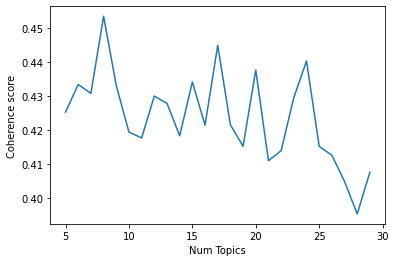

In [16]:
# Show graph
limit=30; start=5; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [18]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, 'Coherence: ', round(cv, 4))

Num Topics = 5 Coherence:  0.4252
Num Topics = 6 Coherence:  0.4333
Num Topics = 7 Coherence:  0.4307
Num Topics = 8 Coherence:  0.4534
Num Topics = 9 Coherence:  0.433
Num Topics = 10 Coherence:  0.4194
Num Topics = 11 Coherence:  0.4177
Num Topics = 12 Coherence:  0.4299
Num Topics = 13 Coherence:  0.4278
Num Topics = 14 Coherence:  0.4183
Num Topics = 15 Coherence:  0.4341
Num Topics = 16 Coherence:  0.4214
Num Topics = 17 Coherence:  0.4449
Num Topics = 18 Coherence:  0.4215
Num Topics = 19 Coherence:  0.4152
Num Topics = 20 Coherence:  0.4376
Num Topics = 21 Coherence:  0.411
Num Topics = 22 Coherence:  0.4139
Num Topics = 23 Coherence:  0.4295
Num Topics = 24 Coherence:  0.4402
Num Topics = 25 Coherence:  0.4152
Num Topics = 26 Coherence:  0.4126
Num Topics = 27 Coherence:  0.4049
Num Topics = 28 Coherence:  0.3953
Num Topics = 29 Coherence:  0.4076


In [20]:
# Coherence for 8-topic model
print(coherence_values[3])

# Topics for 8-topic model
malletModel_08 = model_list[3]
model_topics_08 = malletModel_08.show_topics(formatted=False)
pprint(sorted(malletModel_08.print_topics(num_words=20)))

# Convert results to lda model format for visualization.
MalletLDA08 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_08)

# Visualize the topics
pyLDAvis.enable_notebook()
vis08 = pyLDAvis.gensim.prepare(MalletLDA08, corpus, id2word, sort_topics=False)
vis08

0.4533716489880414
[(0,
  '0.118*"letter" + 0.078*"time" + 0.030*"day" + 0.026*"home" + 0.022*"month" '
  '+ 0.021*"news" + 0.020*"write" + 0.018*"pleasure" + 0.017*"sister" + '
  '0.016*"return" + 0.015*"account" + 0.014*"friend" + 0.014*"opportunity" + '
  '0.014*"weather" + 0.013*"health" + 0.013*"happiness" + 0.011*"picture" + '
  '0.011*"writing" + 0.011*"thing" + 0.011*"trust"'),
 (1,
  '0.040*"dollar" + 0.039*"money" + 0.028*"country" + 0.024*"man" + '
  '0.018*"year" + 0.018*"work" + 0.015*"pound" + 0.015*"cent" + 0.014*"people" '
  '+ 0.013*"lot" + 0.011*"month" + 0.011*"board" + 0.010*"expense" + '
  '0.010*"account" + 0.010*"company" + 0.009*"government" + 0.009*"cost" + '
  '0.008*"wage" + 0.008*"number" + 0.008*"property"'),
 (2,
  '0.060*"friend" + 0.052*"brother" + 0.051*"mother" + 0.047*"family" + '
  '0.032*"child" + 0.030*"health" + 0.030*"sister" + 0.030*"letter" + '
  '0.029*"year" + 0.027*"son" + 0.025*"father" + 0.025*"death" + 0.025*"wife" '
  '+ 0.023*"daughter"

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.086362  0.301635       1        1  12.509455
1     -0.003278 -0.060985       2        1  12.894230
2      0.306437 -0.040361       3        1  11.923313
3      0.188297 -0.133528       4        1  13.139843
4     -0.074216  0.280697       5        1  12.013654
5     -0.016211 -0.220269       6        1  13.108952
6     -0.277285 -0.026792       7        1  13.226569
7     -0.210106 -0.100397       8        1  11.183984, topic_info=       Term         Freq        Total Category  logprob  loglift
11   letter  1155.000000  1155.000000  Default  30.0000  30.0000
57     time  1171.000000  1171.000000  Default  29.0000  29.0000
78     week   578.000000   578.000000  Default  28.0000  28.0000
8       day  1073.000000  1073.000000  Default  27.0000  27.0000
84   friend   579.000000   579.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
5    church    60.548737   145.130270   Topic8  -4.7547   1.3165
26    thing    63.526544   240.743017   Topic8  -4.7067   0.8584
422    head    51.615317   116.528913   Topic8  -4.9144   1.3764
121   house    62.533942   375.590805   Topic8  -4.7225   0.3979
8       day    57.570930  1073.951607   Topic8  -4.8052  -0.7354

[580 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1014      2  0.998581     abundance
28        1  0.582741       account
28        2  0.414053       account
186       1  0.996574  acquaintance
187       6  1.000428          acre
...     ...       ...           ...
61        3  0.294241          year
61        4  0.106629          year
61        6  0.403569          year
62        7  0.393661     yesterday
62        8  0.598693     yesterday

[668 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8])

## 2. A range of iterations

In [19]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for iterations in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=8, iterations=iterations, id2word=id2word, random_seed=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [21]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatizedNouns, 
                                                        start=500, 
                                                        limit=5500, 
                                                        step=500)

Mallet LDA: 8 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 781
total tokens: 61621
<10> LL/token: -8.86503
<20> LL/token: -8.40234
<30> LL/token: -8.16595
<40> LL/token: -8.02846

0	6.25	time letter day write room world month happiness hand weather writing place deal spirit darling picture fire night ship account 
1	6.25	dollar pound money year country land man cent lot people house expense cost place government board market store price passage 
2	6.25	friend brother letter mother family health sister father wife son death daughter year time husband uncle cousin child opportunity kind 
3	6.25	letter book home paper heart girl pleasure time life thing mind hand kind return interest matter work trouble copy weather 
4	6.25	winter people work town place summer month country home day business state snow time city wage prospect reason situation change 
5	6.25	country acre year farm land wood foot person crop horse kind wheat road work tree garden farmer potato climate bushe

<360> LL/token: -7.7595
<370> LL/token: -7.75777
<380> LL/token: -7.75578
<390> LL/token: -7.75597

0	6.25	letter time home day month news write sister pleasure return weather account opportunity health friend happiness picture writing thing darling 
1	6.25	dollar money country man work year people pound cent lot board month expense account cost government company number wage property 
2	6.25	friend brother mother family child health sister letter son year father death wife daughter uncle aunt answer kind cousin doctor 
3	6.25	life hand book heart paper mind interest world year kind work age woman matter copy trial power change anxiety sorrow 
4	6.25	time day winter home summer place people work business country month state city town snow reason rest prospect weather situation 
5	6.25	land country year acre pound farm crop house price spring horse wheat foot farmer market potato kind wood bushel person 
6	6.25	day water house morning town night room hour side boat place evening church 

<210> LL/token: -7.77128
<220> LL/token: -7.77133
<230> LL/token: -7.7777
<240> LL/token: -7.77456

0	6.25	letter time day write news month account weather friend pleasure thing opportunity place happiness comfort manner writing picture darling fire 
1	6.25	dollar money year pound cent man lot country month board cost pay expense government work property number cow gold provision 
2	6.25	friend brother mother family health sister letter year son father death wife child daughter uncle answer aunt cousin kind husband 
3	6.25	hand book heart life paper mind work trouble kind interest fear age matter world copy woman trial power anxiety return 
4	6.25	time people day winter work summer home place country month business state city town man snow thing rest situation reason 
5	6.25	country land year acre farm wood pound crop horse wheat place person house kind foot farmer spring market potato tree 
6	6.25	day morning house hour town water night side company evening boat room return river end 

<560> LL/token: -7.76202
<570> LL/token: -7.76103
<580> LL/token: -7.76523
<590> LL/token: -7.76138

0	6.25	letter time day home friend health month pleasure news write sister weather opportunity account happiness return kind writing picture place 
1	6.25	dollar man money year country people work cent board company account month state expense lot government wage case number climate 
2	6.25	friend brother mother family letter sister child year son father death wife health daughter uncle aunt answer kind cousin house 
3	6.25	life hand book heart paper mind interest work world husband age woman spirit copy matter year trial power anxiety comfort 
4	6.25	time day home winter summer people place month business work country week thing city rest snow town change reason weather 
5	6.25	land country pound year acre farm person crop price money horse wheat house place spring foot farmer market potato bushel 
6	6.25	day town house morning hour side water river boat evening room night fire wood pl

<910> LL/token: -7.76675
<920> LL/token: -7.77087
<930> LL/token: -7.75913
<940> LL/token: -7.76107

0	6.25	letter time month friend pleasure news return account home opportunity day write manner happiness kind health sister writing place weather 
1	6.25	dollar country year man work money people month cent business company board pay expense number government wage account case state 
2	6.25	friend brother mother family sister health letter child year son death wife daughter uncle aunt cousin father home answer house 
3	6.25	life hand book heart world paper interest mind spirit work copy husband kind trial power matter woman pen eye sorrow 
4	6.25	time day winter home summer place people country work week month thing city weather situation snow change town reason rest 
5	6.25	land country pound year acre farm money crop price wheat house horse person foot dollar farmer market potato bushel wood 
6	6.25	day house morning side hour town night water room boat place river evening clock fire 

<260> LL/token: -7.76875
<270> LL/token: -7.76554
<280> LL/token: -7.78071
<290> LL/token: -7.77849

0	6.25	letter time day month write news thing friend weather pleasure home sister manner happiness return account comfort writing trust opportunity 
1	6.25	dollar money year pound man country cent lot account month work expense cost board captain number government situation people pay 
2	6.25	friend brother mother family health sister year letter son child father death wife daughter uncle aunt answer cousin kind summer 
3	6.25	hand life book heart paper mind interest kind work world woman trouble copy matter age power trial pen husband care 
4	6.25	time winter day people home place work country business summer month state city snow rest town weather reason change thing 
5	6.25	country land acre year farm wood pound crop horse wheat kind person foot spring price house farmer market pork potato 
6	6.25	day house morning town water hour night room evening company place side boat ship dinne

<610> LL/token: -7.75503
<620> LL/token: -7.76153
<630> LL/token: -7.76506
<640> LL/token: -7.76084

0	6.25	letter time day month home friend pleasure account news health sister opportunity happiness return manner writing picture trust write darling 
1	6.25	dollar country money man people year work cent company board month lot government wage captain difficulty case expense number gold 
2	6.25	friend brother mother family letter sister child health son father death wife year daughter uncle aunt cousin answer kind doctor 
3	6.25	life hand book heart work world interest paper year mind age spirit husband copy woman matter trial kind power anxiety 
4	6.25	time day winter summer home place business people month thing work city country weather rest snow week change town reason 
5	6.25	land country pound year acre farm person crop price horse house wheat money farmer foot place market potato kind bushel 
6	6.25	day house morning town hour place water room night river boat side fire church sh

<960> LL/token: -7.76717
<970> LL/token: -7.7702
<980> LL/token: -7.77797
<990> LL/token: -7.783

0	6.25	letter time month day friend pleasure health news sister kind home opportunity return place happiness father manner writing trust weather 
1	6.25	year dollar man work people money business country cent board company pay expense state government lot wage month number office 
2	6.25	friend brother mother family letter year sister health son death wife child daughter home uncle aunt cousin house father write 
3	6.25	life hand book heart interest world paper mind work matter copy spirit eye husband age trial anxiety pen power fear 
4	6.25	time winter day home summer country place people work month thing city weather week snow change rest town situation prospect 
5	6.25	land country pound year acre farm money crop price wheat person house dollar farmer place potato market bushel wood seed 
6	6.25	day house night town morning water hour room side boat woman evening river clock church plac

<1310> LL/token: -7.76805
<1320> LL/token: -7.76758
<1330> LL/token: -7.77147
<1340> LL/token: -7.76425

0	6.25	letter time month sister news day friend health pleasure return place weather father write happiness opportunity flower manner writing picture 
1	6.25	year people man work business cent money company dollar state city expense month pay board country government property gold provision 
2	6.25	friend brother mother family letter year child son death wife sister health daughter uncle aunt cousin answer kind father house 
3	6.25	life book hand heart husband interest mind world paper work spirit copy trouble comfort matter trial power anxiety change rest 
4	6.25	time home day winter summer country place week thing month people work snow town situation prospect rain reason respect weather 
5	6.25	country land pound year acre dollar farm money price crop person wheat horse house place farmer market bushel spring seed 
6	6.25	day house water morning town hour side river night boat ro

<160> LL/token: -7.78744
<170> LL/token: -7.78458
<180> LL/token: -7.79206
<190> LL/token: -7.78617

0	6.25	letter time month write news friend day account sister world place weather happiness thing flower spirit care writing pleasure manner 
1	6.25	pound dollar money year country man cent people house pay expense difficulty cost board work lot government store number cow 
2	6.25	friend brother mother family health sister year letter son father wife death child daughter home uncle aunt answer cousin kind 
3	6.25	hand life book heart paper mind work interest kind age matter fear copy husband trouble trial power order return woman 
4	6.25	day winter time people work month country place town summer business thing city home snow rest weather man person state 
5	6.25	land country year acre farm wood foot crop horse wheat kind garden person spring farmer market tree potato bushel building 
6	6.25	day room morning house hour evening water side night company boat church woman return end place 

<510> LL/token: -7.76258
<520> LL/token: -7.76649
<530> LL/token: -7.75811
<540> LL/token: -7.76406

0	6.25	letter time day news month friend pleasure health home account weather opportunity write place happiness writing sister picture trust manner 
1	6.25	dollar year money work man people country cent month board company account case government wage expense property gold employment cost 
2	6.25	friend brother mother family sister child letter son health father death wife daughter year uncle kind aunt answer cousin spring 
3	6.25	life hand book heart interest world mind paper spirit age woman matter copy trouble work comfort trial husband power anxiety 
4	6.25	time home winter day summer place people business month work country city rest snow state change weather reason thing week 
5	6.25	country land year pound acre farm crop price horse wheat person money tree farmer place market potato bushel foot house 
6	6.25	day town morning house hour water river night boat church side evening p

<860> LL/token: -7.77076
<870> LL/token: -7.77352
<880> LL/token: -7.76301
<890> LL/token: -7.77244

0	6.25	letter time month friend news pleasure home kind account sister write opportunity health return manner happiness day writing weather deal 
1	6.25	dollar man year people money country work business cent company pay expense board account government wage office number captain respect 
2	6.25	friend brother mother family letter sister health child son year father death wife daughter uncle aunt cousin home doctor word 
3	6.25	life book heart hand world interest mind paper spirit age work matter woman husband copy eye trial power anxiety sorrow 
4	6.25	time day winter home summer place country work people month week city weather thing snow situation change town reason state 
5	6.25	land country pound year acre farm money person crop price horse wheat foot house farmer market potato wood bushel seed 
6	6.25	day house town water morning hour night side evening boat room place fire ship r

<1210> LL/token: -7.77364
<1220> LL/token: -7.77072
<1230> LL/token: -7.76736
<1240> LL/token: -7.77167

0	6.25	letter time news month pleasure friend sister place write opportunity manner happiness return weather home writing picture health darling spring 
1	6.25	year man people dollar work country money cent business company month expense board pay government captain wage state office gold 
2	6.25	friend brother mother family health sister letter year son child death wife daughter house uncle kind aunt father cousin answer 
3	6.25	life book heart hand interest mind paper world husband matter copy work trial care spirit anxiety power woman age sorrow 
4	6.25	time day home winter summer place work country people month thing week city snow change situation rest weather business reason 
5	6.25	land country pound year acre farm dollar money crop price wheat person farmer foot market potato bushel half horse spring 
6	6.25	day town water morning house river boat side room hour wood place f

<1560> LL/token: -7.77063
<1570> LL/token: -7.76293
<1580> LL/token: -7.76399
<1590> LL/token: -7.76516

0	6.25	letter time friend health kind sister pleasure news day home opportunity place month return happiness flower girl writing trust manner 
1	6.25	year man people work business company country difficulty pay money city state government office board property law lot party gold 
2	6.25	brother mother family friend letter year sister child son death health wife daughter uncle aunt house cousin account father answer 
3	6.25	life book hand heart mind work world spirit paper interest matter husband copy eye woman trial power sorrow age anxiety 
4	6.25	time day home winter month summer place country week people work thing weather snow town rest change situation prospect rain 
5	6.25	country land pound dollar acre year farm money crop price cent wheat foot horse person farmer market spring potato bushel 
6	6.25	day house town morning water room hour river boat side place road night fire 

<1910> LL/token: -7.77295
<1920> LL/token: -7.77524
<1930> LL/token: -7.76754
<1940> LL/token: -7.77388

0	6.25	letter time friend news place pleasure health father return sister day opportunity month write manner happiness flower writing picture kind 
1	6.25	people year man business work country city company state captain head office government interest lot money law party month gold 
2	6.25	brother mother family friend letter sister health son death child wife daughter house uncle aunt year cousin dollar trouble kind 
3	6.25	life book heart hand mind paper world matter woman husband copy work spirit age trial anxiety pen kind sorrow rest 
4	6.25	time day home winter summer month work week country place weather year people thing spring snow change town situation reason 
5	6.25	country land pound acre dollar farm year money cent crop price person wheat farmer potato market bushel horse seed wage 
6	6.25	day house water town morning hour river boat night side evening tree place room fir

<260> LL/token: -7.76875
<270> LL/token: -7.76554
<280> LL/token: -7.78071
<290> LL/token: -7.77849

0	6.25	letter time day month write news thing friend weather pleasure home sister manner happiness return account comfort writing trust opportunity 
1	6.25	dollar money year pound man country cent lot account month work expense cost board captain number government situation people pay 
2	6.25	friend brother mother family health sister year letter son child father death wife daughter uncle aunt answer cousin kind summer 
3	6.25	hand life book heart paper mind interest kind work world woman trouble copy matter age power trial pen husband care 
4	6.25	time winter day people home place work country business summer month state city snow rest town weather reason change thing 
5	6.25	country land acre year farm wood pound crop horse wheat kind person foot spring price house farmer market pork potato 
6	6.25	day house morning town water hour night room evening company place side boat ship dinne

<610> LL/token: -7.75503
<620> LL/token: -7.76153
<630> LL/token: -7.76506
<640> LL/token: -7.76084

0	6.25	letter time day month home friend pleasure account news health sister opportunity happiness return manner writing picture trust write darling 
1	6.25	dollar country money man people year work cent company board month lot government wage captain difficulty case expense number gold 
2	6.25	friend brother mother family letter sister child health son father death wife year daughter uncle aunt cousin answer kind doctor 
3	6.25	life hand book heart work world interest paper year mind age spirit husband copy woman matter trial kind power anxiety 
4	6.25	time day winter summer home place business people month thing work city country weather rest snow week change town reason 
5	6.25	land country pound year acre farm person crop price horse house wheat money farmer foot place market potato kind bushel 
6	6.25	day house morning town hour place water room night river boat side fire church sh

<960> LL/token: -7.76717
<970> LL/token: -7.7702
<980> LL/token: -7.77797
<990> LL/token: -7.783

0	6.25	letter time month day friend pleasure health news sister kind home opportunity return place happiness father manner writing trust weather 
1	6.25	year dollar man work people money business country cent board company pay expense state government lot wage month number office 
2	6.25	friend brother mother family letter year sister health son death wife child daughter home uncle aunt cousin house father write 
3	6.25	life hand book heart interest world paper mind work matter copy spirit eye husband age trial anxiety pen power fear 
4	6.25	time winter day home summer country place people work month thing city weather week snow change rest town situation prospect 
5	6.25	land country pound year acre farm money crop price wheat person house dollar farmer place potato market bushel wood seed 
6	6.25	day house night town morning water hour room side boat woman evening river clock church plac

<1310> LL/token: -7.76805
<1320> LL/token: -7.76758
<1330> LL/token: -7.77147
<1340> LL/token: -7.76425

0	6.25	letter time month sister news day friend health pleasure return place weather father write happiness opportunity flower manner writing picture 
1	6.25	year people man work business cent money company dollar state city expense month pay board country government property gold provision 
2	6.25	friend brother mother family letter year child son death wife sister health daughter uncle aunt cousin answer kind father house 
3	6.25	life book hand heart husband interest mind world paper work spirit copy trouble comfort matter trial power anxiety change rest 
4	6.25	time home day winter summer country place week thing month people work snow town situation prospect rain reason respect weather 
5	6.25	country land pound year acre dollar farm money price crop person wheat horse house place farmer market bushel spring seed 
6	6.25	day house water morning town hour side river night boat ro

<1660> LL/token: -7.77218
<1670> LL/token: -7.76652
<1680> LL/token: -7.76759
<1690> LL/token: -7.76454

0	6.25	letter time friend pleasure news day sister health opportunity home write return manner happiness deal flower weather writing month trust 
1	6.25	year people man work business company city pay office difficulty country government captain lot board property state money month party 
2	6.25	friend brother mother family sister letter child year health son death wife daughter uncle aunt dollar cousin father kind doctor 
3	6.25	life book hand heart mind work husband paper world woman spirit matter care copy eye kind trial anxiety pen sorrow 
4	6.25	time day home winter month summer place country work week thing weather situation snow people town rest prospect change case 
5	6.25	country land pound acre year farm dollar money person cent crop price wheat farmer market potato bushel kind wage horse 
6	6.25	day house water town hour morning place river boat side room tree wood night e

<2010> LL/token: -7.77324
<2020> LL/token: -7.76679
<2030> LL/token: -7.76271
<2040> LL/token: -7.76942

0	6.25	letter time day news friend kind health sister pleasure month home opportunity return manner write happiness deal care father trust 
1	6.25	people year man business country work city company office state captain government money reason gold fact lot law fortune party 
2	6.25	friend brother mother family letter year sister son death wife health child daughter house uncle aunt answer cousin father money 
3	6.25	life hand book heart mind work paper woman age world rest copy interest husband spirit trial power eye matter anxiety 
4	6.25	time home day winter month place summer week country work weather account thing people year snow situation spring change town 
5	6.25	country land pound dollar acre farm year money cent crop price person wheat farmer market potato bushel foot cost seed 
6	6.25	day water house town hour morning night river boat side room road evening place tree fir

<2360> LL/token: -7.76786
<2370> LL/token: -7.76671
<2380> LL/token: -7.76323
<2390> LL/token: -7.76157

0	6.25	letter time friend day news health return month pleasure kind sister weather manner happiness father picture trust write writing home 
1	6.25	people year man country business company city work state lot reason office government head law money kind gold fact fortune 
2	6.25	brother friend mother family sister year letter child son death wife health daughter uncle aunt cousin home house father money 
3	6.25	life hand book heart mind paper work spirit world husband interest copy care trial anxiety trouble matter sorrow difficulty eye 
4	6.25	time day home winter month summer place work week account country situation snow town weather spring thing change rest leave 
5	6.25	country land pound dollar acre year farm money cent crop price house person wheat board farmer market potato bushel wage 
6	6.25	day water house town morning hour room boat night road place side tree wood eveni

<210> LL/token: -7.77128
<220> LL/token: -7.77133
<230> LL/token: -7.7777
<240> LL/token: -7.77456

0	6.25	letter time day write news month account weather friend pleasure thing opportunity place happiness comfort manner writing picture darling fire 
1	6.25	dollar money year pound cent man lot country month board cost pay expense government work property number cow gold provision 
2	6.25	friend brother mother family health sister letter year son father death wife child daughter uncle answer aunt cousin kind husband 
3	6.25	hand book heart life paper mind work trouble kind interest fear age matter world copy woman trial power anxiety return 
4	6.25	time people day winter work summer home place country month business state city town man snow thing rest situation reason 
5	6.25	country land year acre farm wood pound crop horse wheat place person house kind foot farmer spring market potato tree 
6	6.25	day morning house hour town water night side company evening boat room return river end 

<560> LL/token: -7.76202
<570> LL/token: -7.76103
<580> LL/token: -7.76523
<590> LL/token: -7.76138

0	6.25	letter time day home friend health month pleasure news write sister weather opportunity account happiness return kind writing picture place 
1	6.25	dollar man money year country people work cent board company account month state expense lot government wage case number climate 
2	6.25	friend brother mother family letter sister child year son father death wife health daughter uncle aunt answer kind cousin house 
3	6.25	life hand book heart paper mind interest work world husband age woman spirit copy matter year trial power anxiety comfort 
4	6.25	time day home winter summer people place month business work country week thing city rest snow town change reason weather 
5	6.25	land country pound year acre farm person crop price money horse wheat house place spring foot farmer market potato bushel 
6	6.25	day town house morning hour side water river boat evening room night fire wood pl

<910> LL/token: -7.76675
<920> LL/token: -7.77087
<930> LL/token: -7.75913
<940> LL/token: -7.76107

0	6.25	letter time month friend pleasure news return account home opportunity day write manner happiness kind health sister writing place weather 
1	6.25	dollar country year man work money people month cent business company board pay expense number government wage account case state 
2	6.25	friend brother mother family sister health letter child year son death wife daughter uncle aunt cousin father home answer house 
3	6.25	life hand book heart world paper interest mind spirit work copy husband kind trial power matter woman pen eye sorrow 
4	6.25	time day winter home summer place people country work week month thing city weather situation snow change town reason rest 
5	6.25	land country pound year acre farm money crop price wheat house horse person foot dollar farmer market potato bushel wood 
6	6.25	day house morning side hour town night water room boat place river evening clock fire 

<1260> LL/token: -7.77608
<1270> LL/token: -7.77469
<1280> LL/token: -7.77388
<1290> LL/token: -7.77257

0	6.25	letter time friend news month home place pleasure health sister day return opportunity manner happiness kind write father weather picture 
1	6.25	year man work people business dollar country money cent company month pay expense government difficulty office state mine property board 
2	6.25	friend brother mother family letter sister health year child wife death son daughter uncle aunt cousin answer father account house 
3	6.25	life hand book heart world interest mind paper matter spirit copy kind care husband work trouble trial power anxiety sorrow 
4	6.25	time day home winter summer people month work week country thing place situation snow rest prospect change weather heat city 
5	6.25	country land pound year acre farm dollar money crop price house wheat person farmer horse foot market potato bushel cost 
6	6.25	day town house place water hour morning river boat church evenin

<1610> LL/token: -7.76546
<1620> LL/token: -7.75734
<1630> LL/token: -7.76153
<1640> LL/token: -7.76497

0	6.25	letter time friend month health news sister pleasure kind father return manner happiness spring opportunity flower trust care write deal 
1	6.25	year people man work business company city country money difficulty pay lot government state property board party gold provision account 
2	6.25	brother mother friend family letter child sister year son death health wife daughter uncle aunt cousin house kind dollar doctor 
3	6.25	life hand book heart mind world paper work spirit woman interest matter husband copy eye trial power anxiety age sorrow 
4	6.25	time day home winter place summer country month thing work week weather people snow town situation rest prospect rain change 
5	6.25	country land pound year dollar acre farm money cent crop price person wheat farmer horse market potato bushel cost wood 
6	6.25	day house town water hour morning room river side boat evening church fir

<1960> LL/token: -7.78442
<1970> LL/token: -7.77563
<1980> LL/token: -7.78091
<1990> LL/token: -7.78212

0	6.25	letter time kind friend news pleasure home return health sister opportunity happiness write flower manner writing father picture trust deal 
1	6.25	people man work year business country city company office captain government money state party interest head war gold lot fact 
2	6.25	brother friend mother family letter sister health child son death wife daughter year uncle aunt house cousin answer father time 
3	6.25	life book heart hand mind paper spirit work husband age matter world copy trial power anxiety woman pen trouble sorrow 
4	6.25	time day home winter month summer place country year week thing work weather people spring snow town rest change prospect 
5	6.25	country land pound dollar acre farm year money cent crop price wheat person farmer market potato bushel horse wage seed 
6	6.25	day house water town morning place hour boat river night evening side road wood fire

<2310> LL/token: -7.7677
<2320> LL/token: -7.7697
<2330> LL/token: -7.76773
<2340> LL/token: -7.76424

0	6.25	letter time friend news month health pleasure write home return day father weather manner happiness kind sister picture trust darling 
1	6.25	people year man business country work city company state interest office government money reason mind gold fact fortune mine lot 
2	6.25	brother mother friend family sister year child son letter death wife health daughter uncle house aunt cousin kind answer doctor 
3	6.25	life hand book heart paper woman spirit husband mind copy world work eye difficulty trial anxiety power care pen trouble 
4	6.25	time day home winter summer month place country week work account thing situation snow change weather town spring prospect leave 
5	6.25	land country pound dollar acre farm year money cent crop price wheat person farmer market potato bushel horse wage cost 
6	6.25	day house water town hour boat road morning night tree side river place board woo

<2660> LL/token: -7.76604
<2670> LL/token: -7.76798
<2680> LL/token: -7.77461
<2690> LL/token: -7.77341

0	6.25	letter time month news friend day health pleasure write home return father sister kind opportunity manner happiness writing picture trust 
1	6.25	people man year work business country company city lot money law government expense state interest office reason party gold provision 
2	6.25	brother friend mother family sister child letter year son death wife health daughter uncle aunt house home cousin doctor father 
3	6.25	life book heart hand paper mind work world husband age copy spirit trouble trial power anxiety fear sorrow woman year 
4	6.25	time day winter home summer month place country weather spring week account people town snow thing church hand situation work 
5	6.25	country land pound dollar year acre farm money cent crop price person wheat wood house farmer market potato cost bushel 
6	6.25	day water house morning town hour evening night room river boat road tree fi

Mallet LDA: 8 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 781
total tokens: 61621
<10> LL/token: -8.86503
<20> LL/token: -8.40234
<30> LL/token: -8.16595
<40> LL/token: -8.02846

0	6.25	time letter day write room world month happiness hand weather writing place deal spirit darling picture fire night ship account 
1	6.25	dollar pound money year country land man cent lot people house expense cost place government board market store price passage 
2	6.25	friend brother letter mother family health sister father wife son death daughter year time husband uncle cousin child opportunity kind 
3	6.25	letter book home paper heart girl pleasure time life thing mind hand kind return interest matter work trouble copy weather 
4	6.25	winter people work town place summer month country home day business state snow time city wage prospect reason situation change 
5	6.25	country acre year farm land wood foot person crop horse kind wheat road work tree garden farmer potato climate bushe

<360> LL/token: -7.7595
<370> LL/token: -7.75777
<380> LL/token: -7.75578
<390> LL/token: -7.75597

0	6.25	letter time home day month news write sister pleasure return weather account opportunity health friend happiness picture writing thing darling 
1	6.25	dollar money country man work year people pound cent lot board month expense account cost government company number wage property 
2	6.25	friend brother mother family child health sister letter son year father death wife daughter uncle aunt answer kind cousin doctor 
3	6.25	life hand book heart paper mind interest world year kind work age woman matter copy trial power change anxiety sorrow 
4	6.25	time day winter home summer place people work business country month state city town snow reason rest prospect weather situation 
5	6.25	land country year acre pound farm crop house price spring horse wheat foot farmer market potato kind wood bushel person 
6	6.25	day water house morning town night room hour side boat place evening church 

<710> LL/token: -7.76136
<720> LL/token: -7.75712
<730> LL/token: -7.75551
<740> LL/token: -7.75837

0	6.25	letter time month place sister day news friend pleasure weather account return opportunity girl home kind happiness health write manner 
1	6.25	dollar country work man year people money cent company month board pay account expense government wage office gold provision cost 
2	6.25	friend brother mother family child health letter sister son father death year wife daughter uncle aunt answer cousin life doctor 
3	6.25	life hand book heart world mind paper interest work matter year husband copy eye fear woman trial power spirit age 
4	6.25	time winter home summer day business people place thing month city week country snow change work rest reason state situation 
5	6.25	land country pound year acre farm money person crop price horse wheat foot house farmer spring market potato kind bushel 
6	6.25	day town house morning side hour water river boat church evening night room woman fire s

<1060> LL/token: -7.76754
<1070> LL/token: -7.76754
<1080> LL/token: -7.77506
<1090> LL/token: -7.77305

0	6.25	letter time friend month news health pleasure sister home return opportunity manner happiness kind place father writing write deal darling 
1	6.25	year man work people country dollar money cent business month company board pay expense state wage government number gold provision 
2	6.25	friend brother mother family letter child year sister son death wife health daughter uncle aunt cousin father account kind write 
3	6.25	life book heart hand interest mind world work husband paper copy power anxiety matter fear trial flower care woman eye 
4	6.25	time day home winter summer place country people work month weather week thing city change snow situation rest reason town 
5	6.25	land country pound year acre farm dollar money crop price wheat house person kind place farmer market horse bushel foot 
6	6.25	day house town water morning hour evening room river boat side church clock wo

<1410> LL/token: -7.75642
<1420> LL/token: -7.75783
<1430> LL/token: -7.76375
<1440> LL/token: -7.76211

0	6.25	letter time home month friend pleasure news return sister opportunity father write kind manner health happiness flower writing picture trust 
1	6.25	year man work people business cent company money month lot pay country state board government office party property gold mine 
2	6.25	friend brother mother family sister health child letter son year death wife daughter uncle aunt cousin kind account word doctor 
3	6.25	life hand book heart mind interest world paper work husband matter copy age trial trouble woman pen care sorrow spirit 
4	6.25	time day home winter summer country place people week month work thing weather snow change house rest situation rain comfort 
5	6.25	country land pound acre year dollar farm money crop price person wheat farmer market potato place bushel spring seed wood 
6	6.25	day town house morning water hour night room river boat side place evening fire

<1760> LL/token: -7.76592
<1770> LL/token: -7.77249
<1780> LL/token: -7.77237
<1790> LL/token: -7.77183

0	6.25	letter time friend month health day kind news pleasure return father opportunity write manner happiness sister flower writing picture trust 
1	6.25	year people man business work country city company money lot pay captain government state month party gold difficulty fact office 
2	6.25	friend brother mother family sister letter child son year health death wife daughter uncle aunt house cousin dollar answer account 
3	6.25	life book hand heart mind world work paper husband woman matter copy spirit rest child trial interest age anxiety care 
4	6.25	time home day winter place summer month work week country spring weather thing people snow situation change prospect town heat 
5	6.25	country land pound acre dollar farm year money cent crop price wheat person farmer market potato cost bushel foot wage 
6	6.25	day house town water hour morning side river boat room road wood night tre

<2110> LL/token: -7.76317
<2120> LL/token: -7.76337
<2130> LL/token: -7.76357
<2140> LL/token: -7.76308

0	6.25	letter time day kind friend month news pleasure sister health return father opportunity manner happiness deal trust picture darling weather 
1	6.25	people man business year company city office lot head state government money country work captain gold interest mine fact party 
2	6.25	friend brother mother family letter sister child year health son death wife daughter uncle aunt cousin house answer kind write 
3	6.25	life hand book heart mind work paper woman world spirit husband copy age trial power anxiety eye change matter sorrow 
4	6.25	time home day winter month place summer country week work weather snow account year thing respect rest prospect situation town 
5	6.25	country land pound year dollar acre farm money cent crop price wheat person farmer market cost bushel work potato wage 
6	6.25	day house town water morning hour place river side boat road night wood room tree

<2460> LL/token: -7.76694
<2470> LL/token: -7.77002
<2480> LL/token: -7.76515
<2490> LL/token: -7.76432

0	6.25	letter time day month news friend sister pleasure return home health opportunity manner place happiness care trust father picture weather 
1	6.25	people year man business work country city company office interest reason government lot state money mind number side gold fact 
2	6.25	friend brother mother family letter child sister health son death wife year daughter uncle home kind aunt cousin father write 
3	6.25	life book hand heart work paper world husband mind spirit year copy fear woman eye trial power trouble difficulty anxiety 
4	6.25	time day winter place summer home month country week account thing weather situation snow town church spring leave rest change 
5	6.25	country land pound year acre dollar farm money cent crop price wheat person house work farmer market bushel cost wage 
6	6.25	day house water town morning hour night boat evening tree room wood river woman b

<2810> LL/token: -7.76776
<2820> LL/token: -7.76383
<2830> LL/token: -7.76209
<2840> LL/token: -7.76646

0	6.25	letter time friend day home health news pleasure month return opportunity manner happiness sister kind write writing trust father darling 
1	6.25	people year man work business country company city money office reason law government lot state case gold interest fact kind 
2	6.25	brother mother family friend sister child letter son death wife health daughter kind uncle home aunt year house cousin father 
3	6.25	life hand book heart mind paper work world husband matter spirit copy age trouble eye friend trial anxiety interest power 
4	6.25	time day winter place month home summer country thing account spring weather week town situation snow people leave church person 
5	6.25	country land pound year dollar acre farm money cent crop price person wheat house farmer market potato cost bushel board 
6	6.25	day water house morning town river boat hour road tree room side fire wood nigh

<3160> LL/token: -7.76798
<3170> LL/token: -7.77147
<3180> LL/token: -7.767
<3190> LL/token: -7.76405

0	6.25	letter time day news friend month health pleasure weather return sister opportunity manner happiness kind deal write writing picture trust 
1	6.25	people man year business work time country city lot money company office government party reason head mind gold side fact 
2	6.25	friend brother mother family letter sister son child death wife health year daughter home uncle house aunt answer cousin father 
3	6.25	life book hand heart paper work mind age matter husband copy world interest spirit trial anxiety woman kind sorrow pen 
4	6.25	day time winter place home summer country month account spring year thing situation snow town church week people respect change 
5	6.25	land country pound dollar acre year farm money work cent crop price wheat person farmer market bushel wood house foot 
6	6.25	day water house town room place morning hour night boat river tree board side evening sh

Mallet LDA: 8 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 781
total tokens: 61621
<10> LL/token: -8.86503
<20> LL/token: -8.40234
<30> LL/token: -8.16595
<40> LL/token: -8.02846

0	6.25	time letter day write room world month happiness hand weather writing place deal spirit darling picture fire night ship account 
1	6.25	dollar pound money year country land man cent lot people house expense cost place government board market store price passage 
2	6.25	friend brother letter mother family health sister father wife son death daughter year time husband uncle cousin child opportunity kind 
3	6.25	letter book home paper heart girl pleasure time life thing mind hand kind return interest matter work trouble copy weather 
4	6.25	winter people work town place summer month country home day business state snow time city wage prospect reason situation change 
5	6.25	country acre year farm land wood foot person crop horse kind wheat road work tree garden farmer potato climate bushe

<360> LL/token: -7.7595
<370> LL/token: -7.75777
<380> LL/token: -7.75578
<390> LL/token: -7.75597

0	6.25	letter time home day month news write sister pleasure return weather account opportunity health friend happiness picture writing thing darling 
1	6.25	dollar money country man work year people pound cent lot board month expense account cost government company number wage property 
2	6.25	friend brother mother family child health sister letter son year father death wife daughter uncle aunt answer kind cousin doctor 
3	6.25	life hand book heart paper mind interest world year kind work age woman matter copy trial power change anxiety sorrow 
4	6.25	time day winter home summer place people work business country month state city town snow reason rest prospect weather situation 
5	6.25	land country year acre pound farm crop house price spring horse wheat foot farmer market potato kind wood bushel person 
6	6.25	day water house morning town night room hour side boat place evening church 

<710> LL/token: -7.76136
<720> LL/token: -7.75712
<730> LL/token: -7.75551
<740> LL/token: -7.75837

0	6.25	letter time month place sister day news friend pleasure weather account return opportunity girl home kind happiness health write manner 
1	6.25	dollar country work man year people money cent company month board pay account expense government wage office gold provision cost 
2	6.25	friend brother mother family child health letter sister son father death year wife daughter uncle aunt answer cousin life doctor 
3	6.25	life hand book heart world mind paper interest work matter year husband copy eye fear woman trial power spirit age 
4	6.25	time winter home summer day business people place thing month city week country snow change work rest reason state situation 
5	6.25	land country pound year acre farm money person crop price horse wheat foot house farmer spring market potato kind bushel 
6	6.25	day town house morning side hour water river boat church evening night room woman fire s

<1060> LL/token: -7.76754
<1070> LL/token: -7.76754
<1080> LL/token: -7.77506
<1090> LL/token: -7.77305

0	6.25	letter time friend month news health pleasure sister home return opportunity manner happiness kind place father writing write deal darling 
1	6.25	year man work people country dollar money cent business month company board pay expense state wage government number gold provision 
2	6.25	friend brother mother family letter child year sister son death wife health daughter uncle aunt cousin father account kind write 
3	6.25	life book heart hand interest mind world work husband paper copy power anxiety matter fear trial flower care woman eye 
4	6.25	time day home winter summer place country people work month weather week thing city change snow situation rest reason town 
5	6.25	land country pound year acre farm dollar money crop price wheat house person kind place farmer market horse bushel foot 
6	6.25	day house town water morning hour evening room river boat side church clock wo

<1410> LL/token: -7.75642
<1420> LL/token: -7.75783
<1430> LL/token: -7.76375
<1440> LL/token: -7.76211

0	6.25	letter time home month friend pleasure news return sister opportunity father write kind manner health happiness flower writing picture trust 
1	6.25	year man work people business cent company money month lot pay country state board government office party property gold mine 
2	6.25	friend brother mother family sister health child letter son year death wife daughter uncle aunt cousin kind account word doctor 
3	6.25	life hand book heart mind interest world paper work husband matter copy age trial trouble woman pen care sorrow spirit 
4	6.25	time day home winter summer country place people week month work thing weather snow change house rest situation rain comfort 
5	6.25	country land pound acre year dollar farm money crop price person wheat farmer market potato place bushel spring seed wood 
6	6.25	day town house morning water hour night room river boat side place evening fire

<1760> LL/token: -7.76592
<1770> LL/token: -7.77249
<1780> LL/token: -7.77237
<1790> LL/token: -7.77183

0	6.25	letter time friend month health day kind news pleasure return father opportunity write manner happiness sister flower writing picture trust 
1	6.25	year people man business work country city company money lot pay captain government state month party gold difficulty fact office 
2	6.25	friend brother mother family sister letter child son year health death wife daughter uncle aunt house cousin dollar answer account 
3	6.25	life book hand heart mind world work paper husband woman matter copy spirit rest child trial interest age anxiety care 
4	6.25	time home day winter place summer month work week country spring weather thing people snow situation change prospect town heat 
5	6.25	country land pound acre dollar farm year money cent crop price wheat person farmer market potato cost bushel foot wage 
6	6.25	day house town water hour morning side river boat room road wood night tre

<2110> LL/token: -7.76317
<2120> LL/token: -7.76337
<2130> LL/token: -7.76357
<2140> LL/token: -7.76308

0	6.25	letter time day kind friend month news pleasure sister health return father opportunity manner happiness deal trust picture darling weather 
1	6.25	people man business year company city office lot head state government money country work captain gold interest mine fact party 
2	6.25	friend brother mother family letter sister child year health son death wife daughter uncle aunt cousin house answer kind write 
3	6.25	life hand book heart mind work paper woman world spirit husband copy age trial power anxiety eye change matter sorrow 
4	6.25	time home day winter month place summer country week work weather snow account year thing respect rest prospect situation town 
5	6.25	country land pound year dollar acre farm money cent crop price wheat person farmer market cost bushel work potato wage 
6	6.25	day house town water morning hour place river side boat road night wood room tree

<2460> LL/token: -7.76694
<2470> LL/token: -7.77002
<2480> LL/token: -7.76515
<2490> LL/token: -7.76432

0	6.25	letter time day month news friend sister pleasure return home health opportunity manner place happiness care trust father picture weather 
1	6.25	people year man business work country city company office interest reason government lot state money mind number side gold fact 
2	6.25	friend brother mother family letter child sister health son death wife year daughter uncle home kind aunt cousin father write 
3	6.25	life book hand heart work paper world husband mind spirit year copy fear woman eye trial power trouble difficulty anxiety 
4	6.25	time day winter place summer home month country week account thing weather situation snow town church spring leave rest change 
5	6.25	country land pound year acre dollar farm money cent crop price wheat person house work farmer market bushel cost wage 
6	6.25	day house water town morning hour night boat evening tree room wood river woman b

<2810> LL/token: -7.76776
<2820> LL/token: -7.76383
<2830> LL/token: -7.76209
<2840> LL/token: -7.76646

0	6.25	letter time friend day home health news pleasure month return opportunity manner happiness sister kind write writing trust father darling 
1	6.25	people year man work business country company city money office reason law government lot state case gold interest fact kind 
2	6.25	brother mother family friend sister child letter son death wife health daughter kind uncle home aunt year house cousin father 
3	6.25	life hand book heart mind paper work world husband matter spirit copy age trouble eye friend trial anxiety interest power 
4	6.25	time day winter place month home summer country thing account spring weather week town situation snow people leave church person 
5	6.25	country land pound year dollar acre farm money cent crop price person wheat house farmer market potato cost bushel board 
6	6.25	day water house morning town river boat hour road tree room side fire wood nigh

<3160> LL/token: -7.76798
<3170> LL/token: -7.77147
<3180> LL/token: -7.767
<3190> LL/token: -7.76405

0	6.25	letter time day news friend month health pleasure weather return sister opportunity manner happiness kind deal write writing picture trust 
1	6.25	people man year business work time country city lot money company office government party reason head mind gold side fact 
2	6.25	friend brother mother family letter sister son child death wife health year daughter home uncle house aunt answer cousin father 
3	6.25	life book hand heart paper work mind age matter husband copy world interest spirit trial anxiety woman kind sorrow pen 
4	6.25	day time winter place home summer country month account spring year thing situation snow town church week people respect change 
5	6.25	land country pound dollar acre year farm money work cent crop price wheat person farmer market bushel wood house foot 
6	6.25	day water house town room place morning hour night boat river tree board side evening sh

<3510> LL/token: -7.77098
<3520> LL/token: -7.77103
<3530> LL/token: -7.76588
<3540> LL/token: -7.77145

0	6.25	letter time friend news day month health pleasure kind return happiness weather write manner father picture trust garden darling opportunity 
1	6.25	people man work year business time city company office lot government state mind law mine gold fact money month captain 
2	6.25	brother mother family friend sister letter child son year death wife health daughter uncle home answer aunt cousin house father 
3	6.25	life hand book heart work paper mind husband friend spirit age matter copy world woman interest care trial anxiety rest 
4	6.25	time day home place winter country summer month week people account spring situation weather snow person church thing respect year 
5	6.25	country land pound year dollar acre farm money cent price crop wheat house work farmer person market potato horse cost 
6	6.25	day water house town morning hour night boat river road tree place evening board 

<3860> LL/token: -7.76816
<3870> LL/token: -7.7727
<3880> LL/token: -7.7618
<3890> LL/token: -7.76249

0	6.25	letter time news month friend sister home write day pleasure health opportunity return manner happiness weather deal writing father trust 
1	6.25	people year work man business time city company month interest office mind government lot gold kind fact head law call 
2	6.25	brother mother family friend letter child year health sister death wife son daughter uncle aunt kind home cousin father trouble 
3	6.25	life hand book heart friend paper work world husband mind spirit matter copy eye trial power care sorrow age loss 
4	6.25	day country place winter time summer home month town account spring people thing snow person week church situation climate state 
5	6.25	land country pound year dollar acre farm money cent crop price wheat house work farmer market potato person cost bushel 
6	6.25	day house morning water hour place town night side boat evening room board fire tree ship road

<210> LL/token: -7.77128
<220> LL/token: -7.77133
<230> LL/token: -7.7777
<240> LL/token: -7.77456

0	6.25	letter time day write news month account weather friend pleasure thing opportunity place happiness comfort manner writing picture darling fire 
1	6.25	dollar money year pound cent man lot country month board cost pay expense government work property number cow gold provision 
2	6.25	friend brother mother family health sister letter year son father death wife child daughter uncle answer aunt cousin kind husband 
3	6.25	hand book heart life paper mind work trouble kind interest fear age matter world copy woman trial power anxiety return 
4	6.25	time people day winter work summer home place country month business state city town man snow thing rest situation reason 
5	6.25	country land year acre farm wood pound crop horse wheat place person house kind foot farmer spring market potato tree 
6	6.25	day morning house hour town water night side company evening boat room return river end 

<560> LL/token: -7.76202
<570> LL/token: -7.76103
<580> LL/token: -7.76523
<590> LL/token: -7.76138

0	6.25	letter time day home friend health month pleasure news write sister weather opportunity account happiness return kind writing picture place 
1	6.25	dollar man money year country people work cent board company account month state expense lot government wage case number climate 
2	6.25	friend brother mother family letter sister child year son father death wife health daughter uncle aunt answer kind cousin house 
3	6.25	life hand book heart paper mind interest work world husband age woman spirit copy matter year trial power anxiety comfort 
4	6.25	time day home winter summer people place month business work country week thing city rest snow town change reason weather 
5	6.25	land country pound year acre farm person crop price money horse wheat house place spring foot farmer market potato bushel 
6	6.25	day town house morning hour side water river boat evening room night fire wood pl

<910> LL/token: -7.76675
<920> LL/token: -7.77087
<930> LL/token: -7.75913
<940> LL/token: -7.76107

0	6.25	letter time month friend pleasure news return account home opportunity day write manner happiness kind health sister writing place weather 
1	6.25	dollar country year man work money people month cent business company board pay expense number government wage account case state 
2	6.25	friend brother mother family sister health letter child year son death wife daughter uncle aunt cousin father home answer house 
3	6.25	life hand book heart world paper interest mind spirit work copy husband kind trial power matter woman pen eye sorrow 
4	6.25	time day winter home summer place people country work week month thing city weather situation snow change town reason rest 
5	6.25	land country pound year acre farm money crop price wheat house horse person foot dollar farmer market potato bushel wood 
6	6.25	day house morning side hour town night water room boat place river evening clock fire 

<1260> LL/token: -7.77608
<1270> LL/token: -7.77469
<1280> LL/token: -7.77388
<1290> LL/token: -7.77257

0	6.25	letter time friend news month home place pleasure health sister day return opportunity manner happiness kind write father weather picture 
1	6.25	year man work people business dollar country money cent company month pay expense government difficulty office state mine property board 
2	6.25	friend brother mother family letter sister health year child wife death son daughter uncle aunt cousin answer father account house 
3	6.25	life hand book heart world interest mind paper matter spirit copy kind care husband work trouble trial power anxiety sorrow 
4	6.25	time day home winter summer people month work week country thing place situation snow rest prospect change weather heat city 
5	6.25	country land pound year acre farm dollar money crop price house wheat person farmer horse foot market potato bushel cost 
6	6.25	day town house place water hour morning river boat church evenin

<1610> LL/token: -7.76546
<1620> LL/token: -7.75734
<1630> LL/token: -7.76153
<1640> LL/token: -7.76497

0	6.25	letter time friend month health news sister pleasure kind father return manner happiness spring opportunity flower trust care write deal 
1	6.25	year people man work business company city country money difficulty pay lot government state property board party gold provision account 
2	6.25	brother mother friend family letter child sister year son death health wife daughter uncle aunt cousin house kind dollar doctor 
3	6.25	life hand book heart mind world paper work spirit woman interest matter husband copy eye trial power anxiety age sorrow 
4	6.25	time day home winter place summer country month thing work week weather people snow town situation rest prospect rain change 
5	6.25	country land pound year dollar acre farm money cent crop price person wheat farmer horse market potato bushel cost wood 
6	6.25	day house town water hour morning room river side boat evening church fir

<1960> LL/token: -7.78442
<1970> LL/token: -7.77563
<1980> LL/token: -7.78091
<1990> LL/token: -7.78212

0	6.25	letter time kind friend news pleasure home return health sister opportunity happiness write flower manner writing father picture trust deal 
1	6.25	people man work year business country city company office captain government money state party interest head war gold lot fact 
2	6.25	brother friend mother family letter sister health child son death wife daughter year uncle aunt house cousin answer father time 
3	6.25	life book heart hand mind paper spirit work husband age matter world copy trial power anxiety woman pen trouble sorrow 
4	6.25	time day home winter month summer place country year week thing work weather people spring snow town rest change prospect 
5	6.25	country land pound dollar acre farm year money cent crop price wheat person farmer market potato bushel horse wage seed 
6	6.25	day house water town morning place hour boat river night evening side road wood fire

<2310> LL/token: -7.7677
<2320> LL/token: -7.7697
<2330> LL/token: -7.76773
<2340> LL/token: -7.76424

0	6.25	letter time friend news month health pleasure write home return day father weather manner happiness kind sister picture trust darling 
1	6.25	people year man business country work city company state interest office government money reason mind gold fact fortune mine lot 
2	6.25	brother mother friend family sister year child son letter death wife health daughter uncle house aunt cousin kind answer doctor 
3	6.25	life hand book heart paper woman spirit husband mind copy world work eye difficulty trial anxiety power care pen trouble 
4	6.25	time day home winter summer month place country week work account thing situation snow change weather town spring prospect leave 
5	6.25	land country pound dollar acre farm year money cent crop price wheat person farmer market potato bushel horse wage cost 
6	6.25	day house water town hour boat road morning night tree side river place board woo

<2660> LL/token: -7.76604
<2670> LL/token: -7.76798
<2680> LL/token: -7.77461
<2690> LL/token: -7.77341

0	6.25	letter time month news friend day health pleasure write home return father sister kind opportunity manner happiness writing picture trust 
1	6.25	people man year work business country company city lot money law government expense state interest office reason party gold provision 
2	6.25	brother friend mother family sister child letter year son death wife health daughter uncle aunt house home cousin doctor father 
3	6.25	life book heart hand paper mind work world husband age copy spirit trouble trial power anxiety fear sorrow woman year 
4	6.25	time day winter home summer month place country weather spring week account people town snow thing church hand situation work 
5	6.25	country land pound dollar year acre farm money cent crop price person wheat wood house farmer market potato cost bushel 
6	6.25	day water house morning town hour evening night room river boat road tree fi

<3010> LL/token: -7.77525
<3020> LL/token: -7.78714
<3030> LL/token: -7.77777
<3040> LL/token: -7.77096

0	6.25	letter time news day friend pleasure return health write opportunity manner happiness sister life writing weather month trust kind home 
1	6.25	work people year man business time company city lot interest place reason government state office party gold fact law kind 
2	6.25	brother mother family friend child sister letter health year son death wife daughter home uncle house aunt cousin father dollar 
3	6.25	life book heart hand paper mind friend work world husband copy spirit woman matter trial trouble care anxiety age pen 
4	6.25	time day winter place home month country summer people account weather week situation snow person year town church comfort spring 
5	6.25	country land pound year acre dollar farm money cent crop price wheat work farmer market person bushel horse wage cost 
6	6.25	day house town water morning room hour night boat river evening side road tree wood boa

<3360> LL/token: -7.77186
<3370> LL/token: -7.76091
<3380> LL/token: -7.76439
<3390> LL/token: -7.77575

0	6.25	letter time day friend news health pleasure return sister opportunity kind happiness father home write writing picture care weather deal 
1	6.25	people man year work business time company city office interest lot month government reason money head state party gold fact 
2	6.25	brother mother family friend letter sister child health year death son wife daughter house uncle aunt answer home cousin father 
3	6.25	book life heart hand work paper husband mind world matter rest age copy trouble loss trial spirit anxiety eye woman 
4	6.25	time place country winter home day month summer thing spring account year situation weather snow person climate respect people town 
5	6.25	land country pound dollar acre farm year money cent crop price wheat work farmer horse potato market person bushel house 
6	6.25	day water town house morning hour night river room tree boat evening place wood s

<3710> LL/token: -7.76667
<3720> LL/token: -7.76585
<3730> LL/token: -7.77366
<3740> LL/token: -7.76416

0	6.25	letter time day news month health pleasure friend home write weather opportunity kind sister life return happiness girl manner writing 
1	6.25	people year man business work time city company lot head mind government mine interest office month party call gold reason 
2	6.25	brother mother family friend child sister year health wife son death daughter letter home uncle aunt answer kind father cousin 
3	6.25	life book hand heart friend work world husband paper mind matter copy care spirit eye trial power anxiety rest woman 
4	6.25	place country time day summer home winter month spring church account situation snow people town respect climate thing week change 
5	6.25	land country pound year acre dollar farm money work person price cent crop wheat house market farmer potato cost bushel 
6	6.25	day morning house town water hour boat tree side room night road evening fire ship wood

<4060> LL/token: -7.75738
<4070> LL/token: -7.75246
<4080> LL/token: -7.75713
<4090> LL/token: -7.75924

0	6.25	letter time friend month news pleasure health day weather sister return opportunity happiness father home writing kind picture trust write 
1	6.25	year man time people work business company city head office month lot government interest kind party gold fact town fortune 
2	6.25	brother mother family friend year sister child health letter death wife son daughter uncle home aunt cousin kind father house 
3	6.25	life book heart hand work mind world paper husband spirit friend woman copy fear loss trial anxiety trouble rest age 
4	6.25	day place country time home winter summer month people church spring thing situation snow respect climate account weather prospect comfort 
5	6.25	land country pound year dollar acre farm money cent crop price work wheat person farmer market potato cost bushel wage 
6	6.25	day house water hour morning town room night side boat tree wood place board

<4410> LL/token: -7.7584
<4420> LL/token: -7.75751
<4430> LL/token: -7.75768
<4440> LL/token: -7.76384

0	6.25	letter time home news month friend day pleasure health sister write opportunity return happiness kind weather writing father care trust 
1	6.25	people man work year time business city company lot office place government kind money month interest gold state call fact 
2	6.25	family brother mother friend child year sister letter health son wife daughter death home uncle aunt kind cousin house father 
3	6.25	life book heart hand work paper world mind spirit copy husband woman power anxiety trial sorrow fear interest change eye 
4	6.25	day country place time winter summer month home town account weather thing situation snow church idea respect person climate spring 
5	6.25	land country pound year dollar acre farm money cent crop price wheat person horse farmer house market potato bushel wage 
6	6.25	day house morning water hour room boat evening town side night wood river fire boa

<260> LL/token: -7.76875
<270> LL/token: -7.76554
<280> LL/token: -7.78071
<290> LL/token: -7.77849

0	6.25	letter time day month write news thing friend weather pleasure home sister manner happiness return account comfort writing trust opportunity 
1	6.25	dollar money year pound man country cent lot account month work expense cost board captain number government situation people pay 
2	6.25	friend brother mother family health sister year letter son child father death wife daughter uncle aunt answer cousin kind summer 
3	6.25	hand life book heart paper mind interest kind work world woman trouble copy matter age power trial pen husband care 
4	6.25	time winter day people home place work country business summer month state city snow rest town weather reason change thing 
5	6.25	country land acre year farm wood pound crop horse wheat kind person foot spring price house farmer market pork potato 
6	6.25	day house morning town water hour night room evening company place side boat ship dinne

<610> LL/token: -7.75503
<620> LL/token: -7.76153
<630> LL/token: -7.76506
<640> LL/token: -7.76084

0	6.25	letter time day month home friend pleasure account news health sister opportunity happiness return manner writing picture trust write darling 
1	6.25	dollar country money man people year work cent company board month lot government wage captain difficulty case expense number gold 
2	6.25	friend brother mother family letter sister child health son father death wife year daughter uncle aunt cousin answer kind doctor 
3	6.25	life hand book heart work world interest paper year mind age spirit husband copy woman matter trial kind power anxiety 
4	6.25	time day winter summer home place business people month thing work city country weather rest snow week change town reason 
5	6.25	land country pound year acre farm person crop price horse house wheat money farmer foot place market potato kind bushel 
6	6.25	day house morning town hour place water room night river boat side fire church sh

<960> LL/token: -7.76717
<970> LL/token: -7.7702
<980> LL/token: -7.77797
<990> LL/token: -7.783

0	6.25	letter time month day friend pleasure health news sister kind home opportunity return place happiness father manner writing trust weather 
1	6.25	year dollar man work people money business country cent board company pay expense state government lot wage month number office 
2	6.25	friend brother mother family letter year sister health son death wife child daughter home uncle aunt cousin house father write 
3	6.25	life hand book heart interest world paper mind work matter copy spirit eye husband age trial anxiety pen power fear 
4	6.25	time winter day home summer country place people work month thing city weather week snow change rest town situation prospect 
5	6.25	land country pound year acre farm money crop price wheat person house dollar farmer place potato market bushel wood seed 
6	6.25	day house night town morning water hour room side boat woman evening river clock church plac

<1310> LL/token: -7.76805
<1320> LL/token: -7.76758
<1330> LL/token: -7.77147
<1340> LL/token: -7.76425

0	6.25	letter time month sister news day friend health pleasure return place weather father write happiness opportunity flower manner writing picture 
1	6.25	year people man work business cent money company dollar state city expense month pay board country government property gold provision 
2	6.25	friend brother mother family letter year child son death wife sister health daughter uncle aunt cousin answer kind father house 
3	6.25	life book hand heart husband interest mind world paper work spirit copy trouble comfort matter trial power anxiety change rest 
4	6.25	time home day winter summer country place week thing month people work snow town situation prospect rain reason respect weather 
5	6.25	country land pound year acre dollar farm money price crop person wheat horse house place farmer market bushel spring seed 
6	6.25	day house water morning town hour side river night boat ro

<1660> LL/token: -7.77218
<1670> LL/token: -7.76652
<1680> LL/token: -7.76759
<1690> LL/token: -7.76454

0	6.25	letter time friend pleasure news day sister health opportunity home write return manner happiness deal flower weather writing month trust 
1	6.25	year people man work business company city pay office difficulty country government captain lot board property state money month party 
2	6.25	friend brother mother family sister letter child year health son death wife daughter uncle aunt dollar cousin father kind doctor 
3	6.25	life book hand heart mind work husband paper world woman spirit matter care copy eye kind trial anxiety pen sorrow 
4	6.25	time day home winter month summer place country work week thing weather situation snow people town rest prospect change case 
5	6.25	country land pound acre year farm dollar money person cent crop price wheat farmer market potato bushel kind wage horse 
6	6.25	day house water town hour morning place river boat side room tree wood night e

<2010> LL/token: -7.77324
<2020> LL/token: -7.76679
<2030> LL/token: -7.76271
<2040> LL/token: -7.76942

0	6.25	letter time day news friend kind health sister pleasure month home opportunity return manner write happiness deal care father trust 
1	6.25	people year man business country work city company office state captain government money reason gold fact lot law fortune party 
2	6.25	friend brother mother family letter year sister son death wife health child daughter house uncle aunt answer cousin father money 
3	6.25	life hand book heart mind work paper woman age world rest copy interest husband spirit trial power eye matter anxiety 
4	6.25	time home day winter month place summer week country work weather account thing people year snow situation spring change town 
5	6.25	country land pound dollar acre farm year money cent crop price person wheat farmer market potato bushel foot cost seed 
6	6.25	day water house town hour morning night river boat side room road evening place tree fir

<2360> LL/token: -7.76786
<2370> LL/token: -7.76671
<2380> LL/token: -7.76323
<2390> LL/token: -7.76157

0	6.25	letter time friend day news health return month pleasure kind sister weather manner happiness father picture trust write writing home 
1	6.25	people year man country business company city work state lot reason office government head law money kind gold fact fortune 
2	6.25	brother friend mother family sister year letter child son death wife health daughter uncle aunt cousin home house father money 
3	6.25	life hand book heart mind paper work spirit world husband interest copy care trial anxiety trouble matter sorrow difficulty eye 
4	6.25	time day home winter month summer place work week account country situation snow town weather spring thing change rest leave 
5	6.25	country land pound dollar acre year farm money cent crop price house person wheat board farmer market potato bushel wage 
6	6.25	day water house town morning hour room boat night road place side tree wood eveni

<2710> LL/token: -7.77583
<2720> LL/token: -7.77548
<2730> LL/token: -7.77284
<2740> LL/token: -7.7733

0	6.25	letter time friend news home pleasure health kind sister return day opportunity write manner happiness trust deal place father darling 
1	6.25	people man business work year country company office city law government lot reason gold provision money case opinion party fact 
2	6.25	brother mother family friend sister son health death child wife daughter letter year uncle aunt cousin father trouble house dollar 
3	6.25	life hand book heart world work paper mind husband age spirit copy care friend interest trial power flower matter anxiety 
4	6.25	time day month winter home summer country place year weather spring thing week town snow account church situation work state 
5	6.25	country land pound dollar year acre farm money cent person crop price wheat house farmer market potato cost bushel work 
6	6.25	day house water morning town room hour place river boat side tree road night fi

<3060> LL/token: -7.78478
<3070> LL/token: -7.78371
<3080> LL/token: -7.76938
<3090> LL/token: -7.76694

0	6.25	letter time day friend news home health pleasure month sister opportunity return manner kind happiness deal weather father trust write 
1	6.25	people work man year business time city company lot place office month interest reason government country party gold fact expense 
2	6.25	brother friend mother family letter sister year child health son death wife daughter uncle aunt cousin kind father house home 
3	6.25	life hand book heart paper mind husband work world age copy spirit trial anxiety pen matter rest sorrow eye nature 
4	6.25	time day winter place home summer month country account week spring people thing year situation weather snow church respect town 
5	6.25	country land pound dollar acre farm year money cent crop price person wheat work farmer market house bushel horse wood 
6	6.25	day house town water morning night hour river tree boat side board evening fire ship r

<3410> LL/token: -7.7755
<3420> LL/token: -7.76981
<3430> LL/token: -7.77023
<3440> LL/token: -7.77809

0	6.25	letter time day friend home month news return sister pleasure write health opportunity weather manner happiness father writing care trust 
1	6.25	people man year work business time city company kind lot office government country party gold call head state fact mind 
2	6.25	friend brother mother family sister letter health child son year death wife daughter uncle aunt cousin home answer father money 
3	6.25	life hand book heart work paper world husband mind interest age matter spirit copy trouble trial rest anxiety loss eye 
4	6.25	place winter day country time home summer month account town thing spring week situation snow weather church respect climate case 
5	6.25	country land pound dollar year acre farm money cent crop price wheat person house work farmer market potato wood bushel 
6	6.25	day house water morning hour town river room boat place tree side night road fire ship

<3760> LL/token: -7.76282
<3770> LL/token: -7.76037
<3780> LL/token: -7.76194
<3790> LL/token: -7.76143

0	6.25	letter time day friend news health month pleasure return kind write weather home opportunity manner happiness father sister writing deal 
1	6.25	people year man work business company city lot interest money office time government head kind party gold mine month fact 
2	6.25	brother mother family friend letter sister child year death wife daughter son health uncle aunt answer home house cousin father 
3	6.25	life hand book heart work mind paper world friend spirit woman matter copy rest husband eye trial power anxiety pen 
4	6.25	time place country day home winter summer month account spring thing church people situation snow person respect town climate weather 
5	6.25	land country pound year dollar acre farm money cent price crop wheat house work person horse farmer market potato bushel 
6	6.25	day town water house morning hour night side boat evening tree room river fire shi

<4110> LL/token: -7.75753
<4120> LL/token: -7.76963
<4130> LL/token: -7.76523
<4140> LL/token: -7.76244

0	6.25	letter time day month sister pleasure health kind return weather friend news opportunity home write happiness writing picture father trust 
1	6.25	year man people time business work company city money month lot office government mind call reason law head gold expense 
2	6.25	brother mother family friend letter child sister health year death wife daughter son uncle home aunt cousin father house answer 
3	6.25	life book heart hand work friend husband world paper mind spirit copy interest change loss trial power anxiety woman eye 
4	6.25	country place day time home summer winter month people spring account church person town situation snow respect climate thing weather 
5	6.25	land country pound year dollar acre farm money cent crop work price wheat house farmer market potato bushel cost wage 
6	6.25	day water house morning hour town river night boat room place tree side wood fi

<4460> LL/token: -7.76266
<4470> LL/token: -7.76414
<4480> LL/token: -7.76418
<4490> LL/token: -7.75983

0	6.25	letter time day month sister news home pleasure friend kind health opportunity write happiness return writing trust father deal darling 
1	6.25	work year time people man business city company lot money office place mind government month pay kind interest state fact 
2	6.25	friend family brother mother child year health son letter sister wife daughter death uncle aunt cousin house father account answer 
3	6.25	life book hand heart world work paper mind spirit copy husband care trial power eye anxiety matter sorrow age fear 
4	6.25	place day country winter home summer time month people thing weather town situation church person account case respect snow climate 
5	6.25	land country pound year dollar acre farm money cent crop price wheat person farmer market potato bushel work wage seed 
6	6.25	day house water morning town hour night boat room side wood evening clock board fire 

<4810> LL/token: -7.76379
<4820> LL/token: -7.77125
<4830> LL/token: -7.76137
<4840> LL/token: -7.75586

0	6.25	letter time day friend news month home pleasure kind write sister return health opportunity happiness deal father trust weather care 
1	6.25	people year work time man business company place city lot reason kind government month money law office party gold pay 
2	6.25	family brother mother letter friend sister child health wife year son daughter death home uncle aunt cousin answer father winter 
3	6.25	life book heart hand friend paper mind husband world work woman matter copy rest age interest trial power spirit anxiety 
4	6.25	country day place home winter time summer month situation account state church spring idea thing person change weather snow climate 
5	6.25	land country pound year dollar acre farm money cent crop price wheat work person house farmer market potato board bushel 
6	6.25	day house town night water morning hour room river boat side road evening tree wood s

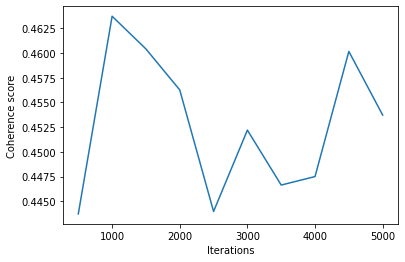

In [22]:
# Show graph
limit=5500; start=500; step=500;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Iterations")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [24]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Iterations =", m, 'Coherence: ', round(cv, 4))

Iterations = 500 Coherence:  0.4437
Iterations = 1000 Coherence:  0.4637
Iterations = 1500 Coherence:  0.4604
Iterations = 2000 Coherence:  0.4563
Iterations = 2500 Coherence:  0.444
Iterations = 3000 Coherence:  0.4522
Iterations = 3500 Coherence:  0.4466
Iterations = 4000 Coherence:  0.4475
Iterations = 4500 Coherence:  0.4602
Iterations = 5000 Coherence:  0.4537


In [25]:
# Coherence for 8-topic model, iterations 1K
print(coherence_values[1])

# Topics for 8-topic model, iterations 1K
malletModel_08i1k = model_list[1]
model_topics_08i1k = malletModel_08i1k.show_topics(formatted=False)
pprint(sorted(malletModel_08i1k.print_topics(num_words=20)))

# Convert results to lda model format for visualization.
MalletLDA08i1k = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_08i1k)

# Visualize the topics
pyLDAvis.enable_notebook()
vis08i1k = pyLDAvis.gensim.prepare(MalletLDA08i1k, corpus, id2word, sort_topics=False)
vis08i1k

0.4637315235411022
[(0,
  '0.107*"letter" + 0.075*"time" + 0.026*"day" + 0.026*"month" + '
  '0.025*"friend" + 0.018*"pleasure" + 0.017*"news" + 0.015*"sister" + '
  '0.015*"home" + 0.014*"health" + 0.013*"return" + 0.013*"opportunity" + '
  '0.013*"happiness" + 0.012*"kind" + 0.012*"writing" + 0.011*"manner" + '
  '0.011*"trust" + 0.011*"father" + 0.011*"care" + 0.011*"weather"'),
 (1,
  '0.032*"dollar" + 0.030*"year" + 0.028*"man" + 0.027*"work" + 0.024*"people" '
  '+ 0.022*"money" + 0.019*"business" + 0.018*"country" + 0.015*"cent" + '
  '0.012*"company" + 0.011*"expense" + 0.011*"board" + 0.011*"pay" + '
  '0.010*"month" + 0.009*"government" + 0.009*"wage" + 0.009*"lot" + '
  '0.009*"number" + 0.008*"office" + 0.008*"state"'),
 (2,
  '0.052*"brother" + 0.051*"mother" + 0.051*"friend" + 0.048*"family" + '
  '0.041*"letter" + 0.032*"year" + 0.032*"sister" + 0.030*"health" + '
  '0.027*"child" + 0.026*"son" + 0.025*"death" + 0.025*"wife" + '
  '0.023*"daughter" + 0.018*"uncle" + 0.01

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.277588 -0.043278       1        1  12.553826
1      0.191726 -0.224310       2        1  12.648418
2     -0.299279 -0.063645       3        1  11.925504
3     -0.022796 -0.012987       4        1  13.204409
4      0.006097 -0.039025       5        1  11.643314
5      0.203484 -0.159199       6        1  13.857467
6      0.151334  0.179986       7        1  13.102579
7      0.047022  0.362457       8        1  11.064484, topic_info=        Term         Freq        Total Category  logprob  loglift
11    letter  1151.000000  1151.000000  Default  30.0000  30.0000
57      time  1176.000000  1176.000000  Default  29.0000  29.0000
78      week   584.000000   584.000000  Default  28.0000  28.0000
8        day  1080.000000  1080.000000  Default  27.0000  27.0000
84    friend   577.000000   577.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
5     church    64.641893   145.690399   Topic8  -4.6786   1.3888
1047  window    42.763098    56.271183   Topic8  -5.0918   1.9269
177     room    63.647402   185.190634   Topic8  -4.6941   1.1334
8        day    70.608836  1080.379179   Topic8  -4.5903  -0.5265
947     call    42.763098    88.701348   Topic8  -5.0918   1.4718

[604 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1090      2  0.952176       ability
28        1  0.280295       account
28        2  0.207626       account
28        3  0.513874       account
186       1  0.980943  acquaintance
...     ...       ...           ...
61        3  0.328790          year
61        4  0.025814          year
61        6  0.320638          year
62        7  0.376138     yesterday
62        8  0.629623     yesterday

[699 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8])

## 3. A range of alphas

In [13]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for alpha in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=8, id2word=id2word, alpha=alpha, random_seed=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [10]:
# Can take a long time to run.
#model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        #corpus=corpus, 
                                                        #texts=data_lemmatizedNouns, 
                                                        #start=1, 
                                                        #limit=50, 
                                                        #step=4)

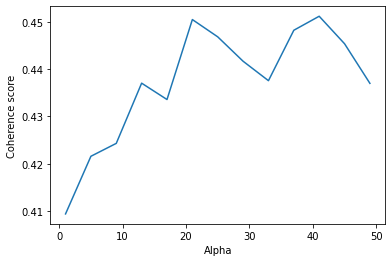

In [65]:
# Show graph
limit=50; start=1; step=4;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Alpha")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [67]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Alpha =", m, 'Coherence: ', round(cv, 4))

Alpha = 1 Coherence:  0.4094
Alpha = 5 Coherence:  0.4216
Alpha = 9 Coherence:  0.4243
Alpha = 13 Coherence:  0.437
Alpha = 17 Coherence:  0.4336
Alpha = 21 Coherence:  0.4505
Alpha = 25 Coherence:  0.4468
Alpha = 29 Coherence:  0.4417
Alpha = 33 Coherence:  0.4376
Alpha = 37 Coherence:  0.4482
Alpha = 41 Coherence:  0.4512
Alpha = 45 Coherence:  0.4454
Alpha = 49 Coherence:  0.437


In [14]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatizedNouns, 
                                                        start=50, 
                                                        limit=70, 
                                                        step=2)

Mallet LDA: 8 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 781
total tokens: 61621
<10> LL/token: -8.86503
<20> LL/token: -8.40234
<30> LL/token: -8.16595
<40> LL/token: -8.02846

0	6.25	time letter day write room world month happiness hand weather writing place deal spirit darling picture fire night ship account 
1	6.25	dollar pound money year country land man cent lot people house expense cost place government board market store price passage 
2	6.25	friend brother letter mother family health sister father wife son death daughter year time husband uncle cousin child opportunity kind 
3	6.25	letter book home paper heart girl pleasure time life thing mind hand kind return interest matter work trouble copy weather 
4	6.25	winter people work town place summer month country home day business state snow time city wage prospect reason situation change 
5	6.25	country acre year farm land wood foot person crop horse kind wheat road work tree garden farmer potato climate bushe

<360> LL/token: -7.7595
<370> LL/token: -7.75777
<380> LL/token: -7.75578
<390> LL/token: -7.75597

0	6.25	letter time home day month news write sister pleasure return weather account opportunity health friend happiness picture writing thing darling 
1	6.25	dollar money country man work year people pound cent lot board month expense account cost government company number wage property 
2	6.25	friend brother mother family child health sister letter son year father death wife daughter uncle aunt answer kind cousin doctor 
3	6.25	life hand book heart paper mind interest world year kind work age woman matter copy trial power change anxiety sorrow 
4	6.25	time day winter home summer place people work business country month state city town snow reason rest prospect weather situation 
5	6.25	land country year acre pound farm crop house price spring horse wheat foot farmer market potato kind wood bushel person 
6	6.25	day water house morning town night room hour side boat place evening church 

<710> LL/token: -7.76136
<720> LL/token: -7.75712
<730> LL/token: -7.75551
<740> LL/token: -7.75837

0	6.25	letter time month place sister day news friend pleasure weather account return opportunity girl home kind happiness health write manner 
1	6.25	dollar country work man year people money cent company month board pay account expense government wage office gold provision cost 
2	6.25	friend brother mother family child health letter sister son father death year wife daughter uncle aunt answer cousin life doctor 
3	6.25	life hand book heart world mind paper interest work matter year husband copy eye fear woman trial power spirit age 
4	6.25	time winter home summer day business people place thing month city week country snow change work rest reason state situation 
5	6.25	land country pound year acre farm money person crop price horse wheat foot house farmer spring market potato kind bushel 
6	6.25	day town house morning side hour water river boat church evening night room woman fire s

<60> LL/token: -7.93823
<70> LL/token: -7.90471
<80> LL/token: -7.88701
<90> LL/token: -7.86296

0	6.5	letter time hand heart write friend world life pleasure opportunity care father writing deal woman girl return matter mine fire 
1	6.5	people man business house kind thing river company year ship country island servant captain government vessel mind end work cow 
2	6.5	friend family brother mother sister health letter son wife year daughter death uncle child kind cousin paper husband father winter 
3	6.5	home week book school child boy life today store mail office spirit tomorrow table order head anxiety interest mind service 
4	6.5	day week child night room bed baby weather letter girl thing trouble happiness visit time winter darling blessing fear yesterday 
5	6.5	time month work summer year horse garden flower snow country winter expense copy spring home lot ground rain prospect kindness 
6	6.5	day place town house morning water church evening hour boat road tree side board sea ret

<410> LL/token: -7.75836
<420> LL/token: -7.76464
<430> LL/token: -7.76569
<440> LL/token: -7.76108

0	6.5	letter friend heart time sister hand life kind woman care father return opportunity husband happiness comfort news writing trust world 
1	6.5	people man year business country work state city company hand captain government case kind house gold war thing fact party 
2	6.5	brother mother family friend letter health sister son death wife child year daughter time home uncle aunt answer cousin money 
3	6.5	book life school mind work spirit paper interest home mail copy age world trial order difficulty anxiety matter change trouble 
4	6.5	week day child girl night thing room boy bed baby visit house today store head rest yesterday darling morning weather 
5	6.5	time month day winter home summer place country spring year deal weather manner garden snow health account reason pleasure climate 
6	6.5	day town place evening water house morning church hour boat tree side night wood ship clock

<760> LL/token: -7.75897
<770> LL/token: -7.75568
<780> LL/token: -7.75844
<790> LL/token: -7.76018

0	6.5	letter friend time sister news kind father life care return woman opportunity happiness flower girl writing picture trust husband heart 
1	6.5	people year man work business place city country company state rest law thing reason captain office government war party lot 
2	6.5	brother mother family letter friend child health year son sister wife daughter home uncle aunt answer money death cousin house 
3	6.5	hand book life mind work interest paper heart spirit world matter mail copy trial power anxiety age fear husband table 
4	6.5	week child day night room bed baby school thing boy girl today store visit head yesterday evening change tea island 
5	6.5	time month day winter summer country home place weather spring health deal letter garden snow year week manner account climate 
6	6.5	day town morning water church house hour place river evening boat tree side road home board wood nigh

<110> LL/token: -7.83373
<120> LL/token: -7.82116
<130> LL/token: -7.81359
<140> LL/token: -7.81738

0	6.75	friend letter brother mother family sister child son death wife heart daughter father uncle aunt life health cousin work trouble 
1	6.75	kind week thing year girl baby child husband dollar change rest woman school home house mind flower age pay eye 
2	6.75	time letter day month weather winter friend pleasure news home sister health opportunity write manner happiness return spring fire account 
3	6.75	hand home book time spirit life interest paper fear mail world case matter fall comfort tomorrow trial mind anxiety servant 
4	6.75	country year people place summer man month work winter business account state money family store time health respect reason government 
5	6.75	land country pound acre farm year dollar money cent crop price horse wheat person work farmer pork potato market cost 
6	6.75	day town house place morning evening church hour side river wood boat water tree road e

<460> LL/token: -7.76528
<470> LL/token: -7.77126
<480> LL/token: -7.75661
<490> LL/token: -7.74922

0	6.75	friend brother mother family letter child sister son death wife daughter health father uncle aunt cousin life trouble answer word 
1	6.75	kind girl year home child heart baby thing woman dollar mind rest flower change care age boy eye husband time 
2	6.75	time letter day month winter home weather summer news health place pleasure opportunity write happiness return friend writing trust account 
3	6.75	hand life book world paper home interest spirit mail work matter case copy difficulty trial anxiety tomorrow power fear pen 
4	6.75	people country year work man business place month money time state city company respect winter government war summer party reason 
5	6.75	country land pound year acre farm dollar money cent price crop person wheat foot farmer spring market house bushel potato 
6	6.75	day town morning church house side place river boat evening road tree hour clock wood wa

<810> LL/token: -7.77239
<820> LL/token: -7.76765
<830> LL/token: -7.77251
<840> LL/token: -7.77296

0	6.75	friend brother letter mother family sister son child death wife home daughter health father uncle aunt cousin year answer word 
1	6.75	girl child kind heart baby husband thing week woman year boy flower dollar fear age darling care eye visit loss 
2	6.75	time letter day winter month home weather health news summer place pleasure friend opportunity happiness trust spring write garden deal 
3	6.75	life hand book work world interest mind spirit paper mail matter difficulty case copy home servant power anxiety idea trial 
4	6.75	people country year time man work business month place state company city summer lot government war climate money party reason 
5	6.75	country land pound year dollar acre farm money cent crop price wheat person farmer market house potato cost wood bushel 
6	6.75	day town church side place morning water river boat road tree evening person ship hour captain hou

<160> LL/token: -7.79176
<170> LL/token: -7.79207
<180> LL/token: -7.78739
<190> LL/token: -7.78128

0	7	letter time day week home news baby night pleasure month thing sister write weather return opportunity visit happiness writing picture 
1	7	people man business year company thing state city office island rest town store government vessel war captain service law party 
2	7	friend brother mother letter family health child sister son time wife daughter death uncle answer aunt cousin home father kind 
3	7	life hand heart mind world year work husband friend spirit fear kind interest care woman paper flower account matter copy 
4	7	land country pound dollar money acre farm year person cent crop price house wheat farmer respect market cost bushel work 
5	7	time country winter month place year summer spring work day horse kind people garden snow home climate tree seed prospect 
6	7	day morning room evening town church night board place boat house clock water side river ship wood hour weathe

<560> LL/token: -7.76349
<570> LL/token: -7.76166
<580> LL/token: -7.76538
<590> LL/token: -7.75899

0	7	letter time home day news thing pleasure sister month week opportunity weather return happiness mail writing picture trust visit darling 
1	7	people year man business home state city company month office account interest law case difficulty government war service gold time 
2	7	friend brother mother family letter child health sister death wife time daughter son father uncle aunt kind cousin account write 
3	7	life hand book heart friend work mind paper husband world woman spirit matter age copy trial change power anxiety sorrow 
4	7	country land pound dollar acre money farm year cent person crop price wheat house board foot farmer market cost bushel 
5	7	winter time year country day summer place work month spring kind garden snow health horse mine people climate pay rain 
6	7	day town place morning house church evening side river hour water boat night wood clock road room ship tree 

<960> LL/token: -7.76154
<970> LL/token: -7.76489
<980> LL/token: -7.76732
<990> LL/token: -7.78009

0	7	letter time home day month news pleasure health sister weather opportunity write happiness return writing trust care father thing darling 
1	7	people year man business country place home city company difficulty state office government account party gold service interest meeting time 
2	7	friend brother mother family sister letter health son death wife child daughter uncle aunt cousin father home account time house 
3	7	life hand book heart mind work paper world friend husband kind age copy rest change loss trial anxiety eye pen 
4	7	country land pound dollar money acre farm year person cent crop price wheat house farmer cost market bushel wood wage 
5	7	year work winter summer time place day spring month kind country foot thing garden snow woman mine pay people seed 
6	7	day town hour morning place night evening water river house boat side tree clock church board end road ship wood 

<310> LL/token: -7.7325
<320> LL/token: -7.73414
<330> LL/token: -7.73493
<340> LL/token: -7.73751

0	7.25	letter time girl month write news baby sister pleasure thing return night cousin visit opportunity happiness flower mail writing home 
1	7.25	country land pound dollar year acre farm money person cent crop price wheat farmer potato market bushel horse wood cost 
2	7.25	friend child brother mother family health sister son year death wife father daughter kind uncle aunt money letter doctor answer 
3	7.25	life hand book heart mind world interest paper matter copy husband eye trouble trial anxiety pen child today change power 
4	7.25	day week time winter home boy account school weather snow trouble store summer spring town attention kind pain bed frost 
5	7.25	place year people month country time work summer business home man manner garden situation friend state comfort kind case climate 
6	7.25	day morning room evening town night church place hour spirit house boat tree clock board r

<660> LL/token: -7.73897
<670> LL/token: -7.73693
<680> LL/token: -7.72713
<690> LL/token: -7.72367

0	7.25	letter time girl home write news pleasure month return thing place happiness sister mail writing trust garden opportunity flower father 
1	7.25	land country pound dollar money acre farm year cent crop price wheat person farmer wood spring market potato cost bushel 
2	7.25	friend brother mother family health sister child year son death wife kind daughter uncle letter aunt cousin father house paper 
3	7.25	life hand book heart world work mind spirit paper copy husband eye friend rest power trial pen trouble sorrow care 
4	7.25	week day child winter boy home baby school visit weather time bed today trouble snow account fear spring yesterday doctor 
5	7.25	country year people summer month place business time home state man manner situation case account city difficulty office climate reason 
6	7.25	day morning night town room evening church hour house boat clock fall side place tree b

Mallet LDA: 8 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 781
total tokens: 61621
<10> LL/token: -8.89706
<20> LL/token: -8.45167
<30> LL/token: -8.20274
<40> LL/token: -8.0507

0	7.5	letter time week day write baby month home night thing news snow writing fire captain place deal room account matter 
1	7.5	dollar work house cent lot board people respect thing island water cost pork foot school head week farmer man tea 
2	7.5	friend brother family mother sister son letter death wife daughter father husband uncle child health time answer heart year life 
3	7.5	town home house time evening day church visit hand return paper yesterday mind woman doctor copy book today tomorrow letter 
4	7.5	winter year health summer home time trouble business people month letter kind life fear garden difficulty cousin reason case acquaintance 
5	7.5	country land year pound money acre farm place person crop price horse wheat wood people potato bushel government wage tree 
6	7.5	day morning

<360> LL/token: -7.75394
<370> LL/token: -7.74647
<380> LL/token: -7.74974
<390> LL/token: -7.74868

0	7.5	letter time day home week write place news baby month pleasure girl night opportunity thing writing snow picture trust prayer 
1	7.5	work dollar house people cent store school lot board thing money pay foot pork cost tea day kind deal time 
2	7.5	friend child brother mother family sister health son death wife daughter father year uncle paper kind aunt answer trouble letter 
3	7.5	week day town house home room church boy spirit yesterday today visit evening return mail place weather table dinner tomorrow 
4	7.5	winter summer month people year country time business weather spring manner city state garden change health idea matter difficulty respect 
5	7.5	country land year pound money acre farm dollar place crop price person wheat wood man farmer market potato bushel wage 
6	7.5	day morning night side hour time man water river company bed place office fall ship tree evening boat clo

<730> LL/token: -7.74932
<740> LL/token: -7.74991

0	7.5	letter time day month week girl write news baby weather place pleasure sister home opportunity night happiness return thing friend 
1	7.5	work dollar house cent lot people foot woman store water board thing day pay pork kind spring head snow money 
2	7.5	friend brother mother family health child sister son wife daughter letter death year home uncle aunt cousin father kind account 
3	7.5	week child home day house room school boy town church visit bed yesterday today evening mail spirit island clock morning 
4	7.5	winter summer people year country time business month state manner case account garden fear matter difficulty spring reason war life 
5	7.5	country land year pound money acre farm place dollar person crop price wheat farmer market bushel horse man wage wood 
6	7.5	day night place morning man side hour river company time fall wood office ship town tree boat fire evening water 
7	7.5	life hand book heart world mind work int

<60> LL/token: -7.95096
<70> LL/token: -7.91841
<80> LL/token: -7.89717
<90> LL/token: -7.86164

0	7.75	letter time month book write hand pleasure life world kind opportunity care thing flower heart writing father happiness trust news 
1	7.75	land country pound year acre farm dollar cent price money wheat house wood tree pork cost bushel spring foot seed 
2	7.75	friend brother sister health family year son wife life daughter husband answer trouble time kind mother paper father girl heart 
3	7.75	child mother week death boy baby letter uncle girl winter aunt school home visit cousin rest today store picture doctor 
4	7.75	country summer work people place year money business dollar winter person crop state family respect farmer difficulty case wage vessel 
5	7.75	time day week home thing weather evening bed yesterday woman snow garden clock leave ship tomorrow lot company morning fellow 
6	7.75	day house town night room place morning church side boat island hour table captain road sea or

<410> LL/token: -7.75808
<420> LL/token: -7.75094
<430> LL/token: -7.7548
<440> LL/token: -7.75677

0	7.75	letter hand life book heart pleasure time kind woman opportunity fear happiness care flower writing father trust return spirit news 
1	7.75	land country pound dollar year acre farm money cent price crop wheat horse spring farmer house market potato cost bushel 
2	7.75	friend letter brother family sister health time year son wife month trouble daughter mother answer kind husband father life word 
3	7.75	child mother boy week death letter home baby school visit uncle aunt girl cousin today mail mind paper age doctor 
4	7.75	country place summer year people business winter person home state money case situation difficulty respect climate reason interest world mind 
5	7.75	day time week home weather thing night winter write girl yesterday snow leave morning vessel change account evening captain pain 
6	7.75	day town house room place morning hour church evening night boat side clock wo

<760> LL/token: -7.75595
<770> LL/token: -7.74706
<780> LL/token: -7.7595
<790> LL/token: -7.74333

0	7.75	life hand book heart letter work kind care world happiness paper friend spirit flower trust copy husband garden prayer peace 
1	7.75	land country pound year dollar money acre farm crop price cent wheat house horse farmer wood market potato bushel wage 
2	7.75	letter friend brother time sister family health son father wife mother year daughter summer news write answer kind account pleasure 
3	7.75	child boy week letter mother death girl baby uncle school aunt cousin trouble bed today mind mail rest home doctor 
4	7.75	country place year people business person interest state summer home case situation matter difficulty climate manner office prospect mind expense 
5	7.75	day time week home winter month night weather thing yesterday change snow visit evening rain leave journey girl pain walk 
6	7.75	day town morning place house church hour room evening boat board water road side retur

<110> LL/token: -7.81251
<120> LL/token: -7.80662
<130> LL/token: -7.79659
<140> LL/token: -7.79397

0	8	child week home boy girl wife baby school visit thing rest today store mail writing leave age change fire island 
1	8	country land pound year dollar acre farm money person cent crop price wheat wood farmer market cost bushel wage bank 
2	8	friend brother family health letter time sister year summer daughter country month winter son uncle answer cousin money opportunity account 
3	8	life hand book heart world trouble mind husband work year paper friend interest death people matter woman copy case comfort 
4	8	house place day town time room winter people head horse weather state tree deal servant water door summer description building 
5	8	work man business month people year company spring garden thing time captain government vessel ship foot fellow piece seed river 
6	8	day night morning evening bed week church board side hour boat account end clock water fall home dinner sea fear 
7

<510> LL/token: -7.75513
<520> LL/token: -7.75733
<530> LL/token: -7.75473
<540> LL/token: -7.7571

0	8	child week boy home girl baby school visit bed rest today mail yesterday thing store doctor island fire trouble change 
1	8	country land pound year dollar money acre farm cent crop price person wheat farmer market potato bushel wood wage seed 
2	8	brother mother friend family sister letter health year time wife home son daughter death uncle winter answer summer father cousin 
3	8	life book heart hand interest work mind friend world husband spirit paper trouble woman matter copy year dollar trial power 
4	8	house day place town time winter people room summer head water gentleman state side building hand door person ground horse 
5	8	work man month people time year country business lot company government thing case reason gold kind provision number foot law 
6	8	day night morning evening church hour home boat river tree clock board water account return weather wood sea captain fall 
7	

<890> LL/token: -7.76984

0	8	week child boy girl baby school visit night bed thing today store home mail tea island trouble day afternoon face 
1	8	country land pound dollar acre farm money year person cent price crop wheat wood farmer market potato bushel wage seed 
2	8	brother mother family friend letter sister health time year wife home summer daughter son death uncle aunt answer kind winter 
3	8	life book heart hand world husband interest friend mind paper trouble spirit work age matter year copy change loss trial 
4	8	day house place time town winter room woman summer fire hand ground door rain people window heat distance servant meeting 
5	8	work people year country man business month time city company lot pay reason kind government law gold provision case mind 
6	8	day morning night evening church water side hour river boat home account clock ship board return yesterday captain dinner sea 
7	8	letter time month news home pleasure friend father weather day opportunity health man

<210> LL/token: -7.76314
<220> LL/token: -7.75791
<230> LL/token: -7.75257
<240> LL/token: -7.74418

0	8.25	house day town week thing winter room church today store tea snow fire island kind building door deal eye visit 
1	8.25	year people work country man month money business state summer city company difficulty expense reason lot kind government case servant 
2	8.25	friend family brother mother sister health son death wife heart year daughter letter uncle child husband answer aunt cousin life 
3	8.25	hand life book mind world woman spirit interest comfort paper writing matter home copy table trial fall anxiety power wood 
4	8.25	letter time month place write news winter friend summer weather pleasure care kind father opportunity spring happiness return trust darling 
5	8.25	country land pound dollar acre farm year place person money cent crop price wheat horse wood farmer market cost bushel 
6	8.25	day night morning evening baby hour water place fear side clock board river tree idea 

<560> LL/token: -7.74504
<570> LL/token: -7.75431
<580> LL/token: -7.76188
<590> LL/token: -7.75031

0	8.25	house day town winter room week thing church today store tea snow fire pork island servant visit tomorrow door building 
1	8.25	year people country work man business summer month state city money case kind company place difficulty reason government war expense 
2	8.25	friend brother mother family sister child letter son death wife year daughter health father uncle kind aunt cousin answer change 
3	8.25	life hand book heart world mind paper interest woman husband matter spirit comfort copy care trouble eye trial anxiety age 
4	8.25	letter time month health write place news day friend pleasure weather winter opportunity happiness summer sister return trust spring writing 
5	8.25	land country pound dollar acre farm money year cent person crop price place wheat board foot farmer market potato cost 
6	8.25	day morning water evening hour side night river place clock road boat wood fall

<910> LL/token: -7.75502
<920> LL/token: -7.75226
<930> LL/token: -7.75231
<940> LL/token: -7.75007

0	8.25	house town day room week winter today store tea snow church fire thing pork island visit door servant deal window 
1	8.25	people country year man business place state month city money kind summer time company case government office party gold heat 
2	8.25	friend brother family mother sister child health son death year wife letter daughter uncle aunt answer kind cousin father word 
3	8.25	life hand book heart mind world work paper trouble matter copy interest spirit husband eye trial power anxiety fear pen 
4	8.25	letter time month home summer write news pleasure place friend winter weather opportunity spring happiness day picture trust father writing 
5	8.25	land country pound dollar acre farm money year cent crop price work wheat foot person farmer market potato cost bushel 
6	8.25	day morning water evening place home night river boat side tree clock hour return fall road ship w

<260> LL/token: -7.76814
<270> LL/token: -7.77201
<280> LL/token: -7.78394
<290> LL/token: -7.77749

0	8.5	letter time month home father health friend sister write news day weather pleasure return opportunity winter manner happiness writing trust 
1	8.5	home people state company business thing servant number mind difficulty island reason captain vessel war interest prospect board party passage 
2	8.5	life hand book heart friend husband trouble kind world woman age death paper matter year copy change loss power trial 
3	8.5	child brother mother family friend sister daughter week son health uncle aunt house cousin visit death today answer doctor boy 
4	8.5	country year work place winter people man month summer time money dollar lot situation business account respect law wife wage 
5	8.5	land country pound acre farm year dollar money cent crop price wheat horse person foot farmer market pork potato wood 
6	8.5	day morning house town evening room church hour water night boat place clock fa

<610> LL/token: -7.74708
<620> LL/token: -7.74489
<630> LL/token: -7.74373
<640> LL/token: -7.74766

0	8.5	letter time month sister news write friend health pleasure home opportunity account father manner happiness winter place writing return picture 
1	8.5	business home state thing situation change idea servant difficulty board office mind island interest reason captain vessel prospect case expense 
2	8.5	life hand book heart friend work husband world paper trouble year age matter mind spirit copy woman trial eye kind 
3	8.5	child brother family mother friend health sister wife letter daughter son home uncle death aunt house visit cousin year kind 
4	8.5	time country people year work place winter man summer month money city account company rest respect lot government day town 
5	8.5	land country pound dollar acre year farm cent crop foot price person money wheat horse farmer potato house cost bushel 
6	8.5	day morning house town church evening water room place river boat hour road nig

<960> LL/token: -7.75119
<970> LL/token: -7.74751
<980> LL/token: -7.75546
<990> LL/token: -7.76268

0	8.5	letter time month friend news home pleasure health weather place summer return kind winter write father happiness sister opportunity writing 
1	8.5	business home account thing state case situation difficulty servant pay expense office people mind captain idea interest prospect reason vessel 
2	8.5	life hand book heart world paper trouble woman change mind husband work spirit matter copy care age trial pen rest 
3	8.5	family brother mother friend child sister year son health death wife letter home daughter uncle aunt cousin house answer father 
4	8.5	time work year people country place man winter day month summer money lot city government company snow rest mine field 
5	8.5	country land pound dollar acre farm money year cent crop price horse person wheat house farmer potato cost wood market 
6	8.5	day town house church water morning river side boat night road hour place room board 

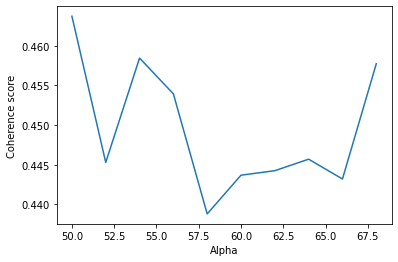

In [15]:
# Show graph
limit=70; start=50; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Alpha")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [16]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Alpha =", m, 'Coherence: ', round(cv, 4))

Alpha = 50 Coherence:  0.4637
Alpha = 52 Coherence:  0.4453
Alpha = 54 Coherence:  0.4585
Alpha = 56 Coherence:  0.4539
Alpha = 58 Coherence:  0.4388
Alpha = 60 Coherence:  0.4437
Alpha = 62 Coherence:  0.4443
Alpha = 64 Coherence:  0.4457
Alpha = 66 Coherence:  0.4432
Alpha = 68 Coherence:  0.4577


Not extracting and visualizing topics because the results are the same as in step 2.

## 4. Optimize hyperparameters

In [26]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for optimize_interval in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=8, id2word=id2word, optimize_interval=optimize_interval, random_seed=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [30]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatizedNouns, 
                                                        start=100, 
                                                        limit=700, 
                                                        step=100)

Mallet LDA: 8 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 781
total tokens: 61621
<10> LL/token: -8.86503
<20> LL/token: -8.40234
<30> LL/token: -8.16595
<40> LL/token: -8.02846

0	6.25	time letter day write room world month happiness hand weather writing place deal spirit darling picture fire night ship account 
1	6.25	dollar pound money year country land man cent lot people house expense cost place government board market store price passage 
2	6.25	friend brother letter mother family health sister father wife son death daughter year time husband uncle cousin child opportunity kind 
3	6.25	letter book home paper heart girl pleasure time life thing mind hand kind return interest matter work trouble copy weather 
4	6.25	winter people work town place summer month country home day business state snow time city wage prospect reason situation change 
5	6.25	country acre year farm land wood foot person crop horse kind wheat road work tree garden farmer potato climate bushe

<360> LL/token: -7.86888
<370> LL/token: -7.87234
<380> LL/token: -7.86789
<390> LL/token: -7.86535

0	6.14143	letter time day month news write home sister pleasure health weather return friend account happiness thing opportunity writing darling trust 
1	5.45002	dollar money year country man cent people pound board expense month account government wage property gold company person employment bank 
2	6.09938	friend brother mother family child year letter sister son health death wife father daughter uncle aunt answer kind cousin line 
3	5.62734	life hand book heart mind world paper work interest copy husband woman change trial kind matter anxiety spirit care sorrow 
4	5.87727	time winter day work people place home country business summer month city town state snow spring rest reason man prospect 
5	5.20611	land country pound acre year farm price crop wheat horse house farmer market bushel potato work foot wood place seed 
6	5.66848	day town water morning night side evening hour house roo

<710> LL/token: -7.95462
<720> LL/token: -7.95205
<730> LL/token: -7.94999
<740> LL/token: -7.95802

0	5.15727	letter time day month place home summer weather friend winter country pleasure news sister health kind return happiness manner thing 
1	2.92741	country year people business man interest state government office difficulty home field thousand meeting side month war company world party 
2	4.52757	brother mother letter friend family year child sister health wife son death daughter uncle aunt father cousin winter house write 
3	3.19735	book heart life hand work husband copy paper world mind spirit trial kind sorrow friend eye flower nature age interest 
4	3.98207	time work day people place week month summer man dollar thing lot money house mind pay water home foot city 
5	2.86646	country land pound acre farm year dollar money crop price wheat cent farmer person market bushel wage wood potato horse 
6	3.34512	day town morning house boat water hour side river tree room wood night pla

<60> LL/token: -7.91147
<70> LL/token: -7.88174
<80> LL/token: -7.86374
<90> LL/token: -7.84896

0	6.25	time letter day write friend world news month happiness spirit writing picture care trust deal room darling mine ship eye 
1	6.25	dollar money pound country year man land cent lot store pay expense market pork cost work government people difficulty house 
2	6.25	friend brother family letter mother health sister son father death wife year daughter husband uncle cousin opportunity child answer blessing 
3	6.25	book heart hand home paper life pleasure mind work kind woman thing trouble interest girl matter age return copy account 
4	6.25	winter month place people summer day work time town business home city thing snow person weather state reason wage situation 
5	6.25	country land year acre farm wood kind foot crop horse wheat tree garden spring house person farmer bushel potato river 
6	6.25	day house morning water hour evening boat side church place room night end company board return

<410> LL/token: -7.80812
<420> LL/token: -7.83415
<430> LL/token: -7.85499
<440> LL/token: -7.8639

0	6.14422	letter time home day month friend place pleasure news health weather account thing sister father write happiness deal writing opportunity 
1	5.44199	money dollar year country work man cent company pound cost government account people wage board number expense month employment difficulty 
2	6.03675	friend brother family mother letter sister child year health son death wife daughter uncle answer life aunt kind cousin husband 
3	5.56913	book heart life hand mind interest paper kind work age woman year matter copy world power trial sorrow anxiety fear 
4	5.9119	time day winter home people summer place country business month work state city rest reason snow situation change town person 
5	5.2129	land country pound acre year farm crop price horse wheat house person tree farmer spring wood potato market foot bushel 
6	5.65204	day town house morning water room side hour boat evening fi

<760> LL/token: -7.94894
<770> LL/token: -7.94176
<780> LL/token: -7.9508
<790> LL/token: -7.94463

0	5.84743	letter time day month friend news pleasure health place return home sister weather opportunity happiness write kind writing care trust 
1	4.65761	work man people company business board cent month office government money gold employment year city thing provision fact foot captain 
2	5.69056	brother mother letter family friend sister health child wife son daughter uncle father death aunt cousin money year answer kind 
3	4.94622	book hand heart life work year paper mind friend world copy kind husband interest spirit trial death sorrow matter flower 
4	5.53782	time country winter year home people summer place day business person state work month climate reason account town case difficulty 
5	4.45197	land country pound year acre farm dollar money crop price wheat farmer market bushel person potato house horse seed wood 
6	4.99865	day town water morning house night hour river side ro

<110> LL/token: -7.81695
<120> LL/token: -7.81278
<130> LL/token: -7.79556
<140> LL/token: -7.79921

0	6.25	time letter day month write news friend world thing account happiness spirit weather writing sister picture care flower trust darling 
1	6.25	pound dollar money country year man cent price land expense pay board pork cost lot government people work store number 
2	6.25	friend brother mother family health letter sister son year father child death wife daughter uncle cousin opportunity answer aunt husband 
3	6.25	hand book heart life paper kind pleasure mind work home interest age matter copy woman trial girl trouble return party 
4	6.25	winter place people time day work town summer month country business city thing weather state home rest snow person reason 
5	6.25	land country year acre farm wood foot spring kind crop horse wheat garden tree person house farmer potato bushel building 
6	6.25	day house room morning water hour company boat evening side place church return night lea

<460> LL/token: -7.89602
<470> LL/token: -7.8992
<480> LL/token: -7.88849
<490> LL/token: -7.8892

0	6.14143	letter time home day month news health pleasure weather friend opportunity return happiness write place kind summer trust manner darling 
1	5.45002	country year man dollar people cent money state company account person month board wage difficulty government captain number gold employment 
2	6.09938	friend brother mother family letter sister child death wife year daughter son health uncle aunt father cousin account kind dollar 
3	5.62734	life hand book heart paper mind world work husband interest matter copy friend trial kind spirit power sorrow age woman 
4	5.87727	time day winter work people place home business month year summer city snow lot country situation reason rest change case 
5	5.20611	country land pound acre farm year money crop price wheat dollar house farmer market bushel potato person foot horse wood 
6	5.66848	day morning town house place water hour night room sid

<810> LL/token: -7.94915
<820> LL/token: -7.94649
<830> LL/token: -7.94796
<840> LL/token: -7.95641

0	5.90428	letter time day month friend weather winter place home health summer pleasure news happiness kind garden opportunity country return write 
1	4.71447	country people year man business state place person government interest case office difficulty world number meeting party expense duty thousand 
2	5.69899	letter brother mother family friend sister year child health wife daughter son home death father uncle aunt cousin answer kind 
3	4.91385	life book heart hand mind work husband copy trial friend paper woman eye spirit age sorrow care world child anxiety 
4	5.43416	time day work home month people week city place man house summer lot winter company money mind pay thing store 
5	4.45174	country land pound acre dollar farm year money price wheat crop cent market potato farmer bushel wood person house board 
6	5.04509	day town water morning house side boat evening night tree road shi

<160> LL/token: -7.78744
<170> LL/token: -7.78458
<180> LL/token: -7.79206
<190> LL/token: -7.78617

0	6.25	letter time month write news friend day account sister world place weather happiness thing flower spirit care writing pleasure manner 
1	6.25	pound dollar money year country man cent people house pay expense difficulty cost board work lot government store number cow 
2	6.25	friend brother mother family health sister year letter son father wife death child daughter home uncle aunt answer cousin kind 
3	6.25	hand life book heart paper mind work interest kind age matter fear copy husband trouble trial power order return woman 
4	6.25	day winter time people work month country place town summer business thing city home snow rest weather man person state 
5	6.25	land country year acre farm wood foot crop horse wheat kind garden person spring farmer market tree potato bushel building 
6	6.25	day room morning house hour evening water side night company boat church woman return end place 

<510> LL/token: -7.87701
<520> LL/token: -7.87196
<530> LL/token: -7.87577
<540> LL/token: -7.8839

0	6.14422	letter time day month friend home health news pleasure weather opportunity place sister happiness write manner trust darling care return 
1	5.44199	dollar work man year money cent month people board company country government wage expense provision gold office foot cost employment 
2	6.03675	friend brother mother family letter sister child son death health wife daughter kind uncle aunt father answer year cousin home 
3	5.56913	life book heart hand mind world paper work husband spirit copy trouble matter kind trial woman power sorrow change anxiety 
4	5.9119	time winter people home country day summer place year business work state city month rest weather town reason situation snow 
5	5.2129	country land pound year acre farm money crop price wheat house person farmer tree market potato place bushel spring wood 
6	5.65204	day house morning town hour night water evening river side 

<860> LL/token: -7.94431
<870> LL/token: -7.95204
<880> LL/token: -7.93334
<890> LL/token: -7.95019

0	5.84669	letter time day month home friend news weather pleasure health write opportunity return happiness deal trust place sister darling kind 
1	4.63284	work dollar man time people company city board thing money business lot month pay cent gold provision employment kind captain 
2	5.67674	brother mother family letter friend sister time health child wife son daughter death year uncle aunt father kind cousin house 
3	4.91804	life book heart hand work mind world husband friend paper year spirit copy age trial sorrow trouble flower interest nature 
4	5.51969	country people place year winter summer home business month time state person account man change difficulty reason situation idea prospect 
5	4.46307	land country pound year acre farm money dollar crop price wheat farmer person bushel horse market potato wood seed place 
6	4.97355	day town house water morning evening night hour river

<210> LL/token: -7.77128
<220> LL/token: -7.77133
<230> LL/token: -7.7777
<240> LL/token: -7.77456

0	6.25	letter time day write news month account weather friend pleasure thing opportunity place happiness comfort manner writing picture darling fire 
1	6.25	dollar money year pound cent man lot country month board cost pay expense government work property number cow gold provision 
2	6.25	friend brother mother family health sister letter year son father death wife child daughter uncle answer aunt cousin kind husband 
3	6.25	hand book heart life paper mind work trouble kind interest fear age matter world copy woman trial power anxiety return 
4	6.25	time people day winter work summer home place country month business state city town man snow thing rest situation reason 
5	6.25	country land year acre farm wood pound crop horse wheat place person house kind foot farmer spring market potato tree 
6	6.25	day morning house hour town water night side company evening boat room return river end 

<560> LL/token: -7.86714
<570> LL/token: -7.86427
<580> LL/token: -7.87261
<590> LL/token: -7.87377

0	6.1233	letter time month day friend home health pleasure news sister opportunity place return happiness kind manner writing deal weather darling 
1	5.44372	dollar man year country people work cent business money board company month state government difficulty servant expense account employment land 
2	5.99895	friend brother mother family letter child sister son wife health father daughter death year uncle aunt kind cousin answer write 
3	5.56693	life book hand heart paper work mind interest year woman husband world matter copy trial spirit age power sorrow nature 
4	5.91769	time day home winter summer place people work week country city month thing snow weather change reason rest town person 
5	5.22843	country land pound year acre farm money crop price wheat horse farmer bushel person market potato house foot spring place 
6	5.63961	day town house water morning side river hour boat ni

<910> LL/token: -7.89712
<920> LL/token: -7.90232
<930> LL/token: -7.88688
<940> LL/token: -7.89209

0	6.1233	letter time friend news month day pleasure return health opportunity manner happiness kind father write weather sister trust darling writing 
1	5.44372	people year man country business state company money interest government city difficulty office gold mind world respect expense thousand duty 
2	5.99895	brother mother family letter friend sister health year child wife daughter son death uncle aunt cousin money father answer account 
3	5.56693	hand book life heart work mind paper friend kind husband copy spirit trial care world sorrow woman nature age dollar 
4	5.91769	time day home winter work month summer place week house country thing snow weather year rest town people change lot 
5	5.22843	country land pound acre farm dollar year money cent crop price wheat person farmer market bushel foot potato house wage 
6	5.63961	day water house morning town room place boat side tree ri

<260> LL/token: -7.76875
<270> LL/token: -7.76554
<280> LL/token: -7.78071
<290> LL/token: -7.77849

0	6.25	letter time day month write news thing friend weather pleasure home sister manner happiness return account comfort writing trust opportunity 
1	6.25	dollar money year pound man country cent lot account month work expense cost board captain number government situation people pay 
2	6.25	friend brother mother family health sister year letter son child father death wife daughter uncle aunt answer cousin kind summer 
3	6.25	hand life book heart paper mind interest kind work world woman trouble copy matter age power trial pen husband care 
4	6.25	time winter day people home place work country business summer month state city snow rest town weather reason change thing 
5	6.25	country land acre year farm wood pound crop horse wheat kind person foot spring price house farmer market pork potato 
6	6.25	day house morning town water hour night room evening company place side boat ship dinne

<610> LL/token: -7.81717
<620> LL/token: -7.85149
<630> LL/token: -7.85833
<640> LL/token: -7.87129

0	6.09829	letter time day friend home month news pleasure health sister opportunity happiness account manner writing write darling return father place 
1	5.42951	dollar country year money man work people cent board company month lot government expense account gold number climate cost case 
2	5.98116	brother mother friend family letter sister child health son death wife year daughter uncle aunt father cousin kind answer doctor 
3	5.57427	life book hand heart work world year paper interest mind matter husband copy age spirit trial anxiety power sorrow woman 
4	5.94174	time day winter summer home people place country month business work city town thing weather week change snow reason rest 
5	5.23692	land pound country year acre farm crop person price wheat foot horse market farmer bushel money kind house spring potato 
6	5.62884	day morning house water town night river boat place hour side

<960> LL/token: -7.90467
<970> LL/token: -7.89099
<980> LL/token: -7.90516
<990> LL/token: -7.90613

0	6.09829	letter time friend day health month kind pleasure news weather return happiness father place sister manner writing trust home opportunity 
1	5.42951	people year country man business state company place city government interest gold office party fact expense difficulty account war meeting 
2	5.98116	family brother mother friend letter sister year health wife son child death daughter uncle aunt cousin write answer house father 
3	5.57427	hand life book heart paper mind work world husband woman copy care matter trial age friend anxiety sorrow interest year 
4	5.94174	time day home winter month work summer week place country thing snow change house rest situation lot town weather prospect 
5	5.23692	land country pound dollar acre year farm money cent crop price wheat person farmer market work bushel wage potato wood 
6	5.62884	day town house water morning night side tree room hour

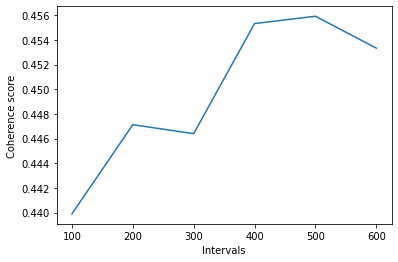

In [31]:
# Show graph
limit=700; start=100; step=100;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Intervals")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [33]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Intervals =", m, 'Coherence: ', round(cv, 4))

Intervals = 100 Coherence:  0.4399
Intervals = 200 Coherence:  0.4471
Intervals = 300 Coherence:  0.4464
Intervals = 400 Coherence:  0.4553
Intervals = 500 Coherence:  0.4559
Intervals = 600 Coherence:  0.4533


In [38]:
# Coherence for 8-topic model, iterations 1K, alpha 50, optimization intervals 500
print(coherence_values[4])

# Topics for 8-topic model, iterations 1K, alpha 50, optimization intervals 500
malletModel_08i1ka5o5 = model_list[4]
model_topics_08i1ka5o5 = malletModel_08i1ka5o5.show_topics(formatted=False)
pprint(sorted(malletModel_08i1ka5o5.print_topics(num_words=20)))

# Convert results to lda model format for visualization.
MalletLDA08i1ka5o5 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_08i1ka5o5)

# Visualize the topics
pyLDAvis.enable_notebook()
vis08i1ka5o5 = pyLDAvis.gensim.prepare(MalletLDA08i1ka5o5, corpus, id2word, sort_topics=False)
vis08i1ka5o5

0.4559120696226197
[(0,
  '0.102*"letter" + 0.060*"time" + 0.025*"day" + 0.021*"news" + 0.021*"friend" '
  '+ 0.019*"month" + 0.016*"pleasure" + 0.015*"health" + 0.013*"return" + '
  '0.013*"kind" + 0.013*"sister" + 0.013*"place" + 0.013*"happiness" + '
  '0.012*"opportunity" + 0.012*"father" + 0.011*"manner" + 0.011*"trust" + '
  '0.011*"weather" + 0.011*"writing" + 0.010*"darling"'),
 (1,
  '0.037*"year" + 0.036*"people" + 0.028*"man" + 0.027*"country" + '
  '0.022*"business" + 0.012*"company" + 0.011*"place" + 0.011*"city" + '
  '0.010*"state" + 0.010*"office" + 0.010*"government" + 0.008*"interest" + '
  '0.008*"gold" + 0.007*"land" + 0.007*"fact" + 0.006*"difficulty" + '
  '0.006*"side" + 0.006*"party" + 0.006*"person" + 0.006*"account"'),
 (2,
  '0.052*"brother" + 0.051*"mother" + 0.046*"family" + 0.045*"friend" + '
  '0.044*"letter" + 0.033*"sister" + 0.028*"health" + 0.028*"child" + '
  '0.026*"year" + 0.024*"wife" + 0.021*"son" + 0.019*"death" + 0.019*"home" + '
  '0.018*"daug

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.187511 -0.073404       1        1  13.048161
1      0.240075 -0.131138       2        1  11.766209
2     -0.215105 -0.173920       3        1  12.210770
3     -0.122454 -0.123387       4        1  12.824514
4     -0.012930  0.069981       5        1  11.808199
5      0.275557 -0.111127       6        1  14.057220
6      0.111670  0.224987       7        1  12.829418
7     -0.089303  0.318007       8        1  11.455509, topic_info=         Term         Freq        Total Category  logprob  loglift
11     letter  1187.000000  1187.000000  Default  30.0000  30.0000
57       time  1198.000000  1198.000000  Default  29.0000  29.0000
78       week   594.000000   594.000000  Default  28.0000  28.0000
8         day  1088.000000  1088.000000  Default  27.0000  27.0000
31    brother   397.000000   397.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
5      church    61.601339   146.764428   Topic8  -4.7615   1.2986
2296  captain    42.414037    73.455184   Topic8  -5.1347   1.6175
8         day    93.916796  1088.808584   Topic8  -4.3397  -0.2837
979     store    46.453469   103.713712   Topic8  -5.0437   1.3635
41       home    52.512617   541.680039   Topic8  -4.9211  -0.1669

[695 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
28        1  0.229574    account
28        2  0.209167    account
28        3  0.494860    account
28        5  0.061220    account
677       5  0.960527       acct
...     ...       ...        ...
61        6  0.268929       year
62        5  0.016240  yesterday
62        7  0.251715  yesterday
62        8  0.730786  yesterday
5553      3  0.995030       youe

[987 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8])

In [40]:
# Non-optimized Parameters
MalletLDA08i1k.save('20240611_PhD_TopicLtrMAL08i1ka5')
pyLDAvis.save_html(vis08i1k, '20240611_PhD_TopicLtrMAL08i1ka5.html')

In [39]:
# Optimized Parameters
MalletLDA08i1ka5o5.save('20240611_PhD_TopicLtrMAL08i1ka5o5')
pyLDAvis.save_html(vis08i1ka5o5, '20240611_PhD_TopicLtrMAL08i1ka5o5.html')

## 5. Testing a range of random seeds

In [46]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for random_seed in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=8, id2word=id2word, random_seed=random_seed)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [47]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatizedNouns, 
                                                        start=10, 
                                                        limit=110, 
                                                        step=10)

Mallet LDA: 8 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 781
total tokens: 61621
<10> LL/token: -8.85688
<20> LL/token: -8.41407
<30> LL/token: -8.19651
<40> LL/token: -8.06584

0	6.25	work dollar business year board city situation state man case pay expense copy difficulty bushel kind house office wage mind 
1	6.25	letter friend brother family sister mother health year son father death time kind wife daughter summer life trouble world answer 
2	6.25	letter hand girl night heart room time day weather woman news spirit life paper writing pleasure trust picture eye happiness 
3	6.25	time day month week home house people write winter snow summer thing fall line side water country letter year opportunity 
4	6.25	country land pound year acre money farm cent crop price wheat dollar foot number farmer market lot cost place government 
5	6.25	morning people time person boat company hour place end man evening island return captain vessel bank town fellow side passage 
6	6.25	

KeyboardInterrupt: 

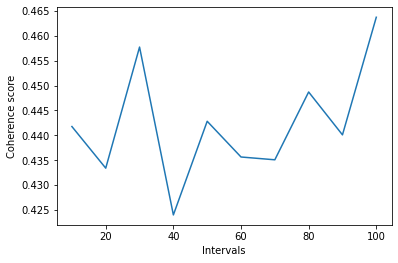

In [48]:
# Show graph
limit=110; start=10; step=10;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Intervals")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [49]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Seed =", m, 'Coherence: ', round(cv, 4))

Seed = 10 Coherence:  0.4418
Seed = 20 Coherence:  0.4334
Seed = 30 Coherence:  0.4577
Seed = 40 Coherence:  0.424
Seed = 50 Coherence:  0.4428
Seed = 60 Coherence:  0.4357
Seed = 70 Coherence:  0.4351
Seed = 80 Coherence:  0.4487
Seed = 90 Coherence:  0.4401
Seed = 100 Coherence:  0.4637


In [51]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for random_seed in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=8, id2word=id2word, random_seed=random_seed, optimize_interval=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [52]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatizedNouns, 
                                                        start=10, 
                                                        limit=110, 
                                                        step=10)

Mallet LDA: 8 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 781
total tokens: 61621
<10> LL/token: -8.85688
<20> LL/token: -8.41407
<30> LL/token: -8.19651
<40> LL/token: -8.06584

0	6.25	work dollar business year board city situation state man case pay expense copy difficulty bushel kind house office wage mind 
1	6.25	letter friend brother family sister mother health year son father death time kind wife daughter summer life trouble world answer 
2	6.25	letter hand girl night heart room time day weather woman news spirit life paper writing pleasure trust picture eye happiness 
3	6.25	time day month week home house people write winter snow summer thing fall line side water country letter year opportunity 
4	6.25	country land pound year acre money farm cent crop price wheat dollar foot number farmer market lot cost place government 
5	6.25	morning people time person boat company hour place end man evening island return captain vessel bank town fellow side passage 
6	6.25	

[beta: 0.07419] 
<360> LL/token: -7.8758
[beta: 0.0743] 
<370> LL/token: -7.86794
[beta: 0.07537] 
<380> LL/token: -7.8646
[beta: 0.07524] 
<390> LL/token: -7.85804

0	0.5502	people year interest work book business copy life man mind paper matter world state story trouble truth case difficulty bank 
1	1.2928	brother family letter mother friend child sister time son year wife uncle health daughter death home aunt money cousin father 
2	0.66968	heart friend life hand flower child husband kind book dollar letter girl death woman sorrow darling trial world bed age 
3	2.16879	time letter day month home country place week friend work health year winter weather summer thing people account news pleasure 
4	0.83537	country land pound year acre farm dollar money work cent price wheat person crop place farmer bushel house market kind 
5	0.3191	company ship man boat captain sea gold foot passage side provision office passenger board vessel box land coal officer luggage 
6	1.12774	week child day sc

[beta: 0.08493] 
<710> LL/token: -7.74509
[beta: 0.08501] 
<720> LL/token: -7.75192
[beta: 0.08462] 
<730> LL/token: -7.74567
[beta: 0.08436] 
<740> LL/token: -7.74154

0	0.15913	people country interest year man friend state matter life business person government world law case land hand office side city 
1	0.22631	letter brother family mother time friend uncle sister child health country aunt year son daughter money day death wife winter 
2	0.11378	book work heart child husband life copy dollar death mind hand son paper flower year sorrow age room boy trial 
3	0.5862	letter time day friend home month week place year sister health night mother weather kind winter thing summer father pleasure 
4	0.20356	country land year pound acre farm dollar work money place price wheat house cent crop month day person bushel family 
5	0.09883	day ship company man board luggage gold boat foot captain sea provision coal passenger passage water hour work vessel child 
6	0.28552	child week day school boy

<60> LL/token: -7.95734
<70> LL/token: -7.91798
<80> LL/token: -7.90001
<90> LL/token: -7.87861

0	6.25	child week boy home girl baby trouble bed woman night today room doctor blessing month house wife visit pleasure friend 
1	6.25	day house water spring wood winter month tree foot place time garden thing room snow road potato climate fire deal 
2	6.25	time letter brother health family mother summer winter sister uncle aunt cousin news answer home manner people son weather friend 
3	6.25	letter friend life father book death heart sister kind paper write husband mother daughter care wife year son world flower 
4	6.25	people time home mind night hand year mail change school rest office account interest place life respect lot anxiety spirit 
5	6.25	day week town morning evening place time return church yesterday clock boat side island hour fall captain end rain visit 
6	6.25	work man month year dollar business cent board money city company case thing difficulty pay servant war government 

[beta: 0.07937] 
<410> LL/token: -7.78658
[beta: 0.08011] 
<420> LL/token: -7.77243
[beta: 0.08139] 
<430> LL/token: -7.77489
[beta: 0.08262] 
<440> LL/token: -7.77603

0	0.86673	week child day baby school night boy evening today bed morning house yesterday home church time island girl town visit 
1	0.24407	thing seed garden kind work water flower dress sugar luggage pair woman boat box inch plant frost fish grass horse 
2	1.80575	letter time day friend mother brother home sister family health year month place winter summer week country child father kind 
3	0.36773	book heart hand work life husband copy friend paper child son flower death sorrow dollar mind trial nature woman soul 
4	0.31753	people country interest business world year life state friend man matter government power mind fact office difficulty bank debt thing 
5	0.55653	day morning time place town room hour boat water night wood tree side river house evening road weather sea home 
6	0.16862	man work company people day tim

[beta: 0.08965] 
<760> LL/token: -7.68537
[beta: 0.08876] 
<770> LL/token: -7.69707
[beta: 0.0891] 
<780> LL/token: -7.68198
[beta: 0.08969] 
<790> LL/token: -7.68663

0	0.30903	week child day school evening boy church home today night morning yesterday island house bed town baby time clock visit 
1	0.10289	thing dress seed kind luggage spring pair box inch steamer article boat child steam good weight piece barrel cotton pay 
2	0.76165	letter time day friend mother year sister home family month brother health week child winter work place country summer father 
3	0.11243	book life heart copy work husband hand child mind flower room son sorrow trial death nature dollar age world story 
4	0.14176	people country friend business interest matter life manner year state person world man government case heart office opinion reason judge 
5	0.19569	day morning night room water town house place wood boat evening hour tree river time sea side weather ship road 
6	0.05869	man company work day peopl

<110> LL/token: -7.8377
<120> LL/token: -7.82027
<130> LL/token: -7.82158
<140> LL/token: -7.81321

0	6.25	people place country man time company business person fall house law government vessel war bank end town climate difficulty fellow 
1	6.25	letter time day home weather month write news winter week health cousin summer answer sister pleasure happiness writing spring blessing 
2	6.25	friend girl letter father heart baby woman husband visit sister return life kind thing time flower night darling picture rest 
3	6.25	country land pound acre farm year dollar cent crop price wheat foot person wood farmer money potato cost bushel house 
4	6.25	child brother family mother friend week health wife son death daughter boy school uncle sister house year kind word account 
5	6.25	year work month home money time day winter dollar summer thing store city business lot kind pay market board head 
6	6.25	hand book life paper mind fear interest trouble matter world work copy spirit eye trial case pow

[beta: 0.07999] 
<460> LL/token: -7.80809
[beta: 0.0802] 
<470> LL/token: -7.80936
[beta: 0.08094] 
<480> LL/token: -7.80922
[beta: 0.08103] 
<490> LL/token: -7.79536

0	0.17003	people year man country government business office land friend matter law interest state world war officer city bank company thousand 
1	1.05415	time letter day home place month friend year week country health winter weather sister summer thing life pleasure people account 
2	0.45563	child baby friend mother letter week girl heart death boy day dollar year kind night bed mind room husband woman 
3	0.36159	country land pound year acre farm dollar money place price house cent wheat crop person farmer work bushel month wood 
4	0.45568	brother letter family mother time friend sister child health uncle money son winter wife week home day aunt year daughter 
5	0.18367	work time water gold thing day foot pair dress horse coal river provision box ship tea bed people inch mine 
6	0.16792	book work life copy hand heart p

[beta: 0.08352] 
<810> LL/token: -7.76616
[beta: 0.08492] 
<820> LL/token: -7.77104
[beta: 0.0843] 
<830> LL/token: -7.76545
[beta: 0.08317] 
<840> LL/token: -7.75125

0	0.0903	man people year company government business country office war city state land month town law officer bank side gold thousand 
1	0.48776	letter time day home month place year friend country health winter summer sister weather people pleasure news return happiness father 
2	0.22379	child friend letter heart girl mother baby week year death day kind husband dollar wife woman sister bed boy mind 
3	0.20997	country land pound year acre farm dollar money place price wheat crop person house work farmer cent family bushel day 
4	0.32213	letter time brother family friend mother day week health sister year home work uncle money child country son month winter 
5	0.10263	day work water thing people foot cent lot coal dress boat bed pair ship woman time box tea tool luggage 
6	0.11049	book work life copy paper hand heart in

<160> LL/token: -7.77624
<170> LL/token: -7.77384
<180> LL/token: -7.76817
<190> LL/token: -7.7582

0	6.25	day town place weather time morning side hour river night head evening return ship tree garden wood fall water end 
1	6.25	winter time people country summer year place business man family state store manner case snow house situation reason kind climate 
2	6.25	letter time mother sister brother friend health family father home write news month pleasure uncle answer death wife cousin opportunity 
3	6.25	week child day girl boy night room bed baby visit school aunt church today evening home house yesterday mail morning 
4	6.25	country land pound money dollar year acre farm cent crop price wheat person work farmer market cost bushel lot place 
5	6.25	house month board work thing water servant pay pork potato captain horse time vessel boat tea foot ground woman fellow 
6	6.25	work book life heart kind hand trouble paper son flower woman doctor copy spirit age eye loss peace call trust 

[beta: 0.08487] 
<510> LL/token: -7.73835
[beta: 0.08399] 
<520> LL/token: -7.73313
[beta: 0.08585] 
<530> LL/token: -7.7351
[beta: 0.08611] 
<540> LL/token: -7.73701

0	0.22314	day morning wood place night town tree water weather time evening house room road river hour home boat side lady 
1	0.28831	people country business year interest life state friend time home matter case man difficulty land manner world hand place idea 
2	1.07685	letter time friend day mother sister home month year health brother family week child winter place country kind summer father 
3	0.51664	week child day school evening boy morning church house home today night bed town island visit baby yesterday clock captain 
4	0.29921	country land pound year acre dollar farm money place price wheat crop work farmer day bushel family winter month house 
5	0.16	work day people cent boat water gold luggage thing provision dress woman time ship steam coal bed box pair mine 
6	0.14846	book heart work copy husband life hand 

[beta: 0.08973] 
<860> LL/token: -7.70322
[beta: 0.09009] 
<870> LL/token: -7.69692
[beta: 0.08957] 
<880> LL/token: -7.6976
[beta: 0.09041] 
<890> LL/token: -7.69264

0	0.15506	day morning place night time town water tree room wood house evening weather boat hour lady month road side river 
1	0.18199	people country year interest friend business world life state hand man matter time land case government difficulty anxiety manner power 
2	0.74228	letter time day friend mother home sister year brother week health child family month place country kind winter work father 
3	0.29058	week child day school evening church today town boy house morning home island night tea bed time room clock yesterday 
4	0.21748	country land year pound acre farm dollar money place price wheat crop family work month day winter farmer person house 
5	0.10861	work day water thing gold cent provision bed luggage woman dress boat box ship foot horse pair cost sea board 
6	0.09617	book heart work husband copy life f

[beta: 0.04748] 
<210> LL/token: -7.70978
[beta: 0.06073] 
<220> LL/token: -7.85125
[beta: 0.06573] 
<230> LL/token: -7.90187
[beta: 0.06806] 
<240> LL/token: -7.93346

0	5.2465	week day child night house morning bed room baby evening visit home school yesterday today time clock snow thing care 
1	4.19624	day town church people man company side store place river home island captain vessel road house government hour field gold 
2	4.13592	life world account hand matter people hour anxiety interest care trial power business person comfort trouble time board idea end 
3	3.55367	land pound acre farm country price wheat cent water house farmer person tree board bushel horse wood potato cost boat 
4	4.29405	book girl boy thing mind hand life paper time trouble home change mail letter spirit copy woman eye difficulty fear 
5	4.68824	country year work money dollar people month winter summer business state man respect situation place market crop reason expense kind 
6	5.3758	letter friend brothe

[beta: 0.08147] 
<560> LL/token: -7.79722
[beta: 0.08179] 
<570> LL/token: -7.79673
[beta: 0.08248] 
<580> LL/token: -7.80607
[beta: 0.08299] 
<590> LL/token: -7.79351

0	0.42286	week child day school evening boy night morning church home bed town today room visit yesterday house tea island clock 
1	0.15631	day water morning boat foot river ship board place night sea side hour land room evening house fellow tree time 
2	0.12019	people man year war business government company state country interest land officer office matter kind town law thousand bank side 
3	0.13558	acre year land wheat country pound farm bushel kind horse tree foot crop seed potato price lot brother beef house 
4	0.16807	heart book life work child copy hand husband paper friend sorrow mind woman year room girl trial kind son interest 
5	0.3168	country pound dollar land money place work year day time person month farm people cent house man wage price board 
6	0.66978	letter time friend mother family day brother sister

[beta: 0.08569] 
<910> LL/token: -7.74102
[beta: 0.08523] 
<920> LL/token: -7.74354
[beta: 0.08479] 
<930> LL/token: -7.73868
[beta: 0.08571] 
<940> LL/token: -7.74449

0	0.28808	week child day school morning boy evening church home today time island town night visit bed house brother store baby 
1	0.15333	day room morning night water boat evening town time wood place river hour side house sea tree ship clock foot 
2	0.08587	people man company year business war government city interest law gold bank land coal thousand matter election officer reason enemy 
3	0.06077	seed thing kind grass inch pair box garden spring chain weight gold water tool iron luggage dozen root horse pay 
4	0.15135	book heart hand life work copy husband friend year world child mind paper girl trial dollar flower interest sorrow nature 
5	0.22096	country land year pound acre farm dollar money work place price wheat cent crop day house person family time farmer 
6	0.49957	letter time mother friend day family brother

[beta: 0.06886] 
<260> LL/token: -7.92625
[beta: 0.06888] 
<270> LL/token: -7.92058
[beta: 0.0697] 
<280> LL/token: -7.92005
[beta: 0.07051] 
<290> LL/token: -7.91951

0	3.35298	letter time day winter weather thing month year return news happiness pleasure darling home trust garden deal life account summer 
1	1.78611	person cent board pound dollar country place month provision water flour employment kind people luggage thing day emigrant mind cost 
2	1.70546	people man year company time work business state government fact city war gold thousand interest office head side law coal 
3	2.54314	life book heart year friend hand world kind husband mind copy paper interest trial son loss sorrow matter woman age 
4	2.31612	country land year pound acre farm money dollar crop wheat house wood market price work bushel tree winter man farmer 
5	2.99465	child week boy baby school girl uncle aunt visit bed today mother yesterday store doctor trouble tomorrow night island pork 
6	4.72418	letter time f

[beta: 0.08276] 
<610> LL/token: -7.75994
[beta: 0.08355] 
<620> LL/token: -7.77258
[beta: 0.08338] 
<630> LL/token: -7.7615
[beta: 0.08351] 
<640> LL/token: -7.75733

0	0.37096	letter time day month friend health home country place winter happiness year people thing sister weather summer manner life kind 
1	0.10345	work day cent pound month boat luggage water kind dollar board thing beef seed provision sugar steam gold foot time 
2	0.1013	people man year company business country government interest war land law thousand bank side city month coal gold officer office 
3	0.16032	book heart work life child hand husband year copy mind friend son sorrow death kind flower trial paper woman spirit 
4	0.22238	country land year pound acre farm money dollar place wheat price crop person family farmer day house bushel market winter 
5	0.31124	child week day school boy night evening today home visit island house town church morning captain girl yesterday time baby 
6	0.52118	letter time mother fri

[beta: 0.08325] 
<960> LL/token: -7.75769
[beta: 0.08343] 
<970> LL/token: -7.75253
[beta: 0.08381] 
<980> LL/token: -7.75179
[beta: 0.08322] 
<990> LL/token: -7.75091

0	0.38177	letter time day friend month country health home sister place winter summer year people happiness weather thing pleasure week world 
1	0.10614	work day pound cent water boat time thing woman sugar luggage foot seed week provision cost box pair article month 
2	0.09093	people man year country company business government war interest office law coal mind state matter city thousand land enemy party 
3	0.13825	book heart life work hand copy husband child year friend girl mind sorrow trial kind world flower paper nature woman 
4	0.20579	country land year pound acre farm dollar money place price house wheat crop person farmer day bushel market family wood 
5	0.27948	child week day school boy home today evening house church morning island visit town bed night yesterday tea baby clock 
6	0.46358	letter time mother fri

[beta: 0.07111] 
<310> LL/token: -7.88821
[beta: 0.07207] 
<320> LL/token: -7.88319
[beta: 0.07337] 
<330> LL/token: -7.87727
[beta: 0.07375] 
<340> LL/token: -7.87654

0	1.28697	day town morning evening wood side house boat river tree place hour sea water time church clock dinner ship road 
1	3.90189	letter time friend brother day year sister family health month place winter mother home summer country kind father write daughter 
2	1.21517	book heart life work world husband mind copy hand friend kind death spirit paper sorrow child son parent nature age 
3	0.90027	pork tea water work store horse luggage day month spring sugar thing dress pair clothe pay ham passage barrel fish 
4	1.26679	country land pound year dollar acre farm money price cent wheat person crop house farmer work bushel wage place board 
5	1.39104	night bed room day time girl house hand woman week doctor door eye window head dollar child trouble face lot 
6	2.03786	week child home day boy baby mother uncle school aunt 

[beta: 0.08682] 
<660> LL/token: -7.72744
[beta: 0.08668] 
<670> LL/token: -7.72874
[beta: 0.08717] 
<680> LL/token: -7.72829
[beta: 0.08637] 
<690> LL/token: -7.73275

0	0.20909	day time place morning weather town evening water night tree wood room garden ship boat side month country home sea 
1	0.76639	letter time friend day sister mother home brother family year health week month child place winter kind summer father country 
2	0.17988	book life hand heart work copy year interest mind husband trial world spirit sorrow friend child son case anxiety paper 
3	0.11436	work cent pound day dollar water luggage month boat sugar board bed wage tea house steam beef flour clothe kind 
4	0.2273	country land year pound acre farm money dollar place price wheat crop family bushel farmer person wood time winter man 
5	0.13465	night day room girl baby time child boy bed week house darling eye heart hour car face mind mail hand 
6	0.29957	week child day school evening church home boy island morning 

Mallet LDA: 8 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 781
total tokens: 61621
<10> LL/token: -8.86702
<20> LL/token: -8.42285
<30> LL/token: -8.20061
<40> LL/token: -8.07128

0	6.25	day water hand hour night change servant board office spirit snow tea thing table eye sea matter account power heat 
1	6.25	country land year pound money dollar acre farm person cent crop price wheat place number farmer market house foot wood 
2	6.25	child week school work boy aunt thing boat time store fear woman idea bed pay dollar kind captain anxiety day 
3	6.25	day time girl morning night letter weather visit evening week flower hand child fire picture yesterday return opportunity news mine 
4	6.25	letter time friend brother family sister health home mother father month wife son daughter husband answer cousin year uncle kind 
5	6.25	day place winter town time church spring summer house account home manner room river deal return letter wood dinner fall 
6	6.25	people country man mo

[beta: 0.07496] 
<360> LL/token: -7.89191
[beta: 0.07473] 
<370> LL/token: -7.87175
[beta: 0.0765] 
<380> LL/token: -7.87744
[beta: 0.07657] 
<390> LL/token: -7.85592

0	0.41215	day water foot work time boat luggage woman gold ship provision board sea passage bed hour box cost night mine 
1	0.73187	country land pound year acre farm dollar money work price crop wheat place cent person farmer house bushel wage month 
2	0.91103	child week school today day boy evening island bed church tea town pork night house yesterday morning home store vessel 
3	1.35924	letter time day month week night girl baby weather home thing news happiness return place picture write pleasure sister woman 
4	1.97127	letter friend time brother family mother year health sister home day child country winter week work wife son daughter money 
5	0.78649	day town morning place house room side wood tree time home river church road water country evening hour dinner people 
6	0.4146	people man country year government compa

[beta: 0.08426] 
<710> LL/token: -7.75362
[beta: 0.08463] 
<720> LL/token: -7.75503
[beta: 0.08312] 
<730> LL/token: -7.74977
[beta: 0.08422] 
<740> LL/token: -7.75648

0	0.1003	work day water thing people box dress cent luggage coal gold boat woman tool bed pair steam cost ship inch 
1	0.19894	country land pound year acre farm dollar money place price person wheat crop house family time farmer cent work day 
2	0.28186	child week day school evening church boy today home night island morning yesterday house time clock town visit tea bed 
3	0.40663	letter time day month friend country health place home thing life year winter people week pleasure happiness summer return sister 
4	0.45124	letter time mother friend brother day family sister week home child year health son uncle work wife write month death 
5	0.14118	day room town morning house wood hour night tree boat evening side place water river road time sea board weather 
6	0.09391	people man year company business country government i

<60> LL/token: -7.9264
<70> LL/token: -7.89274
<80> LL/token: -7.8644
<90> LL/token: -7.85745

0	6.25	hand life book paper work mind girl woman kind flower house care trouble year rest spirit gentleman copy eye trial 
1	6.25	work place man people time foot day lot horse year head thing water home potato difficulty pay company gold provision 
2	6.25	letter time day home month place write news return winter friend happiness health mail sister tomorrow week prayer visit picture 
3	6.25	country land pound year money dollar acre farm cent price crop wheat person wood farmer market cost bushel wage government 
4	6.25	week day child night school weather bed time winter month today girl snow fire island fear leave spring store kindness 
5	6.25	summer year people uncle world pleasure business country account interest opportunity health manner home doctor comfort blessing friend case power 
6	6.25	day town morning house room side evening hour river night boat water church clock board ship captai

[beta: 0.07757] 
<410> LL/token: -7.84229
[beta: 0.07762] 
<420> LL/token: -7.82863
[beta: 0.07929] 
<430> LL/token: -7.82374
[beta: 0.08016] 
<440> LL/token: -7.81763

0	0.26139	book heart work life hand copy husband child trial flower paper death mind sorrow age dollar pound kind woman darling 
1	0.1756	man work company day gold time people lot officer fire horse water coal box food provision river night soldier thousand 
2	1.21707	letter time day friend month home place year sister health weather winter summer thing week return pleasure country news kind 
3	0.43969	country land pound year acre farm dollar money work price wheat crop cent house place farmer bushel person month winter 
4	0.79787	week child day school baby boy today night bed home visit evening room house girl time yesterday island church morning 
5	0.36673	people country year place business interest man state land government friend world money home office case life difficulty respect city 
6	0.31764	day morning boat h

[beta: 0.08637] 
<760> LL/token: -7.71168
[beta: 0.08631] 
<770> LL/token: -7.72091
[beta: 0.08721] 
<780> LL/token: -7.71494
[beta: 0.08684] 
<790> LL/token: -7.71614

0	0.11162	book heart life husband copy work death child hand dollar son flower sorrow mind age girl trial nature paper pound 
1	0.06113	man company work gold thousand people day coal officer claim soldier miner horse mountain mind river enemy government food arm 
2	0.6327	letter time day friend home week month place sister year mother health night winter kind life summer thing weather work 
3	0.21789	country land pound year acre farm dollar money work price day cent place wheat time crop month farmer person winter 
4	0.2753	child week day school boy evening today island church town yesterday store morning tea home house night visit bed clock 
5	0.12537	country people year friend interest business matter state family government world life case party manner land circumstance office person side 
6	0.12765	day morning water

<110> LL/token: -7.81695
<120> LL/token: -7.81278
<130> LL/token: -7.79556
<140> LL/token: -7.79921

0	6.25	time letter day month write news friend world thing account happiness spirit weather writing sister picture care flower trust darling 
1	6.25	pound dollar money country year man cent price land expense pay board pork cost lot government people work store number 
2	6.25	friend brother mother family health letter sister son year father child death wife daughter uncle cousin opportunity answer aunt husband 
3	6.25	hand book heart life paper kind pleasure mind work home interest age matter copy woman trial girl trouble return party 
4	6.25	winter place people time day work town summer month country business city thing weather state home rest snow person reason 
5	6.25	land country year acre farm wood foot spring kind crop horse wheat garden tree person house farmer potato bushel building 
6	6.25	day house room morning water hour company boat evening side place church return night lea

[beta: 0.07911] 
<460> LL/token: -7.83402
[beta: 0.07972] 
<470> LL/token: -7.83087
[beta: 0.08021] 
<480> LL/token: -7.82082
[beta: 0.08015] 
<490> LL/token: -7.80123

0	0.75283	letter time day friend month place home health country sister year winter summer life weather thing pleasure kind happiness world 
1	0.18823	people year country man government business land interest number state office money war family law matter bank person city difficulty 
2	0.71101	letter time mother brother friend family sister year child home week day health son wife uncle month aunt death work 
3	0.2219	book heart life work hand copy death husband mind friend dollar sorrow trial kind paper age girl son bed nature 
4	0.18343	day time man work gold company place foot people horse water fact mountain home coal provision mine night ring mail 
5	0.3363	country land pound year acre farm dollar money work price wheat cent crop place farmer bushel month house person winter 
6	0.24452	day morning boat room water 

[beta: 0.08387] 
<810> LL/token: -7.7594
[beta: 0.08382] 
<820> LL/token: -7.74732
[beta: 0.08462] 
<830> LL/token: -7.76167
[beta: 0.08513] 
<840> LL/token: -7.75796

0	0.3802	letter time day month place home country friend health winter life year summer happiness people thing weather pleasure kind manner 
1	0.10447	people country year man interest business government land war matter state thousand law town bank office side parent company enemy 
2	0.45112	letter time mother friend brother family sister week day home year child health uncle month wife son death winter work 
3	0.12812	book heart life work hand copy friend child husband paper mind death year dollar son trial world flower sorrow girl 
4	0.07687	work day man gold water time people company horse place coal box foot mine thing ring provision mind river tool 
5	0.21312	country land pound year acre farm dollar money price wheat work place cent crop day house farmer person month bushel 
6	0.15085	day morning town room night wat

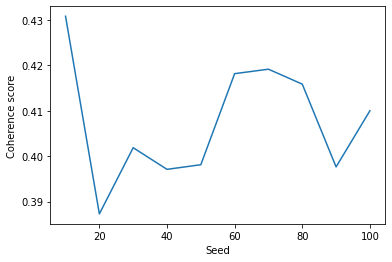

In [53]:
# Show graph
limit=110; start=10; step=10;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Seed")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [54]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Seed =", m, 'Coherence: ', round(cv, 4))

Seed = 10 Coherence:  0.4308
Seed = 20 Coherence:  0.3873
Seed = 30 Coherence:  0.4019
Seed = 40 Coherence:  0.3971
Seed = 50 Coherence:  0.3981
Seed = 60 Coherence:  0.4181
Seed = 70 Coherence:  0.4191
Seed = 80 Coherence:  0.4158
Seed = 90 Coherence:  0.3976
Seed = 100 Coherence:  0.41


## 6. Examining the 10-seed results

In [56]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed=10, optimize_interval=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [57]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatizedNouns, 
                                                        start=5, 
                                                        limit=30, 
                                                        step=1)

Mallet LDA: 5 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 781
total tokens: 61621
<10> LL/token: -8.60615
<20> LL/token: -8.23383
<30> LL/token: -8.02784
<40> LL/token: -7.91293

0	10	country year land pound dollar money acre farm place person wood man cent crop price business tree wheat state people 
1	10	child mother life book wife death heart hand daughter son boy paper uncle baby trouble aunt care letter friend happiness 
2	10	work time thing day people school week home house company tea snow store winter month case man market board city 
3	10	day week night morning house time town room evening weather bed home side church yesterday winter place hour clock fall 
4	10	letter time friend family brother sister health month home kind year summer write world place pleasure answer opportunity father life 

<50> LL/token: -7.84073
<60> LL/token: -7.79609
<70> LL/token: -7.76851
<80> LL/token: -7.73922
<90> LL/token: -7.7296

0	10	country year land pound dollar money acre

[beta: 0.12623] 
<510> LL/token: -7.66181
[beta: 0.12613] 
<520> LL/token: -7.65308
[beta: 0.12683] 
<530> LL/token: -7.65184
[beta: 0.12707] 
<540> LL/token: -7.65004

0	0.41147	country land pound year acre farm dollar money work price day place cent wheat person house crop farmer bushel family 
1	0.27244	book life heart hand work copy husband dollar world trial mind sorrow interest year child nature paper flower spirit woman 
2	0.18255	people man country year time company government work place gold land business river war fact office side city money thousand 
3	0.69897	day week child morning night time room evening town house church school hour water bed clock tea yesterday boat island 
4	1.45187	letter time day friend home mother week sister brother year month family health child winter place country summer kind father 

[beta: 0.12507] 
<550> LL/token: -7.65227
[beta: 0.1273] 
<560> LL/token: -7.64763
[beta: 0.12751] 
<570> LL/token: -7.63743
[beta: 0.12746] 
<580> LL/token: -7.640

Mallet LDA: 6 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 781
total tokens: 61621
<10> LL/token: -8.70321
<20> LL/token: -8.31673
<30> LL/token: -8.12247
<40> LL/token: -8.0094

0	8.33333	country year land pound money dollar acre farm crop price house cent wheat tea place wood horse number family spring 
1	8.33333	brother family mother friend time life book work son home sister health husband wife paper trouble letter daughter month copy 
2	8.33333	letter time friend sister day father night write baby news heart death health woman hand girl pleasure weather cousin opportunity 
3	8.33333	child time week day boy kind home bed school uncle year interest today city head change fall snow reason bank 
4	8.33333	day work winter people person board business summer account state month case time country thing situation expense farmer ship difficulty 
5	8.33333	day place morning house town evening man side room church home month people river hour water road company spirit night 

[beta: 0.10341] 
<460> LL/token: -7.7161
[beta: 0.10452] 
<470> LL/token: -7.71259
[beta: 0.10626] 
<480> LL/token: -7.70775
[beta: 0.10521] 
<490> LL/token: -7.70596

0	0.47631	country land pound year acre farm dollar money place price wheat crop work cent person house farmer month day bushel 
1	0.29864	book heart life hand copy work husband child year world death paper sorrow trial mind nature flower interest spirit dollar 
2	1.67266	letter time friend day mother home sister year brother family month health week place winter country child summer work kind 
3	0.70796	week child school day boy baby evening today home night church bed house morning tea yesterday visit island girl thing 
4	0.22262	man people country company year work government state business office fact bank war thousand gold mine city land money law 
5	0.45221	day morning room town water time night wood place boat hour evening tree ship river house sea road side church 

[beta: 0.10617] 
<500> LL/token: -7.69884
[beta:

[beta: 0.1114] 
<910> LL/token: -7.65608
[beta: 0.11119] 
<920> LL/token: -7.65624
[beta: 0.1111] 
<930> LL/token: -7.65051
[beta: 0.11082] 
<940> LL/token: -7.65126

0	0.22212	country land pound year acre farm dollar money place work price wheat cent person winter crop family house farmer day 
1	0.16016	book heart life hand child work copy world year husband friend death mind trial son paper sorrow nature interest dollar 
2	0.73653	letter time day friend mother home year sister week month family brother health place child country kind winter work summer 
3	0.27912	child week school day boy evening church today island home morning night house visit yesterday tea town captain pork bed 
4	0.09036	people man country company year government state land work business fact time city thousand interest gold law war coal earth 
5	0.21087	day water morning room night town house tree wood hour evening time place boat side sea river ship weather foot 

[beta: 0.11245] 
<950> LL/token: -7.66035
[bet

[beta: 0.07966] 
<310> LL/token: -7.86774
[beta: 0.08017] 
<320> LL/token: -7.84296
[beta: 0.08095] 
<330> LL/token: -7.85376
[beta: 0.08206] 
<340> LL/token: -7.85363

0	1.61848	day place town wood house time tree morning weather boat evening ship night water sea church side road person room 
1	1.30897	book hand heart life work copy mind interest husband paper friend world trouble trial anxiety death woman sorrow spirit age 
2	3.79956	letter time friend day mother sister home child health brother month father write news week life daughter thing uncle death 
3	2.32255	year country family winter work summer money people brother dollar place month kind house time health respect son crop spring 
4	2.46702	week day child night bed boy school morning house room evening baby today girl home yesterday town hour island visit 
5	0.85457	man people year country government business company interest fact state gold time place office city war thousand river law side 
6	1.14218	land pound country ac

[beta: 0.10062] 
<710> LL/token: -7.66163
[beta: 0.10047] 
<720> LL/token: -7.65882
[beta: 0.10072] 
<730> LL/token: -7.65908
[beta: 0.1005] 
<740> LL/token: -7.64266

0	0.16127	day water morning room tree river boat wood house sea evening night town hour place ship side road time foot 
1	0.1446	book heart life copy hand husband work child trial year sorrow nature world death son paper flower pound woman case 
2	0.79041	letter time day friend home mother week year sister month place health child family work country winter father kind summer 
3	0.0582	brother family money sister line son health letter friend answer dollar year write respect living word mother mercy bout trade 
4	0.28538	child week day school today evening home boy morning night church tea town island bed brother visit store baby yesterday 
5	0.08583	people man company year government country interest business state gold law coal war office thousand city money officer enemy soldier 
6	0.24069	country land year pound acre

<110> LL/token: -7.79556
<120> LL/token: -7.77816
<130> LL/token: -7.76763
<140> LL/token: -7.75731

0	6.25	work year business mind man book interest state city dollar case board servant pay expense office copy situation reason wage 
1	6.25	friend letter brother mother sister health family son father death wife year time daughter kind answer husband care life blessing 
2	6.25	letter life girl hand heart pleasure woman world paper manner happiness flower writing news picture night kind trust spirit darling 
3	6.25	time day month home winter letter summer week country thing weather write opportunity snow mine fall people respect address account 
4	6.25	country land pound year money acre dollar farm cent crop price wheat foot number place lot farmer market pork family 
5	6.25	people morning water night person side hour evening company boat end man clock ship return captain vessel bank fellow piece 
6	6.25	child week boy baby school home visit uncle aunt yesterday today store bed mail trou

[beta: 0.08034] 
<460> LL/token: -7.81995
[beta: 0.08079] 
<470> LL/token: -7.81004
[beta: 0.08128] 
<480> LL/token: -7.80752
[beta: 0.08078] 
<490> LL/token: -7.80233

0	0.21	people year interest work life book country matter man business government story hand world office state truth case mind bank 
1	0.51012	brother family letter mother time friend sister child year health uncle son country aunt wife home money death week cousin 
2	0.25115	heart child life husband book friend death dollar hand mother letter kind mind copy girl son sorrow sister trial woman 
3	0.99577	letter time day friend home month place week year health weather winter sister country news return summer night pleasure kind 
4	0.38071	country land pound year acre farm dollar money place work price cent wheat house crop person day family farmer bushel 
5	0.13708	man company ship day work captain gold boat luggage foot provision board sea night hour time month coal thousand passenger 
6	0.52727	week child day school b

[beta: 0.08579] 
<810> LL/token: -7.75112
[beta: 0.08485] 
<820> LL/token: -7.74047
[beta: 0.0853] 
<830> LL/token: -7.73719
[beta: 0.08562] 
<840> LL/token: -7.73566

0	0.14496	people country year man interest matter world mind business life government case hand state friend land city law party person 
1	0.20636	brother family letter mother friend sister time uncle child health son country aunt year winter death wife cousin money daughter 
2	0.11998	book heart child work husband copy life death dollar son hand trial year paper woman sorrow mind friend age room 
3	0.60566	letter time day friend home month week year place health sister night mother weather thing winter summer baby country girl 
4	0.2222	country land pound year acre farm dollar money work place day price wheat crop cent time person house farmer bushel 
5	0.08821	day company ship gold sea luggage captain man boat foot board passenger night provision water month box article hour coal 
6	0.29325	week child day school church

<160> LL/token: -7.81105
<170> LL/token: -7.81219
<180> LL/token: -7.79863
<190> LL/token: -7.79989

0	5.55556	child week night boy day bed school uncle room baby today church mail doctor evening island morning illness store yesterday 
1	5.55556	house people work head tea garden pay deal cost town room thing pork manner door servant woman lady description gold 
2	5.55556	letter mother sister girl father death child daughter aunt home kind dollar return visit heart flower write woman writing care 
3	5.55556	time day letter home place week month weather winter news pleasure snow trust thing write cousin comfort air spring lot 
4	5.55556	life friend people world husband business interest city trouble place heart difficulty state kind law change loss power house living 
5	5.55556	day water town morning river boat side hour evening tree clock wood office ship board dinner sea road place night 
6	5.55556	hand book work paper year mind time spirit case man company thing copy eye anxiety pen f

[beta: 0.07248] 
<460> LL/token: -7.81375
[beta: 0.07298] 
<470> LL/token: -7.8077
[beta: 0.07351] 
<480> LL/token: -7.80397
[beta: 0.0739] 
<490> LL/token: -7.81053

0	0.49002	week child day school boy church home today morning evening night bed town baby house island tea yesterday visit brother 
1	0.1475	work water horse gold time thing day people provision company foot mine coal man tool weight dress inch box fellow 
2	0.25719	child heart life husband friend death mother kind dollar year girl mind sister baby hand woman trial bed wife room 
3	0.76944	letter time day month home place friend week health thing country winter year people return weather summer pleasure life news 
4	0.17262	people country man year government business interest world office state war friend matter law city land thousand officer bank party 
5	0.21647	day town morning boat room house night evening place hour tree wood river water side time ship road clock sea 
6	0.08499	book work copy paper hand story life vo

[beta: 0.07601] 
<760> LL/token: -7.77784
[beta: 0.07631] 
<770> LL/token: -7.76512
[beta: 0.07607] 
<780> LL/token: -7.77458
[beta: 0.07552] 
<790> LL/token: -7.77146

0	0.28829	week day child school evening home boy today church morning town island house night yesterday tea visit pork captain bed 
1	0.09956	work day gold water luggage provision boat foot cent sugar dollar woman steam ship box dress thing coal bed tool 
2	0.1841	child friend heart letter life mother husband death bed hand year girl baby kind dollar woman boy sorrow mind wife 
3	0.39414	letter time day month place friend health country home winter thing year weather people happiness summer sister pleasure news return 
4	0.09385	people man year company government business city country office world interest law matter land state war thousand life party officer 
5	0.13251	day room morning night water town time wood place house boat river hour clock side evening tree sea road horse 
6	0.0622	book work copy story paper poun

<60> LL/token: -7.99833
<70> LL/token: -7.97321
<80> LL/token: -7.95048
<90> LL/token: -7.9336

0	5	country land pound acre year farm money dollar cent crop price person wheat foot farmer pork potato bushel cost wood 
1	5	letter life heart hand night girl visit care mother day mind picture news week darling boy mail trial prayer peace 
2	5	time letter month winter day summer health friend home pleasure weather place manner happiness world trust opportunity comfort country writing 
3	5	people country man business year uncle interest city state house matter place time government war power rest friend doctor fortune 
4	5	place dollar year day month board situation work expense account market idea wage time mind case rest prospect difficulty hour 
5	5	work time book paper home thing life mine copy reason head change fellow trouble fear face nature soul boy story 
6	5	brother letter family friend sister mother health son time daughter wife father death answer aunt write cousin money kind ho

[beta: 0.06156] 
<360> LL/token: -7.91966
[beta: 0.06223] 
<370> LL/token: -7.90238
[beta: 0.06253] 
<380> LL/token: -7.89967
[beta: 0.06286] 
<390> LL/token: -7.88078

0	0.57867	land pound country acre farm dollar year money work price wheat cent house crop bushel market place winter farmer kind 
1	0.54299	life heart friend mind husband world hand death child letter interest trial sorrow year son sister matter care soul power 
2	1.14912	letter time day month weather place friend thing people home winter health summer return country pleasure news year happiness garden 
3	0.25726	people man year company government time work country war side land coal thousand month law officer gold bank mine business 
4	0.429	country person business year difficulty place state situation emigrant advantage employment idea home capital respect neighbourhood mind world fact manner 
5	0.15385	book work copy flower story paper pound volume year interest woman title bread history tale home review publication 

[beta: 0.06925] 
<660> LL/token: -7.82759
[beta: 0.06944] 
<670> LL/token: -7.8119
[beta: 0.07033] 
<680> LL/token: -7.82155
[beta: 0.06964] 
<690> LL/token: -7.81256

0	0.21839	country pound year land acre dollar farm money work cent wheat price house crop day farmer bushel winter month place 
1	0.24426	friend life heart child year hand husband world family death kind interest mind father son sorrow care trouble people book 
2	0.30257	letter time day month friend home weather health place country winter people summer thing happiness life year trust garden manner 
3	0.07534	man year people work company government time gold business war thousand coal river day month country soldier officer town foot 
4	0.1082	country land people place person year difficulty emigrant home settler neighbourhood time church capital climate labour idea state life fact 
5	0.04903	book work copy paper pound story volume spirit flower bread history letter man publication review clearing sale heart author writi

[beta: 0.06956] 
<960> LL/token: -7.79186
[beta: 0.06939] 
<970> LL/token: -7.80462
[beta: 0.06957] 
<980> LL/token: -7.80522
[beta: 0.06904] 
<990> LL/token: -7.7964

0	0.22528	land pound country year acre farm dollar money work price cent place house wheat crop farmer time day bushel month 
1	0.28838	friend year life heart child family hand world interest husband time son mind sister kind trouble death father wife home 
2	0.24404	letter time day month place winter weather country health friend people garden pleasure summer happiness year home night thing week 
3	0.06035	man people company government business war gold work coal year thousand city country time officer river month law election soldier 
4	0.08816	country people emigrant year home difficulty person state idea respect land place climate fact world settler neighbourhood village habit church 
5	0.05334	book work copy paper pound flower story volume nature spirit bread history clearing author review success poem sale page tru

[beta: 0.04407] 
<220> LL/token: -7.91116
[beta: 0.04788] 
<230> LL/token: -7.96308
[beta: 0.04904] 
<240> LL/token: -7.97653

0	3.6085	day time work home winter account night month snow mine fire mail lot city paper life frost thing weather respect 
1	2.46139	cent board boat pound ship dollar captain pork vessel store box clothe thing employment luggage pay passage good servant currency 
2	3.11506	people business year country interest money work state situation world power man matter property fact prospect thing sale circumstance mind 
3	2.29588	man company place side people office government hour morning end fall law fellow war earth foot country stand thousand time 
4	2.84671	book day spirit hand return manner copy table woman fear order person servant eye creature scene packet air board description 
5	2.75462	house town water wood tree river road building dinner church tea half mill clock distance room evening rest view horse 
6	3.87397	brother family health mother year friend lett

[beta: 0.06078] 
<460> LL/token: -7.8668
[beta: 0.06075] 
<470> LL/token: -7.8588
[beta: 0.06076] 
<480> LL/token: -7.84645
[beta: 0.06171] 
<490> LL/token: -7.85906

0	0.35561	time letter day week home night baby girl work boy mother lot head thing morning place fire horse write news 
1	0.14791	month cent work dollar luggage boat pound board provision day beef tea thing cost pair flour piece house tool steam 
2	0.23818	country people place business year interest state person friend life matter time home hand world difficulty case man thing mind 
3	0.05189	man company people war officer coal thousand land gold soldier law work month enemy miner government side food majority army 
4	0.08376	book work copy letter story paper volume truth life spirit pound son anxiety history publication title sale page review tale 
5	0.20757	day town morning room night water evening river wood boat hour road tree side place home ship house sea land 
6	0.56421	letter time family brother friend mother sist

[beta: 0.06348] 
<710> LL/token: -7.82857
[beta: 0.06389] 
<720> LL/token: -7.82744
[beta: 0.06417] 
<730> LL/token: -7.82967
[beta: 0.06425] 
<740> LL/token: -7.82564

0	0.31151	letter time day week home mother night work friend girl baby place month boy write sister news year thing weather 
1	0.10551	day cent water boat luggage thing board dollar pair kind house people pork servant pound store clothe mind gold tea 
2	0.16526	country people year interest business friend man money state matter case person world place difficulty life office land home situation 
3	0.04423	man people company war coal gold thousand officer river work soldier government day enemy town miner year city food majority 
4	0.05467	book work copy paper spirit story letter pound volume son truth bread history title life publication review clearing author sale 
5	0.11089	day morning room river house water town place tree night side wood road evening boat sea hour church land building 
6	0.29578	brother letter family

[beta: 0.06448] 
<960> LL/token: -7.80466
[beta: 0.06417] 
<970> LL/token: -7.81275
[beta: 0.06404] 
<980> LL/token: -7.80992
[beta: 0.06446] 
<990> LL/token: -7.81662

0	0.37425	letter time day week home mother night friend month work baby year place girl sister write thing news boy weather 
1	0.10653	work cent dollar pound boat board thing day luggage month water bed tea box currency provision steam servant apple tool 
2	0.15012	people country year interest friend business matter person world manner man time state life home case fact city reason debt 
3	0.03977	man company people war thousand coal officer river soldier government gold work miner food enemy pocket day earth provision mine 
4	0.04489	book copy work paper spirit volume life pound hand story truth nature table review publication clearing page heart publisher title 
5	0.12775	day morning house room wood river tree night water town side place boat road evening hour clock sea board land 
6	0.22511	brother letter family moth

[beta: 0.0329] 
<210> LL/token: -7.83352
[beta: 0.04062] 
<220> LL/token: -7.95932
[beta: 0.0444] 
<230> LL/token: -7.99234
[beta: 0.04587] 
<240> LL/token: -8.00828

0	4.64331	letter time brother sister family health mother friend month summer place home write father country death money answer cousin account 
1	2.5032	time work people home day head fire man lot snow horse gold mine fact folk place thing likeness stand city 
2	3.22789	week day letter night baby girl boy time morning home evening mail yesterday tomorrow clock mother thing change darling news 
3	2.21262	people foot kind woman thing account person captain vessel clothe luggage number expense emigrant mind difficulty situation provision spring article 
4	2.79746	country pound land year dollar acre farm money price crop cent wheat farmer market bushel wage work cost half winter 
5	2.41048	day room bed hour house boat flower board table door fall night end window steamer kitchen box fellow station good 
6	3.04975	day weather

[beta: 0.0583] 
<460> LL/token: -7.85478
[beta: 0.05846] 
<470> LL/token: -7.84803
[beta: 0.05838] 
<480> LL/token: -7.84443
[beta: 0.05865] 
<490> LL/token: -7.84096

0	0.88816	letter time friend family brother home sister year mother health day month place work week child country son wife winter 
1	0.09228	work man company mine day foot gold country coal provision fact people claim mountain time miner place cent stand snow 
2	0.30683	letter time baby week day mother night girl thing boy child home lot news picture darling kind morning yesterday write 
3	0.10238	water cent luggage boat thing sugar beef tea tool seed lbs fish steam kind meat board currency pork beer inch 
4	0.31301	country land year pound acre dollar farm money crop price wheat work place farmer bushel day house market wage month 
5	0.27755	day morning room town night house evening boat water hour side clock place river ship horse foot wood tree road 
6	0.29398	time letter day month country weather winter garden happin

[beta: 0.0603] 
<710> LL/token: -7.81595
[beta: 0.06074] 
<720> LL/token: -7.80969
[beta: 0.06043] 
<730> LL/token: -7.80636
[beta: 0.06037] 
<740> LL/token: -7.80397

0	0.51501	letter time friend brother family mother year day sister home work health week month place winter wife uncle country child 
1	0.03921	man mine company gold work coal foot miner provision claim whitch day cent amount earth horse mountain people cariboo stand 
2	0.22657	letter time week day baby mother girl night home child thing boy news weather yesterday darling lot mail visit mind 
3	0.08281	cent seed luggage beef boat water day sugar thing kind pork tea store clothe lbs meat mind board bed foot 
4	0.23176	country land year pound acre farm dollar money place price wheat crop work house farmer family bushel time winter wage 
5	0.18885	day morning town water house room place night wood river side evening tree boat hour time road church sea board 
6	0.19073	letter time day month winter health country happiness pl

[beta: 0.0617] 
<960> LL/token: -7.8094
[beta: 0.06092] 
<970> LL/token: -7.80718
[beta: 0.06126] 
<980> LL/token: -7.80198
[beta: 0.06101] 
<990> LL/token: -7.80956

0	0.50318	letter time brother friend family mother sister day year home health week month winter child work country place money uncle 
1	0.02695	work foot coal provision man company day miner gold claim mine whitch mountain earth pocket cariboo horse fellow mining bout 
2	0.19933	letter time day baby week mother night girl home thing child boy weather aunt room morning news yesterday lot woman 
3	0.085	boat cent luggage water board currency sugar kind steam meat thing tool bed article woman seed box ship fish good 
4	0.22203	country land year pound acre farm money dollar price work wheat day crop place house time farmer bushel winter man 
5	0.15785	day morning room house place town wood water night river side hour road boat tree sea evening time horse clock 
6	0.20593	letter time day month place country weather health win

[beta: 0.03071] 
<210> LL/token: -7.83095
[beta: 0.03765] 
<220> LL/token: -7.95
[beta: 0.04074] 
<230> LL/token: -7.98566
[beta: 0.04246] 
<240> LL/token: -8.00664

0	3.1204	week child house room evening bed morning night boy church home tea clock today island tomorrow dinner yesterday mail water 
1	2.43825	country land pound year acre farm price crop wheat place farmer money bushel market horse foot cent tree mill person 
2	2.13905	dollar work money board day store wage pork cow cent cost clothe boat water provision kind luggage month week employment 
3	3.75225	letter time brother mother sister home week write father news deal answer pleasure line money wife writing daughter son leave 
4	1.78886	man time company people lot government gold office fact month city money hour place mine stand year thousand mountain foot 
5	2.7891	child life death heart trouble son husband wife boy daughter aunt doctor mind trial loss father sorrow account change age 
6	2.32338	book work house paper thing

[beta: 0.05308] 
<460> LL/token: -7.90589
[beta: 0.05406] 
<470> LL/token: -7.89447
[beta: 0.05388] 
<480> LL/token: -7.88497
[beta: 0.05425] 
<490> LL/token: -7.88871

0	0.40216	week child school day church home evening today island town boy tea morning house captain brother pork yesterday store visit 
1	0.26196	land country pound year acre farm money price dollar wheat crop family bushel place farmer house market person horse foot 
2	0.15599	cent dollar work board water month pound day luggage cost boat wage thing beef tea provision store money steam bed 
3	0.63821	letter time brother sister mother friend home year week month write money country wife health work answer place father son 
4	0.08315	man day company work people time officer river place thousand coal town mountain gold mine month miner soldier enemy food 
5	0.27336	family child uncle year son death kind people house daughter mother aunt friend health wife paper life winter husband heart 
6	0.07272	book work copy story pap

[beta: 0.05814] 
<710> LL/token: -7.81291
[beta: 0.05819] 
<720> LL/token: -7.81291
[beta: 0.05771] 
<730> LL/token: -7.81475
[beta: 0.05805] 
<740> LL/token: -7.81057

0	0.27058	week child school day home evening church today island town boy tea brother morning night time yesterday store captain girl 
1	0.21237	country land year pound acre farm money dollar price wheat place crop family farmer bushel time winter house market wood 
2	0.1026	work cent pound board day water dollar luggage boat sugar thing beef week month pork tea provision flour servant currency 
3	0.51285	letter time friend mother brother home year sister day week family work place month health wife child money son write 
4	0.05394	man company day people work time gold coal thousand war foot mountain town officer mine river month miner soldier mail 
5	0.08029	uncle family child health aunt son death interest paper winter day people address marriage cousin school trial land doctor remembrance 
6	0.05799	book work copy pa

[beta: 0.05991] 
<960> LL/token: -7.80444
[beta: 0.05887] 
<970> LL/token: -7.79473
[beta: 0.05912] 
<980> LL/token: -7.79567
[beta: 0.05925] 
<990> LL/token: -7.80097

0	0.28544	child week day school church evening home today boy island morning time brother tea town house yesterday pork visit store 
1	0.21624	country land year pound acre farm money dollar price place crop wheat family house bushel farmer winter market horse wood 
2	0.1028	day cent dollar work board boat water luggage month pound steam bed person thing currency employment tea servant time tool 
3	0.57753	letter time friend mother brother home year day family sister week health month child wife work place money write father 
4	0.05444	man company day people work time gold war coal thousand place officer mail river mine soldier mountain miner foot month 
5	0.04486	uncle family child marriage interest work trial winter health address life people circle son aunt rest land bone bed enjoyment 
6	0.06413	book work copy life p

<160> LL/token: -7.90369
<170> LL/token: -7.90927
<180> LL/token: -7.88671
<190> LL/token: -7.87911

0	3.57143	dollar pound money cent board pay cost wage expense month gold employment rate box kind advantage luggage store clothe emigrant 
1	3.57143	time winter summer day month place weather spring house garden home tree deal snow year rain ground horse head picture 
2	3.57143	letter brother sister time write father answer month health opportunity news happiness pleasure friend line death blessing return acquaintance manner 
3	3.57143	hand friend care world life trouble office pen head eye pleasure fact foot face spirit mine law nature soul arm 
4	3.57143	child mother week home girl baby uncle aunt cousin school boy letter store news change cough winter lesson excuse yesterday 
5	3.57143	book heart husband child life letter death age paper mind copy flower trial woman sorrow comfort girl father term picture 
6	3.57143	day week night boy church visit today time mail fire thing call bed 

[beta: 0.04485] 
<360> LL/token: -7.97875
[beta: 0.04558] 
<370> LL/token: -7.97137
[beta: 0.04621] 
<380> LL/token: -7.95927
[beta: 0.04606] 
<390> LL/token: -7.94487

0	0.25675	cent dollar work pound board month luggage person kind boat money wage beef steam water flour provision cost woman thing 
1	0.62392	day time work winter place garden summer weather snow night horse month water week rain year fire wife country flower 
2	1.54755	letter time brother friend sister home month health year country write father news place day pleasure account kind answer return 
3	0.17581	hand life night arm man coal foot death car table affection stand pen hour parent face danger question woman show 
4	0.7572	child week mother baby uncle aunt house boy girl day trouble school winter weather bed visit age store wife home 
5	0.26142	book heart copy work husband dollar flower paper hand world trial sorrow life pound room kind nature soul interest creature 
6	0.62271	week day night morning boy today scho

[beta: 0.05295] 
<560> LL/token: -7.84882
[beta: 0.0537] 
<570> LL/token: -7.84629
[beta: 0.05314] 
<580> LL/token: -7.8296
[beta: 0.05329] 
<590> LL/token: -7.8236

0	0.09776	cent dollar pound board luggage month work boat day time cost bed beef tool currency tea servant lbs thing employment 
1	0.1201	work time day gold horse snow water rain night mine mountain month provision man head lot frost morning boot town 
2	0.85797	letter time day friend home sister place month year week health kind life night pleasure father mother summer news care 
3	0.04252	hand coal mind affection soldier mail life table man truth spirit fact foot hessie arm officer command story rap block 
4	0.20376	child mother baby girl week aunt room bed boy house death kind uncle visit yesterday people thing age weather lot 
5	0.1104	book work heart copy life husband paper dollar son flower trial sorrow nature gentleman pound story death creature age trouble 
6	0.29103	week child day school boy church today town even

[beta: 0.05515] 
<760> LL/token: -7.76257
[beta: 0.05505] 
<770> LL/token: -7.76288
[beta: 0.05599] 
<780> LL/token: -7.76066
[beta: 0.0559] 
<790> LL/token: -7.75753

0	0.07922	cent work dollar boat luggage board pound tea day store passage currency steam ship woman thing meat lbs sugar beef 
1	0.0656	gold water work horse man company mountain provision mine snow day foot claim boot lot pair fact time miner likeness 
2	0.80505	letter time day friend home year week month place sister mother kind life health night thing girl people father news 
3	0.03526	coal hand block table night soldier man shop stand mind truth foot communication ton eye mail seam command excitement work 
4	0.09267	child mother baby aunt uncle family boy girl daughter bed death age heart kind dollar room visit interest house car 
5	0.10425	book work copy husband heart life paper son trouble hand trial child sorrow spirit nature flower pound soul volume dollar 
6	0.26485	week child day school evening church town toda

[beta: 0.05753] 
<960> LL/token: -7.74078
[beta: 0.05728] 
<970> LL/token: -7.74209
[beta: 0.05726] 
<980> LL/token: -7.73681
[beta: 0.0576] 
<990> LL/token: -7.7419

0	0.08721	cent dollar work board boat luggage water pound month currency steam meat tea thing cost person bread bed article lbs 
1	0.04825	gold horse company work man snow mountain provision likeness claim miner foot robb partner grass boot mining mine fellow river 
2	0.79219	letter time day friend home week year month sister place mother health child kind summer night life girl thing people 
3	0.03192	hand coal block boy soldier table hour ring man mail mind work face communication hessie officer lot room door car 
4	0.07066	child uncle aunt family death room mother heart interest girl visit age daughter baby car boy bed cough remembrance window 
5	0.09567	book work life heart copy husband son hand flower paper trial dollar nature creature pound soul sorrow volume age board 
6	0.26521	week child school church day evening

<160> LL/token: -7.93152
<170> LL/token: -7.9282
<180> LL/token: -7.91846
<190> LL/token: -7.9244

0	3.33333	child week morning school church today evening town tea boy yesterday store afternoon walk horse deal sleep lesson pork dinner 
1	3.33333	friend life world manner opportunity health blessing care kind pleasure comfort hand situation heart attention power pain sickness property happiness 
2	3.33333	book life heart hand paper copy loss trial age pen woman nature face matter trouble soul term story care spirit 
3	3.33333	day night week home weather spirit evening winter fall visit tomorrow yesterday return snow journey word fire frost air side 
4	3.33333	year winter summer place money home interest account month family spring country prospect change crop field neighbour stand regret lot 
5	3.33333	land pound acre farm dollar country cent wheat year price farmer money potato bushel wood cost crop market horse trade 
6	3.33333	mother family sister letter son death wife friend child d

[beta: 0.04235] 
<360> LL/token: -7.9959
[beta: 0.04255] 
<370> LL/token: -7.97756
[beta: 0.04222] 
<380> LL/token: -7.95669
[beta: 0.04322] 
<390> LL/token: -7.95341

0	0.48808	child week school today island boy church tea pork spirit captain store house mail yesterday vessel dinner lesson girl evening 
1	0.37732	friend life heart mind world time trouble hand trial husband parent sorrow power affection anxiety advice change care rest soul 
2	0.15634	book copy work paper interest story pound spirit year volume life husband table history hand truth page man difficulty title 
3	0.876	day week time home night morning evening weather thing place bed yesterday town side snow visit hour clock rain return 
4	0.41932	country money winter year home place summer state people difficulty employment person month idea respect emigrant advantage world interest settlement 
5	0.4452	land country pound acre farm year dollar price wheat crop money cent farmer bushel person place market house family wood 

[beta: 0.04917] 
<560> LL/token: -7.86613
[beta: 0.04951] 
<570> LL/token: -7.86491
[beta: 0.04889] 
<580> LL/token: -7.85439
[beta: 0.04889] 
<590> LL/token: -7.85226

0	0.26342	child week school day boy today brother island church time pork store evening morning fortnight captain tea account house vessel 
1	0.18733	friend heart life hand death husband world sorrow trial wife affection trouble comfort power son parent sister change soul care 
2	0.05215	book work copy life paper story year volume pound spirit history bread publication title review man interest author son clearing 
3	0.27862	day home morning time evening town week water room house place bed night side clock river dinner church hour tea 
4	0.12283	country people year home difficulty place emigrant state climate person world situation village mind labour idea thing church neighbourhood habit 
5	0.243	country land pound acre year dollar farm money price work wheat place crop cent day time farmer bushel house month 
6	0.515

[beta: 0.04987] 
<760> LL/token: -7.8371
[beta: 0.04996] 
<770> LL/token: -7.83461
[beta: 0.05011] 
<780> LL/token: -7.84238
[beta: 0.05033] 
<790> LL/token: -7.8379

0	0.29853	week child day school today home evening boy house time island church night yesterday brother store spirit pork bed girl 
1	0.19067	friend heart life hand death husband world sorrow mind sister time trial year son parent interest kind care power change 
2	0.04583	work book copy paper letter story pound life volume bread man spirit son author review pay publication clearing title sort 
3	0.18806	day town morning room water house side place river road wood evening night clock boat time home tree horse hour 
4	0.09774	country people year home difficulty emigrant state neighbourhood land settler number place climate habit idea village interest situation feeling reason 
5	0.24262	land country pound year acre farm dollar money place price wheat work cent crop day person house bushel farmer market 
6	0.40787	letter bro

[beta: 0.05077] 
<960> LL/token: -7.84036
[beta: 0.0504] 
<970> LL/token: -7.83791
[beta: 0.05068] 
<980> LL/token: -7.83902
[beta: 0.05076] 
<990> LL/token: -7.83916

0	0.28648	child week day school today home evening boy church island visit brother yesterday tea town morning bed time pork girl 
1	0.20063	friend heart life world year hand husband death mind son sorrow family trial trouble time power sister parent loss child 
2	0.05099	book work copy paper pound story volume mail title life publication author bread clearing poem history review tale publisher poetry 
3	0.15916	day morning room time place river house side water town home wood road tree horse clock week evening church bed 
4	0.08165	country people emigrant home state difficulty land interest idea advantage neighbourhood respect habit person world climate life year independence heat 
5	0.23316	land country pound year acre farm dollar money price work wheat place day house cent crop farmer bushel time man 
6	0.36776	brother

<160> LL/token: -7.95273
<170> LL/token: -7.95741
<180> LL/token: -7.93661
<190> LL/token: -7.94523

0	3.125	child day week head bed today kind visit afternoon sickness paper likeness tea care fever post rest people change time 
1	3.125	brother family sister letter friend death son health daughter uncle aunt father cousin answer write line word mother address account 
2	3.125	friend hand world life husband mind spirit trial wife power matter comfort sorrow difficulty nature rest anxiety soul circumstance idea 
3	3.125	day tree river boat water foot wood ship hour sea road morning passage arrival side ground board good fall article 
4	3.125	letter time health month day friend place happiness opportunity news manner garden weather trust father country peace pleasure prayer acquaintance 
5	3.125	year business country interest month government account war plan cotton duty success heat company side pig clothing member experience fear 
6	3.125	week day girl baby night picture write fire call

[beta: 0.04021] 
<360> LL/token: -8.00733
[beta: 0.04147] 
<370> LL/token: -8.00028
[beta: 0.04143] 
<380> LL/token: -7.99277
[beta: 0.042] 
<390> LL/token: -7.97783

0	0.57795	child week day school boy today store evening morning yesterday bed tea trouble pork house fortnight lesson clock captain book 
1	0.82161	brother family letter mother health sister child friend time son year wife death uncle daughter aunt cousin father money house 
2	0.49278	life friend hand heart world mind child interest year trouble death husband sorrow trial time power spirit matter rest parent 
3	0.18606	day boat ship morning sea water evening board sail vessel night passage land voyage tree captain passenger side stage port 
4	0.90226	letter time day country month health home friend place pleasure return weather sister summer thing happiness father business news manner 
5	0.15362	people year man government country war business condition bank side interest city thousand month land food enemy majority office

[beta: 0.04704] 
<560> LL/token: -7.86113
[beta: 0.04718] 
<570> LL/token: -7.85967
[beta: 0.04689] 
<580> LL/token: -7.85648
[beta: 0.04699] 
<590> LL/token: -7.85058

0	0.30767	child week day school evening today boy home island brother tea store town bed morning church yesterday pork house night 
1	0.34414	letter brother family time mother child friend health sister uncle year son day wife daughter winter summer death aunt country 
2	0.27329	life friend hand year world heart mind interest trouble husband sorrow trial care anxiety case power people comfort difficulty matter 
3	0.08367	day boat ship evening morning night water sea captain vessel sail passenger passage board side clock hour river voyage village 
4	0.39536	letter time day month health country place friend year summer home weather sister people winter week happiness pleasure news father 
5	0.05463	people man war government year business election enemy field cotton company condition thousand bank army side month bond batt

[beta: 0.04812] 
<760> LL/token: -7.84377
[beta: 0.04792] 
<770> LL/token: -7.82608
[beta: 0.0479] 
<780> LL/token: -7.83512
[beta: 0.04762] 
<790> LL/token: -7.83398

0	0.27834	week child day school evening boy today island house brother town home morning clock yesterday church bed tea visit night 
1	0.3112	letter brother family time friend mother health child sister son day wife year uncle death daughter father aunt work winter 
2	0.27465	life friend world hand mind time heart interest year home anxiety comfort case matter power thing family care letter business 
3	0.05943	boat ship day vessel morning captain sea water evening steamer night sail board voyage passenger side village hour fall return 
4	0.28378	letter time day month place country health weather friend people year winter summer home sister return pleasure happiness manner kind 
5	0.0487	people government war man year town election bank business cotton bond interest table country enemy majority condition thousand battle c

[beta: 0.04891] 
<960> LL/token: -7.83041
[beta: 0.04872] 
<970> LL/token: -7.83624
[beta: 0.04851] 
<980> LL/token: -7.82096
[beta: 0.0485] 
<990> LL/token: -7.82254

0	0.26059	week child day school today evening island morning boy church tea home night brother bed yesterday visit town store pork 
1	0.28764	brother family letter friend time mother child health sister day uncle year wife winter son money home daughter country death 
2	0.33524	life friend year time world interest hand people mind letter home business trouble son thing heart matter care family anxiety 
3	0.05214	day boat ship evening sea captain morning vessel passenger night water board hour sail clock side passage land village voyage 
4	0.21222	letter time day month health country place friend weather winter happiness summer father sister people year garden news account trust 
5	0.04582	man people war government land thousand bank election country year enemy army bond business company side condition town battle officer

<160> LL/token: -7.95679
<170> LL/token: -7.9479
<180> LL/token: -7.93336
<190> LL/token: -7.93229

0	2.94118	week day town thing store visit today snow house leave yesterday half afternoon minute box ice mail birthday window call 
1	2.94118	morning day evening church home school night clock fall horse week yesterday dinner meeting frost rain tea spirit tomorrow packet 
2	2.94118	book life heart hand son copy mind paper anxiety spirit nature loss illness story interest term age care truth position 
3	2.94118	work time city people place fire house home lot change mine man call folk paper street fellow mountain class car 
4	2.94118	mother child family year death wife daughter uncle aunt winter cousin doctor change home life paper school summer visit husband 
5	2.94118	friend world husband year prayer peace power father comfort office sorrow kind trust happiness thing trial event character advice circumstance 
6	2.94118	pound dollar money year cent price house expense board cost wage prop

[beta: 0.03755] 
<360> LL/token: -8.02105
[beta: 0.03759] 
<370> LL/token: -7.99596
[beta: 0.03823] 
<380> LL/token: -7.99921
[beta: 0.03845] 
<390> LL/token: -7.97444

0	0.48304	week child school day today island boy pork store house yesterday town winter snow account evening vessel business holiday mail 
1	0.40597	church day home morning evening tea clock town week return place dinner time night visit boat afternoon river half breakfast 
2	0.11611	book work copy paper heart story pound volume life son eye flower publication title woman author history review man wife 
3	0.35999	time work year home water horse snow folk people mine foot man city country week mountain rest fire gold friend 
4	0.46172	child family uncle aunt mother daughter son health year friend house people summer country cousin paper doctor week address death 
5	0.33235	life friend heart husband world sorrow mind trial hand death affection trouble year son parent loss soul care wife kind 
6	0.43499	dollar pound day wo

[beta: 0.04376] 
<560> LL/token: -7.88439
[beta: 0.04417] 
<570> LL/token: -7.87314
[beta: 0.044] 
<580> LL/token: -7.87487
[beta: 0.044] 
<590> LL/token: -7.87519

0	0.23378	week child school day today boy brother island store captain pork house vessel baby account snow mail visit holiday tomorrow 
1	0.15845	church home day evening morning time town place clock dinner house week return side breakfast tea river office meeting night 
2	0.05897	book work copy paper story volume flower history son pound publication review clearing title page kind author man truth poem 
3	0.08919	time horse work water gold mountain day man snow mine company foot provision life river place fact fellow robb claim 
4	0.12958	family uncle child aunt people work address week paper cousin winter mother house son doctor health country death boy store 
5	0.14287	heart life husband friend death hand year child sorrow family father trial age mind son world soul parent wife affection 
6	0.17806	dollar work day pound 

[beta: 0.04523] 
<760> LL/token: -7.82498
[beta: 0.0453] 
<770> LL/token: -7.81711
[beta: 0.04528] 
<780> LL/token: -7.81629
[beta: 0.04472] 
<790> LL/token: -7.81971

0	0.24251	week child day school today evening island boy church yesterday captain vessel pork visit store town brother night morning tea 
1	0.09856	church place morning home town day house evening clock side horse dinner time wood person office people river man tea 
2	0.05176	book work copy pound story paper volume life publication review pay spirit clearing title author history page publisher sale tale 
3	0.05226	work gold company foot water horse mine fact man river money snow mountain provision miner robb claim fellow mining partner 
4	0.08469	family uncle aunt child health son paper people summer trouble death doctor cousin work address kind mother winter news body 
5	0.12485	heart life friend death husband child hand sorrow son family world kind book wife trial age sister flower parent soul 
6	0.10627	day work dolla

[beta: 0.04663] 
<960> LL/token: -7.82265
[beta: 0.04565] 
<970> LL/token: -7.81606
[beta: 0.04582] 
<980> LL/token: -7.80947
[beta: 0.0456] 
<990> LL/token: -7.8073

0	0.20823	week child school day boy today island brother pork store evening yesterday captain vessel town home church morning night baby 
1	0.10034	church place town home morning evening time horse clock day return side river dinner wood week breakfast tea meeting country 
2	0.05771	book work copy paper life story volume pound spirit bread heart man history review truth publication author nature clearing title 
3	0.04313	foot work man company gold fact people coal water claim mine miner robb provision place mining mountain money fellow likeness 
4	0.07021	uncle family aunt child life people son address cousin death doctor health interest work remembrance generation trial rest winter boy 
5	0.13397	heart friend husband child death life world sister sorrow mother family year dollar son wife kind father age trial soul 
6	0.0

<160> LL/token: -8.00545
<170> LL/token: -8.00282
<180> LL/token: -7.98169
<190> LL/token: -7.98728

0	2.77778	year house land tree wood kind spring seed family foot building ground mill crop prospect summer garden pay plan potato 
1	2.77778	work book paper trouble kind copy story trial anxiety truth class term success flower kindness trust attack history subject order 
2	2.77778	time mind woman thing mail spirit visit fire matter change child pleasure writing eye likeness leave pay lesson position room 
3	2.77778	night evening morning room side day clock yesterday ship island captain sea vessel voyage walk sail scene fall today sleep 
4	2.77778	money work country person people wage foot provision cow store place flour rate state business purchase sale butter man stone 
5	2.77778	life heart husband hand death dollar friend bed loss world girl sorrow care illness creature soul room picture head pain 
6	2.77778	week day home uncle school winter night hand weather snow doctor change visit


0	0.20734	seed tree garden foot kind flower plant spring root frost ground work sugar grass year piece summer fruit pay sow 
1	0.22576	book work copy paper story pound volume son bread nature talent history clearing title page man tale sight publication author 
2	0.61609	hand room thing time mind woman house fire table spirit position matter eye door pen child book board painting station 
3	0.42699	day captain evening vessel ship boat night sea sail hour passage voyage island room passenger clock morning good foot ice 
4	0.51259	dollar work money board place wage month country man mine foot cost company water city house provision head gold profit 
5	0.54531	heart life friend death husband kind bed sorrow world trouble wife soul loss trial dollar age flower hour year hand 
6	1.20611	day week home child school morning visit winter uncle night weather today store snow town doctor boy bed evening change 
7	0.95328	child letter mother girl boy week baby daughter aunt kind sister thing hous

[beta: 0.04035] 
<510> LL/token: -7.92326
[beta: 0.04022] 
<520> LL/token: -7.90979
[beta: 0.04065] 
<530> LL/token: -7.91662
[beta: 0.04148] 
<540> LL/token: -7.9218

0	0.04158	tree seed foot garden flower sugar root plant ground frost spring kind maple bout youe gooseberry pay carrot shrub knife 
1	0.05993	book work copy paper letter story life volume pound son history heart spirit review publication clearing title author bread writing 
2	0.07169	hand table position mind thing spirit book fire earth order dread question servant disappointment communication pen ring matter affection foot 
3	0.10007	day ship captain vessel sea voyage island passenger passage boat land number port evening wind sail room cabin band scene 
4	0.15123	dollar work time day board week people money cent water provision wage month house gold mine company cost man place 
5	0.20546	friend heart life death child husband kind hand year bed sorrow wife trial dollar world sister room family son trouble 
6	0.39295	wee

[beta: 0.04278] 
<710> LL/token: -7.8685
[beta: 0.04308] 
<720> LL/token: -7.86578
[beta: 0.04346] 
<730> LL/token: -7.86841
[beta: 0.04343] 
<740> LL/token: -7.86096

0	0.01977	flower plant tree seed brother spring root garden youe bout shrub line harvast daye rock bear money market cloon potate 
1	0.04964	book work copy paper volume pound history story bread letter publication spirit author review term clearing man son publisher sale 
2	0.0253	hand thing spirit fire communication table trunk mind book ring earth street rap question truth potato fox brick servant mail 
3	0.06199	ship captain sea day vessel passenger night sail voyage passage boat hour port land foot child schooner board drawing cabin 
4	0.07362	work man day company gold mine provision month coal water foot likeness mountain miner share cent time partner claim fact 
5	0.19503	child friend heart life husband kind hand death world dollar sorrow bed room mind trial father year wife sister family 
6	0.29916	week child day 

[beta: 0.04353] 
<910> LL/token: -7.85552
[beta: 0.04392] 
<920> LL/token: -7.85863
[beta: 0.04406] 
<930> LL/token: -7.851
[beta: 0.04385] 
<940> LL/token: -7.86115

0	0.01429	flower plant bout tree youe seed shrub spring foot harvast daye frame blossom complaint rock potate barn layer wase knife 
1	0.05136	book work copy volume story paper son pound spirit letter life publication review clearing author publisher history sale page title 
2	0.0275	hand thing mind communication table street earth spirit book fire trunk question sea brick soldier rap rise turn story state 
3	0.06133	day ship sea captain vessel voyage night office passenger boat passage evening child hour island sail schooner cabin room port 
4	0.03565	company work gold coal provision robb claim water miner fact man people likeness mine foot mountain river cariboo partner cent 
5	0.21963	child friend heart kind husband year life death world hand mind sorrow bed family wife girl sister room trial woman 
6	0.28524	week chil

<60> LL/token: -8.14633
<70> LL/token: -8.12072
<80> LL/token: -8.09384
<90> LL/token: -8.08612

0	2.63158	baby night hand pen fear woman husband mine face work arm story nature morning earth fellow room minute spot car 
1	2.63158	life friend heart death world hand loss father mind sister sorrow parent soul illness comfort affection darling feeling eye bear 
2	2.63158	work money dollar business situation day mind copy city pay rate sale case rest board paper servant profit provision sum 
3	2.63158	pound cent dollar man wage thing pork company month expense government employment gold clothe oats half luggage cost boat currency 
4	2.63158	time day letter month news pleasure friend write health week trust blessing weather word attention leave welcome_letter fever marriage excuse 
5	2.63158	country people interest home side bank reason end party idea fact river fortune war difficulty vessel debt gentleman state world 
6	2.63158	family son uncle year paper kind health death trial aunt matte

[beta: 0.02251] 
<210> LL/token: -7.95855
[beta: 0.02649] 
<220> LL/token: -8.05794
[beta: 0.02801] 
<230> LL/token: -8.07871
[beta: 0.02907] 
<240> LL/token: -8.09077

0	1.55613	night hand girl baby work pen room hour face woman arm fellow paper head car minute stand coal earth subject 
1	1.63046	friend heart life husband world death hand matter sorrow kind sister comfort soul loss affection care illness regret parent eye 
2	1.7959	dollar work money business house day store board city wage pay rate rest expense profit thing bread stranger situation case 
3	1.29051	cent pound pork boat luggage gold currency employment thing box apple month cost pair servant good article barrel steam weight 
4	2.46432	time letter day month friend weather news pleasure write picture word blessing glad_hear excuse hear idea reason welcome_letter walk advice 
5	1.46849	country people year man interest government company party war reason thousand debt state office world fact bank fortune advantage food 
6	1

[beta: 0.03398] 
<360> LL/token: -8.01688
[beta: 0.03453] 
<370> LL/token: -8.0134
[beta: 0.03475] 
<380> LL/token: -7.99809
[beta: 0.03536] 
<390> LL/token: -7.9829

0	0.11875	hand car coal block mine street table foot hour hall katey mind fashion eye lot girl night ring earth hair 
1	0.42961	heart friend life husband world kind death father sorrow hand mind trial sister matter spirit comfort affection home soul change 
2	0.51518	dollar work day money time cent board house people place week town business store wage pound kind country employment pay 
3	0.14199	boat pound luggage beef foot flour currency thing month seed pork water lbs sugar fish steam article potato inch cent 
4	1.11708	letter time day week month friend weather thing mother place news account pleasure night write return hand paper life sister 
5	0.17014	year people man government business war interest bank thousand matter office month law enemy company side country majority trouble cotton 
6	0.32446	family child uncle 

[beta: 0.03942] 
<510> LL/token: -7.9058
[beta: 0.03981] 
<520> LL/token: -7.89735
[beta: 0.04002] 
<530> LL/token: -7.88422
[beta: 0.0403] 
<540> LL/token: -7.89239

0	0.02978	hand coal block table mine foot board communication car company truth work rap seam trunk soldier yard stand fellow street 
1	0.20496	friend heart life husband year hand sorrow death family kind world trial mind care parent affection son soul happiness trouble 
2	0.24841	dollar work time day money people board country month business cent week person house year wage kind pound place employment 
3	0.09523	pound boat seed water luggage beef cent sugar tea meat steam flour currency lbs salt inch quality steamer woman pork 
4	0.74333	letter time day home week month friend mother thing place sister night year work news write girl baby pleasure return 
5	0.06518	year government war man people business side bank enemy thousand election bond company field majority officer army office cotton town 
6	0.10021	uncle family h

[beta: 0.04073] 
<660> LL/token: -7.86276
[beta: 0.04049] 
<670> LL/token: -7.85649
[beta: 0.04094] 
<680> LL/token: -7.85814
[beta: 0.04134] 
<690> LL/token: -7.84077

0	0.0194	hand coal block table truth soldier foot work night mine story communication hour brick seam earth board rap ring trunk 
1	0.21835	friend life heart husband year son child world sorrow family death hand parent trial sister trouble loss case kind affection 
2	0.21081	dollar work day money people country time board cent house month town wage kind business week thing employment person place 
3	0.07157	pound water boat luggage currency cent beef sugar steam cost bread article inch salt lbs steamer meat potato pork pair 
4	0.70166	letter time day home week year mother friend place sister month work thing night girl news write life pleasure people 
5	0.046	government man people war year business country thousand bank side enemy company election majority cotton army battle bond field state 
6	0.0783	family uncle child

[beta: 0.04202] 
<810> LL/token: -7.84347
[beta: 0.04201] 
<820> LL/token: -7.83791
[beta: 0.04222] 
<830> LL/token: -7.8419
[beta: 0.04197] 
<840> LL/token: -7.8326

0	0.02432	hand coal block table work hour mine man communication company foot seam soldier board truth rap eye trunk law brick 
1	0.21417	friend life family heart husband death world son hand child sorrow mind trial care sister year kind parent case matter 
2	0.17061	dollar work day cent country money time board people person pound month week place year town wage house business employment 
3	0.08185	pound water luggage beef boat seed kind cost work currency pork cent lbs meat bed foot bread sugar fish provision 
4	0.75614	letter time day home week year friend place month mother sister thing night work girl people news write baby life 
5	0.05299	man year war government people country business interest enemy side month thousand bank food election majority loss bond officer field 
6	0.0669	uncle family child health son winte

[beta: 0.04286] 
<960> LL/token: -7.8189
[beta: 0.04257] 
<970> LL/token: -7.81552
[beta: 0.04257] 
<980> LL/token: -7.81179
[beta: 0.04254] 
<990> LL/token: -7.81519

0	0.02274	hand coal block foot work table hour trunk soldier board communication rap seam stand mine miner ton man fellow truth 
1	0.23422	friend life family heart world hand husband year child sorrow trial care trouble mind son death parent kind power wife 
2	0.13038	dollar work day cent board country house money wage month business pound person employment town land thing expense servant week 
3	0.08077	pound sugar tea luggage water beef pay boat currency foot inch meat butter bread cost passage potato bed room woman 
4	0.7725	letter time day home week year friend month mother place sister night work thing news people girl paper summer write 
5	0.04903	man people government war business side country year thousand interest bank enemy election land cotton matter army benefit battle bond 
6	0.05626	uncle family aunt child 

<110> LL/token: -8.05133
<120> LL/token: -8.04545
<130> LL/token: -8.03582
<140> LL/token: -8.03458

0	2.5	pound dollar cent board farmer pork price wage house work potato seed cost money cow flour luggage beef boat currency 
1	2.5	day work time thing month paper people city trouble address lot boy night year war pen car round drink north 
2	2.5	winter day month summer weather tree snow fall thing spring sea foot market frost climate journey case road society world 
3	2.5	land year country acre farm money crop wheat bushel horse half labour kind shilling tree cattle neighbour price farming rent 
4	2.5	night morning evening week bed room clock hour yesterday return tomorrow visit board afternoon baby sail fellow girl today train 
5	2.5	woman home copy room term case eye idea pleasure creature fear nature wind sum order history doubt head painting scene 
6	2.5	brother family sister health friend year father death money line son account living word spring respect opportunity wife winter s

[beta: 0.02889] 
<260> LL/token: -8.11167
[beta: 0.02912] 
<270> LL/token: -8.10586
[beta: 0.02936] 
<280> LL/token: -8.10309
[beta: 0.02986] 
<290> LL/token: -8.0984

0	0.73679	dollar pound cent work wage board flour beef luggage house price boat sugar water currency seed cost steam provision month 
1	1.07814	work time day people paper home city trouble week year lot store address life change man rest car pen month 
2	1.23509	day winter weather summer month spring thing garden snow tree frost time end climate deal ground comfort rain road account 
3	0.92355	land country year acre farm pound money crop wheat place bushel price market dollar man farmer horse labour potato shilling 
4	1.26606	night day room morning evening bed week hour clock board yesterday water side window sleep foot fellow kitchen sea hair 
5	0.59183	heart book copy paper year flower girl creature face woman eye nature dollar volume painting return nephew bread pound age 
6	1.51141	brother family year friend health s

[beta: 0.03375] 
<410> LL/token: -8.0215
[beta: 0.03417] 
<420> LL/token: -8.02075
[beta: 0.03444] 
<430> LL/token: -8.00381
[beta: 0.03491] 
<440> LL/token: -8.0104

0	0.13987	pound cent dollar month board work luggage beef sugar person kind thing clothe boat mind steam provision currency servant article 
1	0.37784	work day people week house time place town paper business life store water home friend health lot year city car 
2	0.37108	day winter time month weather garden letter summer thing tree spring night flower frost climate home trust comfort snow seed 
3	0.30669	land country acre year farm pound dollar money wheat crop price place farmer bushel horse market wood family tree foot 
4	0.34942	day night room bed hour morning clock sea boat foot evening ship house child head sight minute window water home 
5	0.11147	book dollar heart girl flower kind year woman hand eye nature copy age creature daughter mind return bread disease painting 
6	0.40926	brother family health friend year 

[beta: 0.0376] 
<560> LL/token: -7.94244
[beta: 0.03822] 
<570> LL/token: -7.93932
[beta: 0.03797] 
<580> LL/token: -7.92305
[beta: 0.03811] 
<590> LL/token: -7.92636

0	0.08724	pound cent luggage month thing boat sugar kind currency tool steam beef clothe article inch seed board lbs country pork 
1	0.17044	work day dollar people house week time town cent money fire business board store place hand wage water city paper 
2	0.25545	day time winter month summer weather home letter garden life friend frost town country health spring trust tree snow thing 
3	0.21219	land country year acre pound farm dollar money price wheat crop farmer bushel family place horse work man market foot 
4	0.14595	day room hour night water ship foot boat sea morning captain office voyage bed evening head cabin passage board kitchen 
5	0.06105	girl flower child dollar book room eye kind creature darling face heart painting house visit car disease window nature tree 
6	0.25858	brother family letter health mother f

[beta: 0.03919] 
<710> LL/token: -7.9054
[beta: 0.0385] 
<720> LL/token: -7.9017
[beta: 0.03901] 
<730> LL/token: -7.90085
[beta: 0.03888] 
<740> LL/token: -7.88311

0	0.06916	boat thing luggage cent sugar kind month beef employment currency clothe meat pay pound steam bed article lbs woman tea 
1	0.15015	work day dollar house people cent time board wage money town week pound place man business water building fire country 
2	0.17718	day winter time weather summer month garden frost week flower snow health home spring business country seed tree pleasure thing 
3	0.18565	land country year acre pound farm money wheat price crop dollar farmer bushel family place horse wood market foot tree 
4	0.07965	room day sea ship night water captain passenger land boat board hour voyage passage sail cabin morning office sight city 
5	0.05091	flower child room book dollar girl eye painting house face darling music window board creature salary cottage heart car katey 
6	0.27576	brother family letter fri

[beta: 0.0395] 
<860> LL/token: -7.8935
[beta: 0.03932] 
<870> LL/token: -7.87877
[beta: 0.03982] 
<880> LL/token: -7.88121
[beta: 0.03978] 
<890> LL/token: -7.88519

0	0.07664	luggage pound thing cent sugar foot seed piece kind currency inch article boat woman beef pay person fish beer butter 
1	0.14213	work dollar day cent board house money people town time pound week wage month place water bread trade store provision 
2	0.12639	winter day time garden summer frost weather country flower health snow seed spring heat interest life plant month air trust 
3	0.17569	land country acre year pound farm wheat price crop farmer bushel money dollar place family horse market house wood lot 
4	0.05772	ship day captain sea night voyage boat passenger vessel board sail room office passage water hour evening cabin sight sailing 
5	0.06733	room child dollar girl flower heart eye bed face book woman disease house darling window visit painting creature cottage soul 
6	0.26975	letter brother family moth

Mallet LDA: 21 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 781
total tokens: 61621
<10> LL/token: -9.22192
<20> LL/token: -8.6861
<30> LL/token: -8.44841
<40> LL/token: -8.31046

0	2.38095	year month family kind man country line office state friend field order care cotton circumstance service expense business charge apple 
1	2.38095	week evening uncle church morning day aunt island water head today family table home tea clock child town holiday spot 
2	2.38095	year home people place time opinion hand country comfort party prospect fact capital purpose church regret number man mind road 
3	2.38095	land acre farm country year crop wheat money bushel potato pound family farmer labour neighbour cow neighbourhood sugar farming man 
4	2.38095	place time people day town friend thing rest mine glad_hear gentleman hair thought stand matter direction car coal card hotel 
5	2.38095	mother child baby daughter death news wife letter face arm aunt weather girl story hope minute y

<160> LL/token: -8.02952
<170> LL/token: -8.03354
<180> LL/token: -8.02148
<190> LL/token: -8.01252

0	2.38095	year family business month man kind country cotton meeting summer state office slave acquaintance railroad condition newspaper bone character body 
1	2.38095	week home morning church evening today visit island school clock tomorrow day yesterday tea return afternoon dinner mail breakfast service 
2	2.38095	people home year idea time world fact hand mind prospect anxiety truth regret purpose thing number nature opinion subject reason 
3	2.38095	land acre farm country year pound crop wheat wood bushel mill cow shilling settler horse lot spring farming seed soil 
4	2.38095	place town rest hour friend time building foot heat walk stand train car coal light kind hotel distance soldier spot 
5	2.38095	child mother baby girl aunt letter wife daughter son death weather age news arm excuse post nurse hope niece nephew 
6	2.38095	people company life government war power side city man pl

[beta: 0.02852] 
<310> LL/token: -8.05597
[beta: 0.0286] 
<320> LL/token: -8.04571
[beta: 0.02955] 
<330> LL/token: -8.04932
[beta: 0.03012] 
<340> LL/token: -8.03896

0	0.40168	year interest business kind family matter reason country friend city cotton fault bank railroad state crop pleasure mill land condition 
1	0.76098	week home evening church morning town visit day yesterday island clock mail tomorrow school dinner tea boy today afternoon return 
2	0.39138	people world home difficulty year land situation idea thing anxiety habit truth number state subject feeling interest debt account province 
3	0.47956	land country year acre farm pound wheat crop price bushel place wood horse market foot money farmer spring cattle stock 
4	0.20257	hour car foot coal face street stand story trunk soldier city ton fellow ring seam fire woman miner couple hat 
5	0.50296	child mother letter baby girl aunt weather dollar week mind return death kind age eye train wife news fear painting 
6	0.16975	man

[beta: 0.03462] 
<460> LL/token: -7.96713
[beta: 0.03482] 
<470> LL/token: -7.95819
[beta: 0.03475] 
<480> LL/token: -7.95553
[beta: 0.03521] 
<490> LL/token: -7.948

0	0.09751	interest business bank matter kind state pleasure fear bond influence affair benefit body member cotton rate circle abuse condition system 
1	0.33113	home church week child town day evening school morning clock tea island dinner visit yesterday today boy brother book afternoon 
2	0.1828	country people year world land life person difficulty state home interest fact emigrant habit situation friend idea circumstance independence advantage 
3	0.21317	land country acre year farm pound wheat crop money price bushel house market wood place winter family man farmer tree 
4	0.03174	coal car street block state seam soldier trunk hour brick yard hand timber hat chicken company law bottom bluff thief 
5	0.14902	letter mother child girl boy baby thing book flower weather mind room dollar visit aunt nurse age painting photo n

[beta: 0.03704] 
<610> LL/token: -7.89417
[beta: 0.03728] 
<620> LL/token: -7.90395
[beta: 0.03752] 
<630> LL/token: -7.90376
[beta: 0.03759] 
<640> LL/token: -7.90222

0	0.0465	interest bank matter member government cotton fear condition system rate power kind business pleasure freedom bryson election prosperity bond recollection 
1	0.24021	week day church home evening child town tea morning clock dinner school island visit yesterday today service weather night time 
2	0.19084	country people year time place home land state business world interest difficulty mind person life summer case situation idea neighbourhood 
3	0.18423	land country acre year farm pound wheat money place crop price bushel wood family farmer market man winter horse lot 
4	0.01688	coal soldier steam seam brick trunk fall timber block harvast bluff ton crowd abundance yard hand street story number car 
5	0.07493	child boy mother room girl flower darling car thing book mind weather aunt window painting photo walk vis

[beta: 0.03745] 
<760> LL/token: -7.86979
[beta: 0.03743] 
<770> LL/token: -7.87431
[beta: 0.03776] 
<780> LL/token: -7.87987
[beta: 0.03775] 
<790> LL/token: -7.87883

0	0.04996	interest business bank people election bond cotton member fear bone rate matter content address bryson condition benefit fault prosperity message 
1	0.21116	church week day child evening home clock town tea morning dinner school visit island today book yesterday boy tomorrow service 
2	0.20711	country year people land state home person time place business summer interest situation world life difficulty idea case anxiety friend 
3	0.20497	country land year acre pound farm money wheat price crop place farmer bushel dollar market day wood man house family 
4	0.01709	coal bout street brick youe seam soldier story girl trunk fall timber block abundance car harvast daye bluff steam dolar 
5	0.06661	child girl flower mother boy dollar book darling tree car photo woman daughter mind train bird nurse painting weather c

[beta: 0.03832] 
<910> LL/token: -7.85924
[beta: 0.03852] 
<920> LL/token: -7.86121
[beta: 0.03862] 
<930> LL/token: -7.86375
[beta: 0.03845] 
<940> LL/token: -7.85632

0	0.0361	interest bank matter bond business cotton railroad condition freedom election abuse bryson bone reform benefit failure member uncle side panic 
1	0.22358	church week evening home day child tea today dinner clock town morning yesterday island school visit boy book service return 
2	0.21218	country people year life time home business place world land state situation friend difficulty case interest mind person thing summer 
3	0.22416	country land year pound acre farm money wheat price crop dollar day place family bushel work farmer wood winter tree 
4	0.00994	coal bout youe seam yard foot number country harvast daye timber bluff gang car potate wase steam ton sutch oil 
5	0.05351	child flower dollar girl painting book darling car garden photo boy window cat tree room music thing walk train daughter 
6	0.04597	man 

<60> LL/token: -8.17423
<70> LL/token: -8.14527
<80> LL/token: -8.11531
<90> LL/token: -8.09829

0	2.27273	country year people foot provision kind business ground fruit thousand place amount house port quarter manner part profit inch building 
1	2.27273	land acre farm pound crop wheat farmer market wage wood cow tree mill house seed money labour work shilling beef 
2	2.27273	child week today baby church boy visit evening house dinner tea snow cough lesson ice fault ham girl chair mother 
3	2.27273	life hand mind woman work reason girl room trouble nature face year table truth night disease attack storm light bread 
4	2.27273	work day time paper city people trouble rest fire man gentleman mine winter position mail friend arm month store partner 
5	2.27273	home mother letter sister girl boy father time week tomorrow care answer event talk hear comfort head paper day prospect 
6	2.27273	town house day servant war home tea door street description appearance account cotton visit friend chur

[beta: 0.01994] 
<210> LL/token: -7.99058
[beta: 0.02298] 
<220> LL/token: -8.07484
[beta: 0.02432] 
<230> LL/token: -8.10548
[beta: 0.02497] 
<240> LL/token: -8.11505

0	1.685	country year people house land foot kind case person manner duty amount ground habit part fruit building port number quarter 
1	1.28354	land acre farm pound crop wheat bushel farmer market money wood potato horse tree cow seed mill stock price labour 
2	1.8373	week child baby visit today girl boy island evening tomorrow church spirit trouble afternoon cough lesson snow call ice illness 
3	1.35141	hand life woman mind head night eye girl pen face trouble table door reason nature room question power station storm 
4	1.59032	work day week paper boy people man city store trouble time son rest wife arm show friend drink mine claim 
5	1.83152	home mother sister letter time father girl care boy paper change kind answer likeness age week comfort husband event hear 
6	1.34132	town day house wood winter home road street d

[beta: 0.02938] 
<360> LL/token: -8.05521
[beta: 0.02998] 
<370> LL/token: -8.05281
[beta: 0.02986] 
<380> LL/token: -8.03135
[beta: 0.03019] 
<390> LL/token: -8.03794

0	0.37929	country year people land kind house friend town summer foot place person number fruit building habit ground road world city 
1	0.32891	land acre farm pound year wheat crop bushel money market winter price horse wood family tree seed place spring farmer 
2	0.62551	week child school today church boy home island baby evening yesterday brother visit store girl pork book lesson house tea 
3	0.14432	hand spirit room woman table pen eye face mind nature cat girl disease station night call light order bird bone 
4	0.37671	work day time place man week dollar year city month house company money home people mine head boy rest paper 
5	0.63854	home time letter mother sister girl week month daughter visit deal paper answer writing tomorrow father return kind boy care 
6	0.11268	day trunk town fire house state hand table st

[beta: 0.03377] 
<510> LL/token: -7.95833
[beta: 0.03394] 
<520> LL/token: -7.95718
[beta: 0.03458] 
<530> LL/token: -7.95144
[beta: 0.03466] 
<540> LL/token: -7.95487

0	0.08201	country people friend year person kind duty habit fruit opinion manner religion industry number summer minister meat mention inhabitant tool 
1	0.22811	land country year acre farm pound money wheat crop price bushel place house horse family market wood winter tree seed 
2	0.31613	week child school day today evening church island boy home brother morning town visit pork yesterday spirit book lesson store 
3	0.03813	hand room table mind spirit death dread woman rap spell light matter nature communication promise fox watering ear birth eye 
4	0.17494	work day time people place dollar money man week house country mine cost cent foot town home snow paper company 
5	0.44792	letter home time sister mother year day month father woman brother girl daughter week kind house visit friend mind boy 
6	0.03282	trunk street s

[beta: 0.03513] 
<660> LL/token: -7.91003
[beta: 0.03532] 
<670> LL/token: -7.90966
[beta: 0.03519] 
<680> LL/token: -7.90863
[beta: 0.03537] 
<690> LL/token: -7.90343

0	0.044	country people person friend emigrant habit duty minister abundance opinion religion manner poverty union society bargain englishman meat exertion number 
1	0.23442	land country year pound acre farm crop wheat money place family bushel price dollar market winter house farmer wood work 
2	0.27657	week child school day today boy church island evening house home town pork store yesterday brother visit night spirit morning 
3	0.02782	hand room night table spirit mind disease soul truth woman communication rap nature form eye light question board order reydon 
4	0.10471	work day time place people man money mine foot month water gold company cent snow mountain provision fact country week 
5	0.47195	letter time home child year sister friend brother month father mother wife day week kind girl daughter place woman house 

[beta: 0.03652] 
<810> LL/token: -7.88541
[beta: 0.03614] 
<820> LL/token: -7.87771
[beta: 0.03638] 
<830> LL/token: -7.878
[beta: 0.03656] 
<840> LL/token: -7.8776

0	0.0322	country people emigrant person habit number religion church minister extent happiness poverty forest methodist manner exertion friend manufacturer plough union 
1	0.22965	country land year acre pound farm dollar money wheat day crop place house price bushel market person wood work horse 
2	0.26065	week child school today day church home boy evening island town house visit time spirit brother pork store yesterday morning 
3	0.01852	hand spirit table board rap communication truth room pen eye soul death fox progress question circle spell mind discomfort existence 
4	0.06685	time work place day gold company man mine provision fact month cent money water mountain foot miner robb claim country 
5	0.53675	letter time year home child sister friend day month week brother place people mother girl health kind family wife da

[beta: 0.03682] 
<960> LL/token: -7.869
[beta: 0.03693] 
<970> LL/token: -7.87285
[beta: 0.03695] 
<980> LL/token: -7.87324
[beta: 0.03666] 
<990> LL/token: -7.86088

0	0.02928	country emigrant number person habit people settlement duty religion union extent minister slave society church forest luxury exertion congregation opinion 
1	0.23219	country land year pound acre farm money dollar wheat house price crop day place bushel work winter market family horse 
2	0.25124	week child school day home today church island evening boy town yesterday store baby pork visit spirit brother fortnight account 
3	0.01217	hand spirit table soul rap eye board communication truth room death night matter pen nature evidence existence circle tear question 
4	0.07207	work day time man company place mine month foot gold water provision money people cent fact country thousand fellow miner 
5	0.58254	letter year time child home friend sister month day week family girl kind wife health daughter people house fa

<110> LL/token: -8.08342
<120> LL/token: -8.06955
<130> LL/token: -8.05472
<140> LL/token: -8.04196

0	2.17391	mother child letter death wife aunt daughter sister father write news line home husband house city trouble marriage respect excuse 
1	2.17391	family brother health friend year uncle son winter wife kind word stranger business acquaintance neighbour mercy remembrance content money relation 
2	2.17391	life time living power pen account leave pleasure daughter likeness regret year matter truth trouble trust face world picture regard 
3	2.17391	day week girl baby night yesterday thing picture fire street morning walk hair minute talk train birthday sight card hotel 
4	2.17391	child rest trouble situation office mind expense term character pay hour head advice interest port trip duty car comfort attack 
5	2.17391	letter sister time home friend answer cousin deal blessing writing father address opportunity kindness reason care place thinking glad_hear welfare 
6	2.17391	book paper w

[beta: 0.02503] 
<260> LL/token: -8.10712
[beta: 0.0253] 
<270> LL/token: -8.10071
[beta: 0.02555] 
<280> LL/token: -8.08488
[beta: 0.02589] 
<290> LL/token: -8.07336

0	1.07898	mother letter child aunt daughter death write cousin sister wife father trouble house home news money city husband dollar line 
1	1.14767	brother family health friend son year uncle winter kind spring paper living wife summer sister line word account respect month 
2	0.76498	life account business power pleasure fortune world face kind people likeness trust expense judge gentleman trouble regard request prospect study 
3	0.94048	girl baby week night day boy thing picture kind rest fire pen street visit paper word walk car birthday card 
4	0.70646	mind business situation woman office rest interest city trouble duty pay comfort head term expense change circumstance character charge advice 
5	1.34578	letter time home sister friend place answer year writing deal return opportunity leave week father daughter news car

[beta: 0.03006] 
<410> LL/token: -8.00526
[beta: 0.02987] 
<420> LL/token: -7.98636
[beta: 0.02997] 
<430> LL/token: -7.98059
[beta: 0.03032] 
<440> LL/token: -7.98259

0	0.27388	letter mother aunt death child uncle cousin sister money dollar brother home father wife daughter health son winter write marriage 
1	0.32896	family brother friend health country son year summer letter winter time sister uncle child wife line house answer kind hand 
2	0.16759	life heart power hand affection letter world business happiness fortune parent gentleman prayer manner request education pen danger influence man 
3	0.21838	baby girl week child day kind thing yesterday car card darling weather boy fellow fear evening cough nurse night trip 
4	0.22524	year woman interest situation comfort pay health rest expense mind duty money thing debt property business affair term age city 
5	0.72469	time letter home day friend sister mother month year week write girl place answer night paper father work news deal 
6	

[beta: 0.03289] 
<560> LL/token: -7.92833
[beta: 0.03329] 
<570> LL/token: -7.93126
[beta: 0.03282] 
<580> LL/token: -7.92238
[beta: 0.03287] 
<590> LL/token: -7.90847

0	0.148	mother letter aunt child uncle family cousin country home money year winter death daughter health time son dollar wife summer 
1	0.16408	brother family health letter friend son uncle country year child sister house money daughter line answer summer paper acquaintance winter 
2	0.04186	fortune parent affection power heart life whitch manner fact advice education servant sign oclock gow prayer attorney property esteem virtue 
3	0.12136	baby girl child kind night week dollar weather house mother book boy fellow car mine thing darling tooth walk nurse 
4	0.16154	dollar interest money year business work health pay city thing situation trouble office term boy rest manner expense age case 
5	0.70154	letter time day home sister friend week mother place month year write brother news girl work writing answer account thing

[beta: 0.03386] 
<710> LL/token: -7.8685
[beta: 0.03414] 
<720> LL/token: -7.87027
[beta: 0.03418] 
<730> LL/token: -7.87126
[beta: 0.03431] 
<740> LL/token: -7.86301

0	0.14347	uncle family aunt child son mother daughter death winter country school father cousin money health dollar house kind summer remembrance 
1	0.06408	brother family health country money line letter son friend year child sister acquaintance bout mercy father trade living word law 
2	0.02903	parent affection heart whitch power fortune regard advice prayer manner gow dollar fee oclock property esteem life sheriff habersham kill 
3	0.1128	baby girl dollar child week car boy thing night house mother weather aunt card fellow nurse yesterday darling return mine 
4	0.15576	money interest trouble business pay situation year expense dollar office debt promise difficulty pound thing advice people employment property position 
5	0.83648	letter time day home friend sister year mother month week place brother work health write 

[beta: 0.03531] 
<860> LL/token: -7.84526
[beta: 0.03558] 
<870> LL/token: -7.84046
[beta: 0.03552] 
<880> LL/token: -7.8284
[beta: 0.03542] 
<890> LL/token: -7.83214

0	0.11602	family uncle aunt child son health winter people cousin friend death school country address store house daughter kind wife life 
1	0.02872	brother family country line son bout foot dollar money mercy living child friend oil respect acquaintance winter youe fall health 
2	0.02938	parent affection heart whitch advice fortune life power happiness fee regard manner gow fact pen oclock pocket habersham compliment property 
3	0.11008	baby child girl night dollar weather aunt thing kind car eye fear walk boy mother return darling heart photo visit 
4	0.1503	year interest business money situation trouble expense office change difficulty pay debt position city doubt manner place anxiety fact dollar 
5	0.87793	letter time day home mother friend sister year month week brother health work write place summer father wife cou

Mallet LDA: 24 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 781
total tokens: 61621
<10> LL/token: -9.27708
<20> LL/token: -8.68465
<30> LL/token: -8.46972
<40> LL/token: -8.34692

0	2.08333	letter life time heart fever comfort pleasure illness friend visit glad_hear kindness pen snow companion writing day dearest mother success 
1	2.08333	school church today week store day work friend child kind stranger boy time call answer pork visit drink year birth 
2	2.08333	day morning evening night ship boat captain clock lady sea packet scene end sail board vessel return train passage hour 
3	2.08333	winter account day garden spring flower employment potato business opinion frost improvement country duty attention fall people opportunity year thing 
4	2.08333	week boy baby night bed child day morning thing trouble tomorrow cough kitchen lesson fortnight sleep box clock arm drawing 
5	2.08333	home time month year place case state day country answer folk week climate manner de

<160> LL/token: -8.06723
<170> LL/token: -8.06034
<180> LL/token: -8.05295
<190> LL/token: -8.05161

0	2.08333	friend life heart letter world husband loss fever sorrow hand illness pleasure comfort affection glad_hear trust woman kindness writing duty 
1	2.08333	child week school today church store house pork boy meeting term ham service hope lesson likeness fortnight cundall instruction hodgson 
2	2.08333	morning day night ship evening boat captain sea vessel clock yesterday voyage passenger scene sail hour arrival wind board air 
3	2.08333	day winter summer month spring garden tree thing account seed flower frost potato appearance comfort plant supply fall pay success 
4	2.08333	week night day baby bed morning thing boy evening visit call cough afternoon minute disease birthday trouble arm doctor holiday 
5	2.08333	home time place month year snow winter day week folk change leave rain weather meet guess degree hay cap case 
6	2.08333	people day time side gentleman river fall bank wat

[beta: 0.02571] 
<310> LL/token: -8.08144
[beta: 0.02591] 
<320> LL/token: -8.05923
[beta: 0.02664] 
<330> LL/token: -8.06495
[beta: 0.02706] 
<340> LL/token: -8.05643

0	0.46452	heart life friend husband world kind sorrow care death woman hand loss soul affection parent hour kindness trial comfort peace 
1	0.54312	child school boy week island brother church today pork vessel yesterday book store tea spirit tomorrow lesson dinner holiday evening 
2	0.29646	boat day sea ship evening captain morning night return sail hour vessel voyage water tree land passenger passage board foot 
3	0.27333	tree garden flower seed summer spring winter potato plant frost root grass thing vegetable life month pay heat sugar bear 
4	0.68965	week day night bed baby morning evening visit head doctor yesterday thing today clock home boy illness sleep disease call 
5	1.36299	day time home year winter work week month place house weather town snow change business city country deal mother comfort 
6	0.25046	side r

[beta: 0.03037] 
<460> LL/token: -7.95174
[beta: 0.03051] 
<470> LL/token: -7.93851
[beta: 0.03067] 
<480> LL/token: -7.94581
[beta: 0.03089] 
<490> LL/token: -7.93632

0	0.20231	friend heart life husband death year sorrow child kind world son hand family sister father care letter trial parent affection 
1	0.28725	child school week brother island today boy pork church evening morning vessel store town spirit visit book house mail ham 
2	0.10656	day boat ship night sea captain evening morning vessel land sail voyage hour passenger shore steamer passage board water schooner 
3	0.07266	garden tree seed flower foot plant frost spring sugar summer root maple soil grass gooseberry ground pay ear row part 
4	0.32004	week bed day night child baby morning head room yesterday kind evening doctor today house cough visit clock illness fortnight 
5	0.79878	time day home year month week winter place work summer country house people weather thing change business spring town city 
6	0.05707	river wate

[beta: 0.03324] 
<610> LL/token: -7.89317
[beta: 0.03361] 
<620> LL/token: -7.89751
[beta: 0.03374] 
<630> LL/token: -7.88679
[beta: 0.03333] 
<640> LL/token: -7.88589

0	0.20997	friend life heart hand death husband family sister sorrow year mind world father child trial son care soul kind affection 
1	0.23499	child week school boy island brother today evening pork church morning town girl store yesterday spirit visit book vessel lesson 
2	0.07082	boat day ship captain vessel sea land night board sail morning passenger voyage evening steamer office hour shore wind wave 
3	0.04269	seed garden flower tree spring sugar plant frost root maple grass gooseberry rye cabbage foot carrot soil pay part ground 
4	0.20528	bed night day week room head morning evening baby child doctor water disease clock hour sleep side fortnight illness pain 
5	0.78299	time day home week month year place work letter winter house people thing health summer friend town paper weather trouble 
6	0.0434	river side morn

[beta: 0.03372] 
<760> LL/token: -7.84475
[beta: 0.03389] 
<770> LL/token: -7.84766
[beta: 0.03409] 
<780> LL/token: -7.84165
[beta: 0.03416] 
<790> LL/token: -7.83686

0	0.19044	friend heart husband life death hand sister sorrow world son child kind mind family year care father soul trial affection 
1	0.24533	child week school evening today boy island day yesterday church town pork home visit brother morning spirit store house captain 
2	0.07147	ship day vessel sea captain boat voyage passenger sail night foot hour land passage evening person wave office cabin board 
3	0.04723	seed tree work garden flower sugar spring plant root frost foot ground maple fish beer kind quality rye grass vegetable 
4	0.17192	bed room day night morning water doctor evening illness head child side clock disease hour rain boy breakfast week fortnight 
5	0.86907	time day year letter home month place week winter summer work friend people house thing life health country business brother 
6	0.03487	river mornin

[beta: 0.03405] 
<910> LL/token: -7.8528
[beta: 0.03405] 
<920> LL/token: -7.84425
[beta: 0.03404] 
<930> LL/token: -7.84139
[beta: 0.0341] 
<940> LL/token: -7.83704

0	0.17753	heart friend life husband sister death hand son world sorrow mind child year kind father parent trial affection soul mother 
1	0.23021	week child school boy today evening brother island town pork yesterday morning store tea visit church vessel baby girl spirit 
2	0.06782	day ship captain sea night vessel board passenger voyage boat hour evening land passage office sail schooner person cabin port 
3	0.05427	seed tree garden spring flower sugar plant frost foot root potato ground maple work pay bear quality cabbage bird gooseberry 
4	0.14372	bed night room day morning water head child doctor evening hour pain sleep trouble door illness foot fortnight kitchen disease 
5	0.86395	time day year letter home place month winter friend week work summer people country thing health house life business account 
6	0.03922	riv

<60> LL/token: -8.22934
<70> LL/token: -8.20803
<80> LL/token: -8.17489
<90> LL/token: -8.16489

0	2	kind horse work house tree seed deal cow garden clothe day piece milk expense ground fish beef sell meat root 
1	2	hand today island spirit child woman care table dress servant girl affection pen hair face trouble matter music piano stand 
2	2	time write day letter opportunity week pleasure year answer home weather visit snow cousin month welcome_letter folk bit winter meeting 
3	2	time letter day month home summer sister place country return garden kindness deal winter fever news visit wedding tooth idea 
4	2	girl sister wife boy kind mother change age sorrow mind acquaintance week word leave share return glad_hear marriage line hope 
5	2	book work flower paper copy fear story nature creature sort card mail station class college bread success eye bear sale 
6	2	year country dollar money summer month cent work cost brother house city steam climate family apple pay hundred friend week 
7

[beta: 0.01808] 
<210> LL/token: -8.05287
[beta: 0.02026] 
<220> LL/token: -8.11298
[beta: 0.02152] 
<230> LL/token: -8.12836
[beta: 0.02195] 
<240> LL/token: -8.12374

0	0.97559	work horse seed kind garden tree house potato beef flour sugar woman grass cow flower meat root lbs plant bread 
1	1.22819	hand spirit child table today dress face eye pen affection servant room woman girl pain window college hair band progress 
2	1.80252	time week letter home year write weather opportunity respect folk pleasure cousin excuse snow glad_hear change welcome_letter paper bit month 
3	1.8482	day month time winter home place summer letter deal sister comfort spring illness people fever air kindness heat description rain 
4	1.49757	girl letter baby boy visit woman kind change mind lot news rest picture age mother writing trip marriage birthday darling 
5	0.92263	book work copy paper flower life heart story thing creature subject nature volume term clearing talent age bread judge sort 
6	1.19126	doll

[beta: 0.02615] 
<360> LL/token: -8.04123
[beta: 0.02671] 
<370> LL/token: -8.03947
[beta: 0.02655] 
<380> LL/token: -8.03112
[beta: 0.02665] 
<390> LL/token: -8.01237

0	0.15545	seed tree kind work foot beef garden sugar summer horse money plant fruit ground potato lbs meat grass water piece 
1	0.16413	hand night room table music girl window band progress pen hour piano nature eye spirit woman ear yard lesson question 
2	0.6759	letter time friend home write week mother year sister month news answer work cousin pleasure opportunity writing lot folk leave 
3	0.85905	day time winter home month summer place country weather year thing people account snow letter spring business idea brother change 
4	0.26022	girl letter baby boy child mind thing week darling mother dollar woman visit sister heart call weather nurse aunt card 
5	0.10952	book work copy paper pound story flower volume man title sort mail publication bread history page review tale clearing author 
6	0.27505	dollar work cent mon

[beta: 0.02997] 
<510> LL/token: -7.94995
[beta: 0.02991] 
<520> LL/token: -7.94946
[beta: 0.02981] 
<530> LL/token: -7.93065
[beta: 0.03016] 
<540> LL/token: -7.94041

0	0.09053	seed garden tree kind foot sugar work ground potato plant beef meat grass spring flower sow stone root fruit milk 
1	0.05359	hand table room piano spirit band night governor window foot eye rap hole nature question company truth communication circle number 
2	0.44997	letter time mother home sister week friend write month news year place work brother cousin answer father girl country money 
3	0.64267	time day winter month year home summer people weather letter week place health country thing snow business spring account town 
4	0.16234	child baby girl letter thing boy wife book darling dollar flower eye heart weather woman creature fear face nurse painting 
5	0.05337	book work copy paper life volume story son pound publication clearing author history page review heart attack publisher title sale 
6	0.12539	doll

[beta: 0.0312] 
<660> LL/token: -7.88459
[beta: 0.03163] 
<670> LL/token: -7.88964
[beta: 0.03174] 
<680> LL/token: -7.88049
[beta: 0.03179] 
<690> LL/token: -7.87487

0	0.07448	seed foot work tree garden flower potato sugar beef kind root year grass frost stone pay crop spring fruit lbs 
1	0.02973	hand night table truth spirit pen communication eye board rap stand form piano life woman fox pie birth beauty manner 
2	0.45944	letter time home mother day week friend sister write place news month night answer work brother girl year death baby 
3	0.63537	time day winter month home year summer letter health place life thing weather week account work friend business family people 
4	0.12508	child girl boy letter baby flower thing darling book eye dollar creature face woman fear daughter mother return kind painting 
5	0.0566	book work copy paper volume story life pound heart son nature man publication review clearing bread letter author sale writing 
6	0.11169	dollar cent pound day work board

[beta: 0.03314] 
<810> LL/token: -7.87526
[beta: 0.03258] 
<820> LL/token: -7.86241
[beta: 0.03253] 
<830> LL/token: -7.86359
[beta: 0.0331] 
<840> LL/token: -7.86009

0	0.06944	seed kind garden foot tree sugar spring frost beef ground pay pork fish melon potato fruit water plant vegetable rye 
1	0.01577	hand spirit truth table communication rap board fox piano stand evidence ring weight spell judge room existence revelation doran reydon 
2	0.46889	letter time week home mother day work friend sister write year news night girl boy baby cousin month aunt brother 
3	0.66344	time day letter winter month home summer place year health people friend life thing country week account family weather kind 
4	0.10032	child girl baby flower book kind eye dollar creature weather heart night daughter face darling visit painting thing bird music 
5	0.04981	book work copy paper volume pound story bread title nature man publication clearing author sale spirit tale poem history page 
6	0.09589	pound dolla

[beta: 0.03332] 
<960> LL/token: -7.83878
[beta: 0.03317] 
<970> LL/token: -7.8462
[beta: 0.03358] 
<980> LL/token: -7.84995
[beta: 0.03322] 
<990> LL/token: -7.83886

0	0.05028	seed tree garden foot sugar flower plant spring ground frost fish root water work beef kind grass soap maple beer 
1	0.00825	hand table communication night rap spirit piano manner board truth evidence order fox reydon light stand approach existence revelation doran 
2	0.40586	letter time week home mother day friend sister write night girl work baby news year month boy place cousin aunt 
3	0.68672	time day winter month year letter home summer place people health thing country life friend week weather account child family 
4	0.07951	child girl book kind flower heart eye darling dollar creature fear visit face nature board daughter cottage window baby painting 
5	0.05288	book work copy paper pound volume story life son bread title clearing author letter publication poem history review truth talent 
6	0.0748	dollar

<110> LL/token: -8.11511
<120> LL/token: -8.1113
<130> LL/token: -8.10084
<140> LL/token: -8.09457

0	1.92308	people country situation year time home fever meeting person gentleman plan week character attention degree feel share religion occasion stranger 
1	1.92308	school church today evening boy island tomorrow mail yesterday vessel service lesson fortnight holiday college minute store afternoon speculation cough 
2	1.92308	country year state man government person land trade company difficulty thousand foot emigrant capital field money people settlement habit provision 
3	1.92308	place time friend city respect mind street folk earth excuse office post climate trunk hotel distance hundred guess intention length 
4	1.92308	country pound farm land money price farmer person wood market place horse half road settler currency neighbour advantage farming shilling 
5	1.92308	family brother health mother son wife daughter year father winter friend line money summer living house law mercy call

[beta: 0.02224] 
<260> LL/token: -8.14787
[beta: 0.02258] 
<270> LL/token: -8.14209
[beta: 0.02291] 
<280> LL/token: -8.13214
[beta: 0.02305] 
<290> LL/token: -8.1226

0	0.74146	people year country person meeting business piece woman manner plan number return gentleman religion ball minister climate commence inhabitant cloth 
1	0.86661	school week child evening today boy island church visit yesterday pork morning afternoon holiday tomorrow tea ice ham lesson captain 
2	0.4166	country people year man state difficulty number coal independence emigrant law foot matter settlement abundance reason respect labour industry head 
3	0.81037	time place winter friend country summer mother city street wife respect week likeness folk dollar share hotel danger pay post 
4	0.71655	country pound land farm acre money price farmer place wood person market horse man shilling foot mill building currency settler 
5	1.18677	brother family health year mother son child money letter winter daughter father wife

[beta: 0.02718] 
<410> LL/token: -8.03003
[beta: 0.02747] 
<420> LL/token: -8.0078
[beta: 0.02789] 
<430> LL/token: -8.00038
[beta: 0.0277] 
<440> LL/token: -7.9919

0	0.18297	people person country business day town friend family time house place dress appearance gentleman cotton opinion city meeting clergyman duty 
1	0.36485	week child school church today boy evening island town pork morning store yesterday house clock tea spirit visit lesson afternoon 
2	0.07015	country people coal independence climate man state foot year emigrant world feeling slave lot habit idea law union village seam 
3	0.23789	time place friend home summer mother winter work country snow city folk wife direction guess meet office walk hotel glad_hear 
4	0.29737	country land pound farm year money price place house acre dollar market wood crop farmer person family time settler cow 
5	0.40416	brother family health letter sister friend country year son child mother money father wife daughter winter dollar kind house

[beta: 0.03045] 
<560> LL/token: -7.91746
[beta: 0.03093] 
<570> LL/token: -7.92432
[beta: 0.03053] 
<580> LL/token: -7.90825
[beta: 0.03094] 
<590> LL/token: -7.90716

0	0.07523	person people country hand business cotton friend ball chest meeting duty pay cloth matter service book case tool reading clothing 
1	0.27761	week child day school evening today church boy island brother town home visit tea morning pork store captain spirit house 
2	0.04012	country people coal independence man state home habit climate fellow world fly union feeling respect law religion seam minister number 
3	0.10265	country place time mother winter snow summer city folk home office frost street wife money direction weather glad_hear friend fall 
4	0.26837	land country year pound acre farm price money wheat place dollar bushel time crop family man day house winter market 
5	0.24502	brother letter family time friend health mother sister country child wife son year winter father money daughter aunt uncle answer 

[beta: 0.03257] 
<710> LL/token: -7.87112
[beta: 0.03246] 
<720> LL/token: -7.88503
[beta: 0.03225] 
<730> LL/token: -7.88224
[beta: 0.03212] 
<740> LL/token: -7.87656

0	0.05564	person country people town case hand business expectation cotton city chest meeting number book opinion mechanic preference slave duty tool 
1	0.24743	week child school day church today evening boy town island home visit store yesterday pork brother spirit tea morning vessel 
2	0.03159	people coal independence man country climate state number foot law district seam minister fellow religion union race lot habit church 
3	0.03944	block folk frost mother fall son annoyance snow story virtue wolf mate die crowd content living hotel approach slope steam 
4	0.22691	country land year pound farm acre money wheat crop dollar place price bushel family winter farmer wood market man house 
5	0.26965	brother letter family friend time mother sister health country child son daughter year wife father money uncle winter summer

[beta: 0.03308] 
<860> LL/token: -7.87683
[beta: 0.03317] 
<870> LL/token: -7.87042
[beta: 0.03317] 
<880> LL/token: -7.86455
[beta: 0.03295] 
<890> LL/token: -7.86706

0	0.04394	people country person business friend hand case chest habit duty book town mechanic matter tool slave work preference pocket city 
1	0.24149	week child school today day evening brother church town boy visit island store house pork captain account morning yesterday mail 
2	0.02459	coal country man independence company church village minister state law people countryman seam abundance race district weight lot number steam 
3	0.02681	block trunk river fergusson wolf bank soil frost comfort bluff operation log slope shower bird sky root meeting companion settler 
4	0.22652	land country year acre farm pound money wheat price crop place dollar bushel farmer family person market house winter wood 
5	0.28083	brother letter family mother time friend sister health year country child son wife father winter cousin home da

Mallet LDA: 27 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 781
total tokens: 61621
<10> LL/token: -9.30402
<20> LL/token: -8.76334
<30> LL/token: -8.52996
<40> LL/token: -8.37991

0	1.85185	time letter day month garden folk snow darling likeness opportunity glad_hear father friend girl summer reason mine train week place 
1	1.85185	health time summer month happiness place country manner weather day news acquaintance war attention deal kind spring account trust year 
2	1.85185	brother sister family friend daughter father son letter line answer write word kindness relation mercy life sickness bout call regret 
3	1.85185	life hand spirit world night friend mind day power advice truth event society thought thinking husband hour illness word music 
4	1.85185	time home winter country horse state account rain potato ground supply mind round spirit bread year door weather amusement sun 
5	1.85185	friend book kind rest table creature hand death arm fortune eye living pen dau

<160> LL/token: -8.12178
<170> LL/token: -8.10719
<180> LL/token: -8.08562
<190> LL/token: -8.08569

0	1.85185	time day week summer month snow weather letter spring folk likeness glad_hear ice welcome_letter garden society opportunity excuse train climate 
1	1.85185	time place health country month happiness opportunity manner friend day trust attention summer peace description lady return acquaintance deal fever 
2	1.85185	brother sister friend letter family daughter wife answer word son line father account write living deal money husband law acquaintance 
3	1.85185	hand life mind spirit table hour question thing truth time comfort power pleasure kind world storm danger matter beauty thought 
4	1.85185	winter home account pork rain prospect case ground time horse situation potato ham bread person salt meat milk round opinion 
5	1.85185	book friend wife eye rest fortune life nature story creature trial fear position picture living promise sickness nurse face pound 
6	1.85185	family chil

[beta: 0.02315] 
<310> LL/token: -8.10852
[beta: 0.02319] 
<320> LL/token: -8.07832
[beta: 0.02375] 
<330> LL/token: -8.08017
[beta: 0.0241] 
<340> LL/token: -8.07199

0	0.7545	time day month winter week summer work weather snow friend spring folk frost lot pleasure glad_hear welcome_letter night rain letter 
1	0.49892	time letter month country day health happiness place manner summer friend trust people opportunity father weather kind pleasure lady garden 
2	0.6723	brother friend sister family letter mother health father child son wife daughter money year answer line husband account death write 
3	0.21191	hand mind life spirit servant truth table change nature matter power benefit question time order interest purpose board condition communication 
4	0.19447	tea flour sugar beef water spring potato meat pork butter lbs bread thing passage beer clothe state pay coffee fish 
5	0.16472	book copy pound paper story volume spirit bread nature scene history fear publication trial tale title p

[beta: 0.02702] 
<460> LL/token: -8.0027
[beta: 0.0271] 
<470> LL/token: -7.98981
[beta: 0.02726] 
<480> LL/token: -7.97945
[beta: 0.02739] 
<490> LL/token: -7.97498

0	0.44821	time day week month winter work home friend year summer country snow weather night spring wife folk pleasure frost opportunity 
1	0.21145	time letter day health country month happiness friend place weather summer manner garden father kind lady pleasure winter trust people 
2	0.30903	brother letter family mother friend health sister son father daughter wife death year money child line boy answer country kind 
3	0.03821	hand table board spirit night power mind truth pie communication pen sign rap wolf eye order year earth oclock question 
4	0.0842	sugar water beef butter tea meat flour bread kind people pay beer potato lbs meal milk coffee work mutton bean 
5	0.05589	book work copy volume story history pound paper man title fear publication review clearing success publisher author page sale sheet 
6	0.11358	uncle 

[beta: 0.02895] 
<610> LL/token: -7.9497
[beta: 0.02937] 
<620> LL/token: -7.949
[beta: 0.02913] 
<630> LL/token: -7.94175
[beta: 0.02949] 
<640> LL/token: -7.93543

0	0.2821	time winter month year work day summer week snow weather country wife home man paper spring town crop frost night 
1	0.18008	letter time day happiness country health month friend people manner weather kind trust summer place peace prayer lady pleasure garden 
2	0.22272	brother letter family mother health sister friend time son child daughter wife country day money line death father answer uncle 
3	0.01814	hand table truth board trial spirit communication rap fox pie complaint household foot pen reydon wolf hole circle soul question 
4	0.05971	sugar flour beef water pork tea pound kind meat foot potato passage butter coffee beer lbs mutton fish provision fowl 
5	0.0479	copy book work paper son story man pound volume publication clearing history review author title sale spirit publisher page tale 
6	0.06255	uncle au

[beta: 0.03002] 
<760> LL/token: -7.89236
[beta: 0.03009] 
<770> LL/token: -7.88284
[beta: 0.03031] 
<780> LL/token: -7.88775
[beta: 0.03039] 
<790> LL/token: -7.89135

0	0.18531	winter time day snow country summer weather month work year week frost paper spring rain trouble people man town fall 
1	0.14741	letter time day happiness health place month country manner friend summer kind trust garden father weather lady people prayer darling 
2	0.21261	brother letter family friend sister time mother health country child son daughter money wife year father day line death answer 
3	0.01922	hand spirit truth night table communication rap earth order fox creation wolf hole beauty stand evidence life revelation virtue depth 
4	0.06776	kind sugar tea water beef meat flour potato passage coffee beer lbs fish meal bread spring fowl salt seed store 
5	0.04719	book copy work paper story volume pound letter heart sale publication title page review clearing publisher history trial man tale 
6	0.06004	

[beta: 0.03094] 
<910> LL/token: -7.88978
[beta: 0.03104] 
<920> LL/token: -7.88942
[beta: 0.03115] 
<930> LL/token: -7.8723
[beta: 0.03117] 
<940> LL/token: -7.87657

0	0.17615	winter summer snow day time month country weather year work week spring paper fall wife home frost trouble son climate 
1	0.1466	letter time health day happiness country month friend place father winter manner weather summer kind garden trust return prayer darling 
2	0.20558	brother letter family friend time mother health sister child son daughter wife country money year day father account answer death 
3	0.01362	truth table foot rap hand communication girl fox earth question pen harvast daye existence barn pie birth eye board revelation 
4	0.06029	tea sugar beef water foot flour meat kind pound potato bread lbs coffee beer work butter pork mutton salt fish 
5	0.05018	book copy work paper pound story volume son nature publication history sale review spirit title author clearing page publisher sheet 
6	0.06584	u

<60> LL/token: -8.2609
<70> LL/token: -8.22412
<80> LL/token: -8.19
<90> LL/token: -8.18189

0	1.78571	family year baby health friend son kind address spring business week living word folk wife bit neighbour husband crop rest 
1	1.78571	church morning place town week side fall return evening river day journey end village island water direction packet meeting sound 
2	1.78571	letter time write news home cousin picture week pleasure aunt answer thing hear visit glad_hear welcome_letter excuse thinking card tonight 
3	1.78571	house garden flower dinner clock window room frost visit breakfast walk tea town morning air leave view floor minute ride 
4	1.78571	today day week morning table weather room hour fire ship voyage building water ice afternoon scene head yesterday holiday door 
5	1.78571	man town captain city office war side month people party year field port provision clothing bank ship officer condition soldier 
6	1.78571	year dollar difficulty pound rest character property comfort 

<170> LL/token: -8.13552
<180> LL/token: -8.11631
<190> LL/token: -8.12923

0	1.78571	family son year friend health word paper visit address living spring respect reason fall kind service daughter support crop improvement 
1	1.78571	morning church place side evening day return clock town river dinner home water road fall village journey stage drink order 
2	1.78571	letter time write news answer week picture pleasure cousin folk glad_hear writing welcome_letter hear thinking excuse word photo asylum stay 
3	1.78571	house flower town room garden tree window frost walk breakfast air cough visit kitchen painting station appearance floor music view 
4	1.78571	day week morning hour room evening table today captain night afternoon water voyage yesterday fire building ice wind scene door 
5	1.78571	man office month year war town people party city port field government food officer side soldier river pig bank enemy 
6	1.78571	year difficulty interest property comfort gold bread expense rest deb

[beta: 0.02087] 
<260> LL/token: -8.18373
[beta: 0.0213] 
<270> LL/token: -8.18043
[beta: 0.02177] 
<280> LL/token: -8.16595
[beta: 0.02186] 
<290> LL/token: -8.1465

0	0.89958	family year health friend son paper kind daughter living pleasure summer month reason word crop change visit respect marriage spring 
1	0.5682	town place morning church side dinner evening river return boat road time fall home village water yesterday building stage sound 
2	1.22081	letter time week write home news answer cousin writing picture night leave girl folk word excuse pleasure call aunt glad_hear 
3	0.51819	house flower room tree door window garden heat town kitchen city bird plant air sort ground view sea woman visit 
4	0.92149	day week evening night morning today captain hour house water clock yesterday ship spot ice head afternoon holiday room band 
5	0.23478	man war government people officer business bank office month year soldier town thousand enemy army bond side food cotton party 
6	0.62965	year 

[beta: 0.02391] 
<360> LL/token: -8.09046
[beta: 0.02435] 
<370> LL/token: -8.07495
[beta: 0.02447] 
<380> LL/token: -8.0678
[beta: 0.02477] 
<390> LL/token: -8.0551

0	0.39487	family health year son friend paper life country summer business daughter hand visit address kind reason living work word crop 
1	0.18401	morning side evening place church river town return boat road home dinner end clock country village fall lake journey scenery 
2	0.66411	letter time home week write year news night month girl answer sister pleasure writing work lot leave care cousin fire 
3	0.14191	house flower room town tree window door wood garden woman view floor plant kitchen bird sort station character description heat 
4	0.52589	day week evening child today morning yesterday night school tea house boy clock town captain church afternoon ice weather water 
5	0.07762	man government war people officer bank year enemy soldier town side country bond food majority army battle matter thousand regiment 
6	0.3118

[beta: 0.02722] 
<480> LL/token: -7.9844
[beta: 0.02783] 
<490> LL/token: -7.99388

0	0.20531	family son health year paper life day friend time people summer daughter war change side work visit land living business 
1	0.08225	day place morning side boat evening river time water town return village country stage clock hour fall scenery road breakfast 
2	0.46037	time letter day week home night friend month write work mother sister lot girl year baby fire answer news rest 
3	0.08169	room house tree flower window garden view plant kitchen sort building chair door ground town floor wood appearance daughter step 
4	0.33797	week day child evening school church today morning boy home town night tea clock dinner visit bed service room head 
5	0.05235	man government country officer year bank war enemy soldier thousand majority bond food army river month cotton election matter office 
6	0.26888	time home year interest difficulty mind situation money people pound thing trouble expense office anxie

[beta: 0.02924] 
<590> LL/token: -7.94622

0	0.10663	family health time paper son life day marriage weather change work year business mother summer interest crop mind address death 
1	0.06586	place morning boat day side town water river evening stage time clock breakfast return church dinner village hour lake country 
2	0.35659	letter time week day home friend night write mother work baby month sister girl year news lot answer house picture 
3	0.05412	house room flower tree window garden wood door view kitchen plant chair mile time sort floor ground building sight city 
4	0.33831	week child day morning evening today boy church town school home brother tea bed night clock visit island dinner yesterday 
5	0.0536	man government year people war officer country enemy side business bank kind town month soldier office army thousand bond company 
6	0.28548	time home money interest people situation year place world thing difficulty expense work trouble mind life month anxiety power fortune 
7	0


0	0.09204	family paper day time health people summer interest son hand life work death year mother friend marriage address doctor business 
1	0.06896	morning side boat day place river evening stage town clock hour water dinner home fall car village lake country time 
2	0.3079	time letter week day home work night friend mother sister write month place baby girl answer lot news life house 
3	0.06187	room tree flower house people garden door window life kitchen plant chair root mile city floor character wood woman world 
4	0.35505	week child day school evening morning boy time town today home church house visit bed night tea island clock room 
5	0.04702	man government year people war thousand business officer country election bank side enemy town soldier company river city field army 
6	0.2928	year time home interest place money world mind thing life people situation business kind trouble change account letter month day 
7	0.01788	gold health company mining mule constitution thing bluff 

[beta: 0.03095] 
<810> LL/token: -7.88245
[beta: 0.03064] 
<820> LL/token: -7.88
[beta: 0.03112] 
<830> LL/token: -7.87961
[beta: 0.03086] 
<840> LL/token: -7.87794

0	0.07869	family people health paper year uncle child winter summer change life son work doctor marriage crop address mother death weather 
1	0.04393	morning side day place river boat evening clock hour time fall water stage breakfast lake village scene scenery road car 
2	0.30117	time letter week day night home friend mother work month girl write baby lot house sister fire place life news 
3	0.05918	house room flower tree garden kitchen window wood water door sort people daughter plant boat bed table floor view fish 
4	0.35739	child week day home evening church school town morning today time boy bed room island clock yesterday dinner house brother 
5	0.03987	man government war year country people thousand enemy bank cotton law election office field month food side majority bond business 
6	0.34435	time letter year home in

[beta: 0.03118] 
<930> LL/token: -7.86419
[beta: 0.03117] 
<940> LL/token: -7.87466

0	0.06823	family child people paper health work year life uncle winter son death weather doctor address marriage summer hand book rest 
1	0.03702	morning side evening place river hour water clock day boat fall country village stage car return town scenery end board 
2	0.3094	time letter day week home night work friend mother baby month year write girl house news sister fire lot picture 
3	0.04991	house room flower tree garden people door kitchen plant water table city window bed character chair sort peach soil view 
4	0.35171	week child day evening church today boy morning school home night town time bed island tea visit brother yesterday dinner 
5	0.0447	government man people year war bank thousand country enemy side cotton election bond army river food officer business town system 
6	0.36261	time home letter year life interest place mind month thing situation business friend account trouble kind worl

<10> LL/token: -9.34328
<20> LL/token: -8.76015
<30> LL/token: -8.518
<40> LL/token: -8.39547

0	1.72414	letter time health country summer happiness month manner friend day peace prayer attention affection frost winter spirit idea mine person 
1	1.72414	business people man company government law cotton reason class bank building content progress pig kind service show food majority system 
2	1.72414	book work home thing tomorrow boy time opinion mail likeness fact people college appearance claim writing subject judge clearing sale 
3	1.72414	day flower town tree thing window order fire visit position trust garden picture friend cottage plant ham kind tonight winter 
4	1.72414	summer spring foot half seed field place soil grain steam neighbour soldier bank shop abundance state block brick beef railroad 
5	1.72414	week store work side time clothe lesson sort power suit respect law regard milk account rate excuse pork charge cow 
6	1.72414	country person horse gold mill kind cost house riv

<110> LL/token: -8.16977
<120> LL/token: -8.17011
<130> LL/token: -8.15188
<140> LL/token: -8.13995

0	1.72414	letter time health happiness manner friend country kind prayer return peace attention idea affection mine month summer spirit weather darling 
1	1.72414	people business company man government state power party bank thousand fact law cotton food district case reason majority condition system 
2	1.72414	book work paper copy son pen sale trouble page bear volume spirit notice judge mail title subject influence clearing nature 
3	1.72414	day garden flower thing tree wood spring description appearance winter plant visit bird order position residence fire rain potato door 
4	1.72414	summer foot seed spring half frost state sugar grass fall quality stone soldier fish clothe meat shop abundance place block 
5	1.72414	week store school work today snow time pork yesterday lesson rate pig account clothe suit half knee charge grandmother hodgson 
6	1.72414	country person horse kind land h

[beta: 0.01611] 
<210> LL/token: -8.07925
[beta: 0.01783] 
<220> LL/token: -8.13219
[beta: 0.01886] 
<230> LL/token: -8.15068
[beta: 0.01918] 
<240> LL/token: -8.14175

0	1.18355	letter time country happiness health friend manner darling kind father news weather pleasure return peace prayer spirit attention mine kindness 
1	0.84164	people government business company law bank man party thousand class state side interest feeling cotton city election slave debt majority 
2	0.71972	book work copy paper volume influence nature clearing title term history page pound tale story success arrangement bread writing sheet 
3	0.95205	day garden flower tree thing frost wood winter description appearance creature ground account sea gentleman position anxiety plant improvement bird 
4	0.71058	seed spring foot sugar beef quality state pork flour article fish root lbs meat block pay half deal abundance servant 
5	1.12622	week school today child store island pork snow spirit ice lesson vessel yesterday p

[beta: 0.02163] 
<310> LL/token: -8.10497
[beta: 0.02141] 
<320> LL/token: -8.07179
[beta: 0.02183] 
<330> LL/token: -8.06492
[beta: 0.02233] 
<340> LL/token: -8.07307

0	0.36326	letter time country friend health happiness father manner kind people place news return prayer pleasure mine acquaintance month lady peace 
1	0.14956	people business government state money bank country interest election war side matter city union party man system fear majority effect 
2	0.16003	book copy work paper story volume pound history heart page nature man success opinion publication clearing title author review tale 
3	0.25509	garden flower day tree thing frost winter spring creature hand ground weather bird plant appearance potato sea month vegetable wood 
4	0.15066	seed pound sugar foot pork beef flour quality currency lbs pay meat salt fish beer block inch weight mutton cent 
5	0.50303	week child school island today town boy pork house store church captain yesterday spirit vessel lesson brother ham 

[beta: 0.02456] 
<410> LL/token: -8.02446
[beta: 0.02465] 
<420> LL/token: -8.0195
[beta: 0.02471] 
<430> LL/token: -8.01382
[beta: 0.02505] 
<440> LL/token: -8.01362

0	0.16003	letter time country happiness friend health manner father day trust lady weather place peace news return darling people garden prayer 
1	0.0833	people year business government matter interest bank country election man money return bond side city cotton kind state party teaching 
2	0.07053	book work copy paper letter volume man story history title review publication page nature clearing woman publisher author judge poem 
3	0.12485	day flower tree frost garden winter thing plant wood month bird creature weather spring appearance air potato vegetable sea book 
4	0.08089	pound seed sugar foot beef luggage pork currency quality cent kind water lbs flour article fish steam weight meat beer 
5	0.3102	child week school home today boy brother island pork church store evening visit yesterday captain mail spirit lesson to

[beta: 0.02592] 
<510> LL/token: -7.98501
[beta: 0.02611] 
<520> LL/token: -7.96952
[beta: 0.026] 
<530> LL/token: -7.96922
[beta: 0.02645] 
<540> LL/token: -7.97531

0	0.13908	letter time country happiness friend manner father health garden weather place darling news trust return peace prayer mine acquaintance attention 
1	0.06574	people matter year government business interest country money bank election fear majority party benefit war bond state cotton colony bryson 
2	0.04949	book work copy paper volume son story publication clearing review title pound history page man publisher author bread magazine copyright 
3	0.06324	day flower garden tree month frost plant appearance bird seed ground wood fire winter thing heat epistle book air slave 
4	0.05922	cent luggage seed sugar boat pound beef pork kind lbs steam quality currency inch meat foot article beer weight salt 
5	0.27098	child week school evening home island today boy town brother pork store spirit morning church yesterday capt

[beta: 0.0273] 
<610> LL/token: -7.94654
[beta: 0.02755] 
<620> LL/token: -7.95228
[beta: 0.02736] 
<630> LL/token: -7.94191
[beta: 0.02758] 
<640> LL/token: -7.94358

0	0.12446	letter time day country health happiness place weather news friend manner return month garden darling people peace prayer lady sister 
1	0.04997	people business government year man interest money bank country matter war kind majority cotton election party bond state system family 
2	0.04133	book copy work paper son volume year history publication title author success clearing story publisher sale page pound term spirit 
3	0.04888	garden flower tree plant frost appearance winter day air seed land spring book sea negro state shrub ground fire straw 
4	0.054	cent boat luggage pound sugar seed pork beef lbs currency water spring potato fish steam meat kind beer grass cwt 
5	0.2535	child school week boy today island evening church pork home visit store brother house spirit mail morning yesterday tea lesson 
6	0.0128

[beta: 0.02815] 
<710> LL/token: -7.91192
[beta: 0.02823] 
<720> LL/token: -7.92562
[beta: 0.0284] 
<730> LL/token: -7.92019
[beta: 0.02859] 
<740> LL/token: -7.91866

0	0.08998	letter time happiness health friend father people garden country manner day return weather lady darling attention peace news trust place 
1	0.05671	people interest government business year money matter bank country majority side election man party war bond condition family cotton kind 
2	0.04309	book copy work paper volume story nature pound man publication author history review term son clearing publisher title tale copyright 
3	0.02719	day flower plant sister wood query sea book appearance slave spring servant negro epistle article tree violet slavery shape plantation 
4	0.05794	boat luggage sugar pound cent water beef currency meat fish steam lbs beer inch seed potato cwt pork fare steamer 
5	0.25004	child week school boy today evening home island brother visit pork store town yesterday church tea mail girl 

[beta: 0.02958] 
<810> LL/token: -7.92234
[beta: 0.02926] 
<820> LL/token: -7.90221
[beta: 0.02909] 
<830> LL/token: -7.90697
[beta: 0.02887] 
<840> LL/token: -7.89653

0	0.0927	letter time happiness friend country health darling news garden father return manner month weather peace trust people prayer lady sister 
1	0.05491	people year interest business country government matter bank cotton election war state pleasure man city money party side land majority 
2	0.03891	book work copy paper volume story pound publication son clearing title author review tale success home publisher sale page copyright 
3	0.02348	flower day sister plant appearance query article epistle book month negro frost sea state carriage guide shape attendant lady shrub 
4	0.05536	pound luggage sugar boat cent currency seed lbs cost beef fish meat article potato inch bed pork beer cwt steam 
5	0.24852	child week school today boy evening brother island pork yesterday home church town house store girl visit tomorrow le

[beta: 0.02925] 
<910> LL/token: -7.88303
[beta: 0.02919] 
<920> LL/token: -7.8919
[beta: 0.02918] 
<930> LL/token: -7.88741
[beta: 0.0297] 
<940> LL/token: -7.88305

0	0.07423	letter time health happiness country manner friend garden kind trust darling return father lady place news peace sister month prayer 
1	0.07434	year people interest business matter man money war government country cotton bank kind land side election return majority condition bond 
2	0.04099	book work copy paper volume story son pound nature author publication clearing history page review publisher interest title bread sale 
3	0.01632	flower plant query state sister wood sea spring epistle book shrub violet seed plantation negro appearance note trunk guide servant 
4	0.04294	luggage sugar boat pound kind beef seed currency inch fish meat article beer grass bed water lbs cwt steam cent 
5	0.22969	child week school boy today brother island evening pork store church morning yesterday lesson town house visit book spi

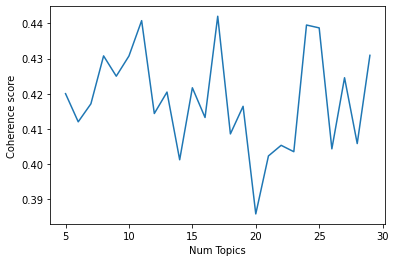

In [58]:
# Show graph
limit=30; start=5; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [59]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Seed =", m, 'Coherence: ', round(cv, 4))

Seed = 5 Coherence:  0.42
Seed = 6 Coherence:  0.412
Seed = 7 Coherence:  0.4171
Seed = 8 Coherence:  0.4308
Seed = 9 Coherence:  0.425
Seed = 10 Coherence:  0.4307
Seed = 11 Coherence:  0.4408
Seed = 12 Coherence:  0.4144
Seed = 13 Coherence:  0.4205
Seed = 14 Coherence:  0.4012
Seed = 15 Coherence:  0.4217
Seed = 16 Coherence:  0.4132
Seed = 17 Coherence:  0.4421
Seed = 18 Coherence:  0.4086
Seed = 19 Coherence:  0.4164
Seed = 20 Coherence:  0.3858
Seed = 21 Coherence:  0.4023
Seed = 22 Coherence:  0.4053
Seed = 23 Coherence:  0.4035
Seed = 24 Coherence:  0.4396
Seed = 25 Coherence:  0.4387
Seed = 26 Coherence:  0.4043
Seed = 27 Coherence:  0.4245
Seed = 28 Coherence:  0.4058
Seed = 29 Coherence:  0.4309


There is no real pattern here except that 11 and 17 reflect the higher coherence scores shown in the very first model run (that is, the one with 400 iterations). I am going to stick with the 8-topic setting from the 100-seed run.